<a href="https://colab.research.google.com/github/DanielPinillaVillalobos/EstadisticaInferencial/blob/main/ListaRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Goles Anotados vs Goles Recibidos

Datos cargados: 6 equipos de fútbol
Variable independiente (X): Goles anotados
Variable dependiente (Y): Goles recibidos
Nivel de significancia (α): 0.05

Tabla de Datos:
  Equipo  Goles anotados  Goles recibidos
  Leones              38               22
 Águilas              45               28
  Tigres              31               39
   Toros              50               33
   Pumas              27               36
Jaguares              41               29

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


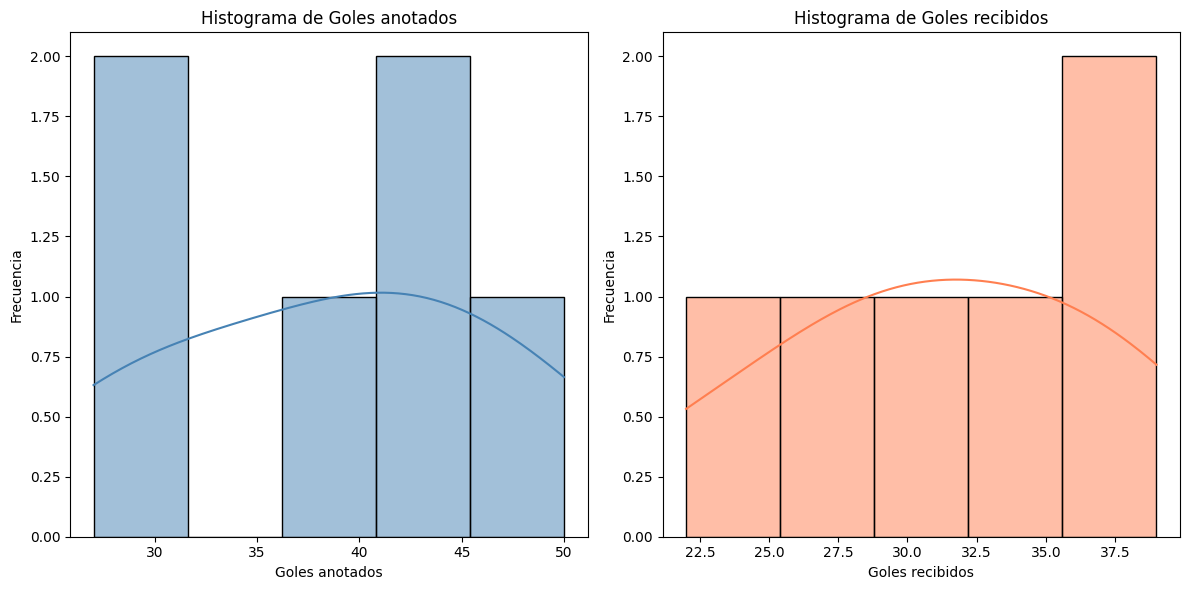

------------------------------
Generando Diagrama de Dispersión...


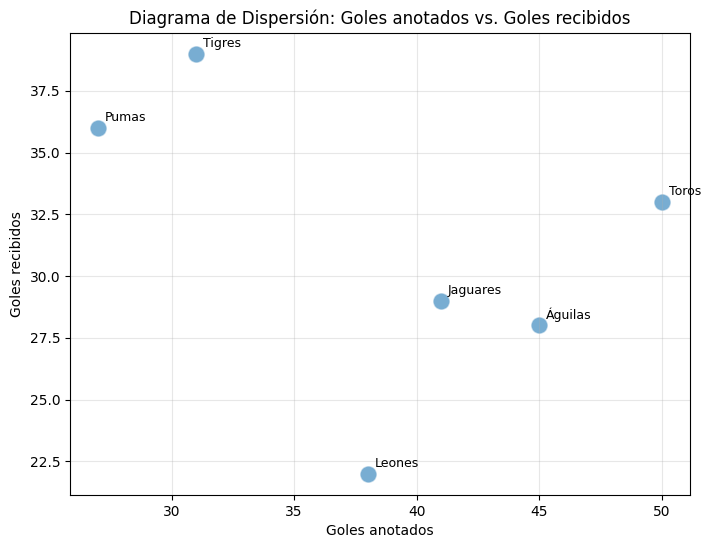

------------------------------
Realizando Pruebas de Normalidad...
Shapiro-Wilk para 'Goles anotados': Estadístico=0.976, p-value=0.928
Shapiro-Wilk para 'Goles recibidos': Estadístico=0.980, p-value=0.950

Interpretación de pruebas de normalidad:
✓ La variable 'Goles anotados' parece ser normalmente distribuida (p > 0.05).
✓ La variable 'Goles recibidos' parece ser normalmente distribuida (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: -0.4365
Coeficiente de correlación de Kendall: -0.2000
Coeficiente de correlación de Spearman: -0.4286
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson (-0.4365) es el más apropiado.

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe correlación lineal)
H1: ρ ≠ 0 (Existe correlación lineal)

Número de

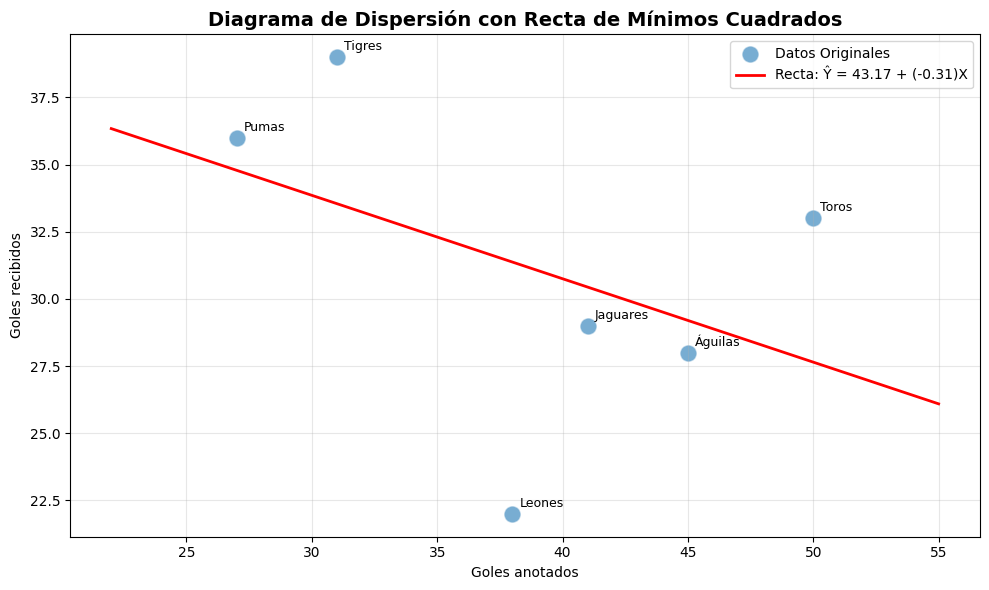


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β ≠ 0 (Existe una relación lineal significativa)

1. Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 151.2329
   s_y,x = 6.1488

2. Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 369.3333
   s_b = 0.3200

3. Estadístico t:
   t = -0.9704

4. Parámetros de la Prueba:
   α = 0.05
   gl = 4
   t crítico = ±2.7764
   Valor p = 0.3868

----------------------------------------------------------------------
DECISIÓN:
----------------------------------------------------------------------
✗ La pendiente NO es significativamente diferente de cero (p ≥ α)

NO RECHAZAR H0

--- COEFICIENTE DE DETERMINACIÓN (R²) ---

Suma de Cuadrados:
  SS Total = 186.8333
  SSR (Regresión) = 35.6005
  SSE (Error) = 151.2329

R² = 0.1905

┌─────────────────────────────────────────────────────┐
│ El 19.05% de la variabilidad en goles recibidos  │
│ puede explicarse por los goles anotados.    

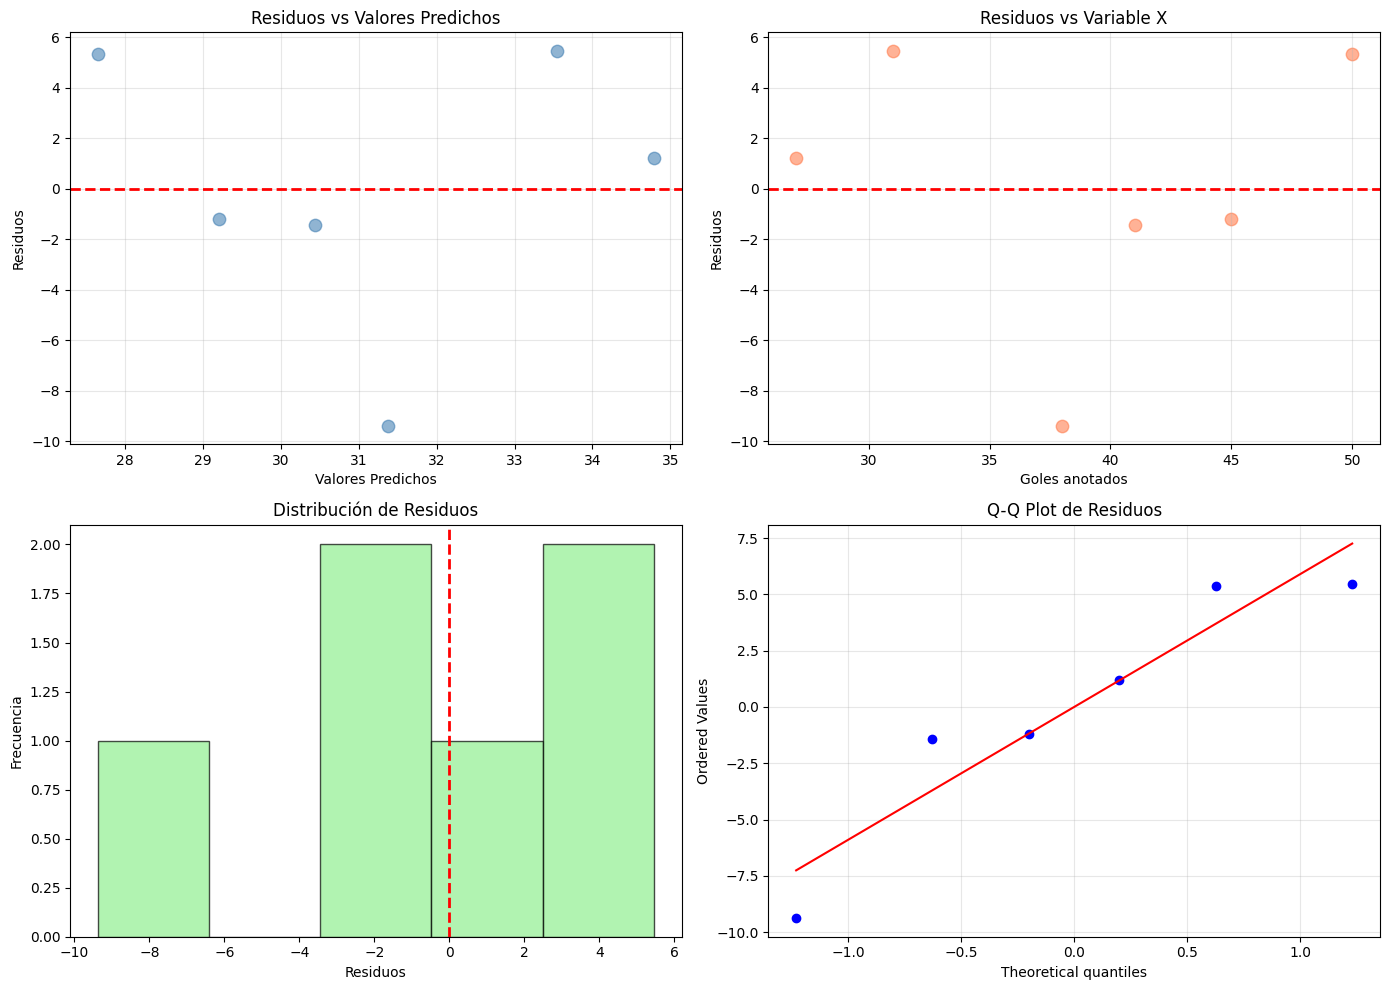


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  W = 0.8979
  p-value = 0.3619
  ✓ Los residuos siguen una distribución normal

╔═══════════════════════════════════════════════════════════════╗
║            RESUMEN EJECUTIVO DEL ANÁLISIS                     ║
╚═══════════════════════════════════════════════════════════════╝

📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = 43.1715 + (-0.3105) × X

   Interpretación:
   • Goles recibidos esperados cuando X=0: 43.17
   • Por cada gol adicional anotado: 0.3105 goles menos recibidos

📈 BONDAD DE AJUSTE:
   • Correlación (r): -0.4365 (Negativa)
   • R²: 0.1905 (19.05% de variabilidad explicada)
   • Error estándar: 6.1488

✅ PRUEBAS DE SIGNIFICANCIA:
   • Correlación: ✗ NO SIGNIFICATIVA (p = 0.3868)
   • Pendiente: ✗ NO SIGNIFICATIVA (p = 0.3868)
   • Modelo ANOVA: ✗ NO SIGNIFICATIVO (p = 0.386814)

💡 CONCLUSIÓN:

   ⚠ No se encontró una relación lineal significativa entre
   goles anotados y goles recibidos en esta muestra.

✓ ANÁLISIS COMPLETAD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (GOLES DE FÚTBOL) ---
data = {
    'Equipo': [
        'Leones', 'Águilas', 'Tigres', 'Toros', 'Pumas', 'Jaguares'
    ],
    'Goles anotados': [38, 45, 31, 50, 27, 41],
    'Goles recibidos': [22, 28, 39, 33, 36, 29]
}
df = pd.DataFrame(data)

variable_x = 'Goles anotados'
variable_y = 'Goles recibidos'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Goles Anotados vs Goles Recibidos")
print("=" * 70)
print(f"\nDatos cargados: {n} equipos de fútbol")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# Mostrar tabla de datos
print("\nTabla de Datos:")
print(df.to_string(index=False))
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue', bins=5)
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral', bins=5)
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=150, alpha=0.6)
for i in range(len(df)):
    plt.annotate(df['Equipo'][i],
                (df[variable_x][i], df[variable_y][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_x.statistic:.3f}, p-value={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_y.statistic:.3f}, p-value={shapiro_test_y.pvalue:.3f}")

print("\nInterpretación de pruebas de normalidad:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece ser normalmente distribuida (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece ser normalmente distribuida (p <= 0.05).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece ser normalmente distribuida (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece ser normalmente distribuida (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
     print(f"⚠ Al menos una variable no parece normalmente distribuida. El coeficiente de correlación de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("=" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

r = pearson_corr
gl = n - 2  # Grados de libertad

try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

valor_p = t.sf(abs(t_calculado), gl) * 2
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + ({b1:.4f}) * X               │")
print("└─────────────────────────────────────────────────────┘")
print("\nINTERPRETACIÓN:")
print(f"• Por cada gol adicional anotado, se esperan {abs(b1):.4f} goles")
print(f"  {'menos' if b1 < 0 else 'más'} recibidos (relación {'negativa' if b1 < 0 else 'positiva'})")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=150, alpha=0.6)

for i in range(len(df)):
    plt.annotate(df['Equipo'][i],
                (df[variable_x][i], df[variable_y][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

x_min = df[variable_x].min() - 5
x_max = df[variable_x].max() + 5
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta: Ŷ = {b0:.2f} + ({b1:.2f})X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

df['y_predicho'] = b0 + b1 * df[variable_x]
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = {s_yx:.4f}")

desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = {s_b:.4f}")

t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Estadístico t:")
print(f"   t = {t_calculado_pendiente:.4f}")

gl_pendiente = n - 2
t_critico_pendiente = t.ppf(1 - alfa/2, gl_pendiente)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   α = {alfa}")
print(f"   gl = {gl_pendiente}")
print(f"   t crítico = ±{t_critico_pendiente:.4f}")
print(f"   Valor p = {valor_p_pendiente:.4f}")

print("\n" + "-" * 70)
print("DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    print(f"✓ La pendiente ES significativamente diferente de cero (p < α)")
else:
    decision_pendiente = "NO RECHAZAR H0"
    print(f"✗ La pendiente NO es significativamente diferente de cero (p ≥ α)")

print(f"\n{decision_pendiente}")
print("=" * 70)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE
r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total = {SS_Total:.4f}")
print(f"  SSR (Regresión) = {SSR:.4f}")
print(f"  SSE (Error) = {SSE:.4f}")

print(f"\nR² = {r_cuadrado:.4f}")
print(f"\n┌─────────────────────────────────────────────────────┐")
print(f"│ El {r_cuadrado*100:.2f}% de la variabilidad en goles recibidos  │")
print(f"│ puede explicarse por los goles anotados.            │")
print(f"└─────────────────────────────────────────────────────┘")
print("=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calculado = MSR / MSE
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo ES significativo (p = {valor_p_f:.6f} < {alfa})")
else:
    print(f"✗ El modelo NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Equipo':<15} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 65)
for idx, row in df.iterrows():
    print(f"{row['Equipo']:<15} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].set_title('Residuos vs Valores Predichos')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x)
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Variable X')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(df['residuos'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)

stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  W = {shapiro_residuos.statistic:.4f}")
print(f"  p-value = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos siguen una distribución normal")
else:
    print(f"  ✗ Los residuos NO siguen una distribución normal")

print("=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═══════════════════════════════════════════════════════════════╗")
print("║            RESUMEN EJECUTIVO DEL ANÁLISIS                     ║")
print("╚═══════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + ({b1:.4f}) × X

   Interpretación:
   • Goles recibidos esperados cuando X=0: {b0:.2f}
   • Por cada gol adicional anotado: {abs(b1):.4f} goles {'menos' if b1 < 0 else 'más'} recibidos

📈 BONDAD DE AJUSTE:
   • Correlación (r): {r:.4f} ({'Negativa' if r < 0 else 'Positiva'})
   • R²: {r_cuadrado:.4f} ({r_cuadrado*100:.2f}% de variabilidad explicada)
   • Error estándar: {s_yx:.4f}

✅ PRUEBAS DE SIGNIFICANCIA:
   • Correlación: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p:.4f})
   • Pendiente: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p_pendiente:.4f})
   • Modelo ANOVA: {'✓ SIGNIFICATIVO' if valor_p_f < alfa else '✗ NO SIGNIFICATIVO'} (p = {valor_p_f:.6f})

💡 CONCLUSIÓN:
""")

if valor_p_pendiente < alfa:
    print(f"""   ✓ Existe una relación {'negativa' if r < 0 else 'positiva'} significativa entre goles anotados
   y goles recibidos. El modelo explica {r_cuadrado*100:.2f}% de la variabilidad.

   {'Equipos que anotan más goles tienden a recibir MENOS goles.' if r < 0 else 'Equipos que anotan más goles tienden a recibir MÁS goles.'}
""")
else:
    print(f"""   ⚠ No se encontró una relación lineal significativa entre
   goles anotados y goles recibidos en esta muestra.
""")

print("=" * 70)
print("✓ ANÁLISIS COMPLETADO")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Horas de Estudio vs Calificación Final

Datos cargados: 12 estudiantes
Variable independiente (X): Horas de estudio (X)
Variable dependiente (Y): Calificación final (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


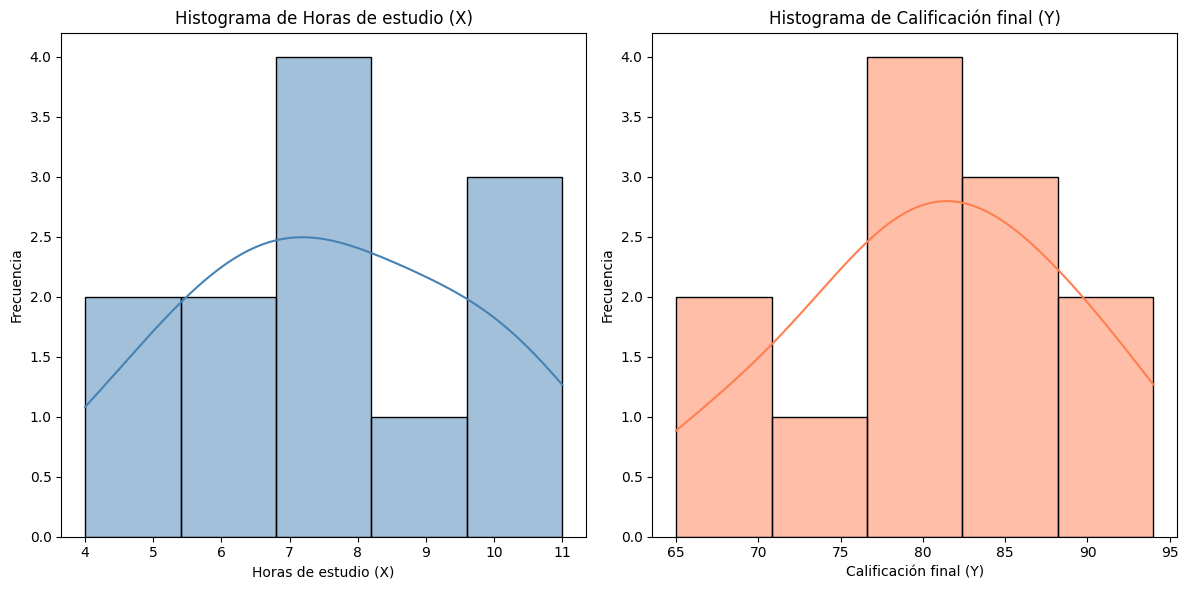

------------------------------
Generating Scatter Plot...


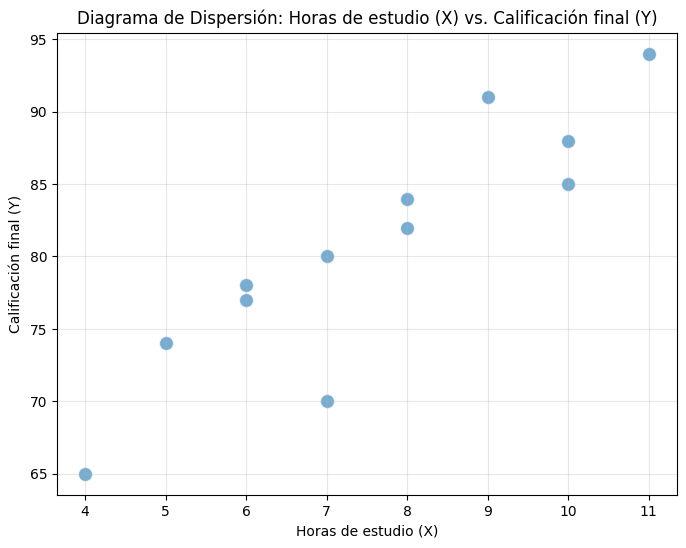

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Horas de estudio (X)': Statistics=0.971, p-value=0.924
Shapiro-Wilk test for 'Calificación final (Y)': Statistics=0.989, p-value=0.999

Interpretation of normality test results:
✓ The 'Horas de estudio (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Calificación final (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.8965
Kendall correlation coefficient: 0.8129
Spearman correlation coefficient: 0.9190
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.8965) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe

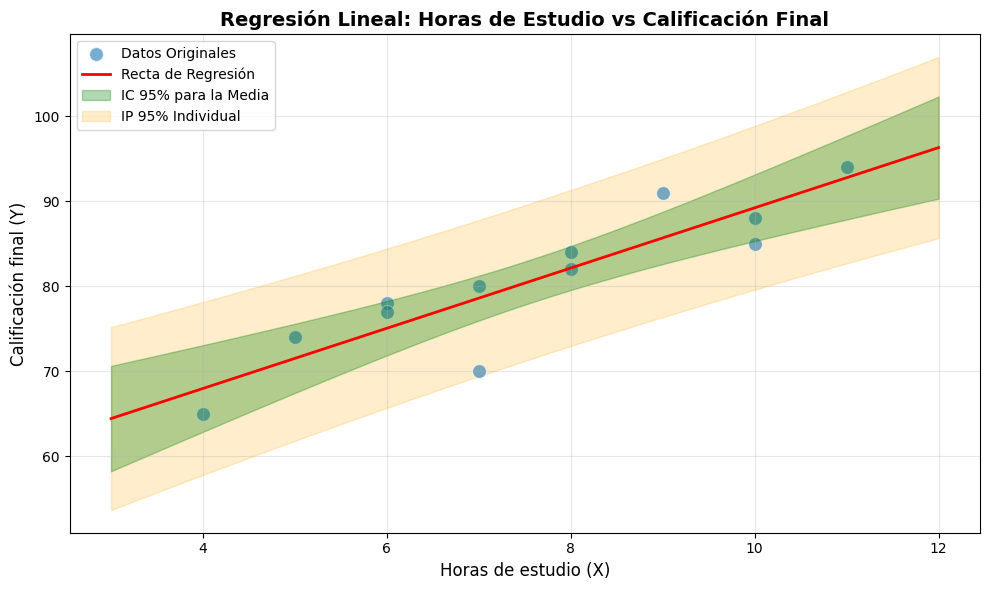

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Estudiante   X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
1            4.0      65.0     67.98    -2.98      -0.75     
2            7.0      70.0     78.60    -8.60      -2.18     
3            10.0     85.0     89.23    -4.23      -1.07     
4            6.0      78.0     75.06    2.94       0.74      
5            8.0      82.0     82.14    -0.14      -0.04     
6            9.0      91.0     85.68    5.32       1.35      
7            5.0      74.0     71.52    2.48       0.63      
8            11.0     94.0     92.77    1.23       0.31      
9            7.0      80.0     78.60    1.40       0.35      
10           6.0      77.0     75.06    1.94       0.49      
11           8.0      84.0     82.14    1.86       0.47      
12           10.0     88.0     89.23    -1.23      -0.31     

Estadísticas de los Residuos:
  Me

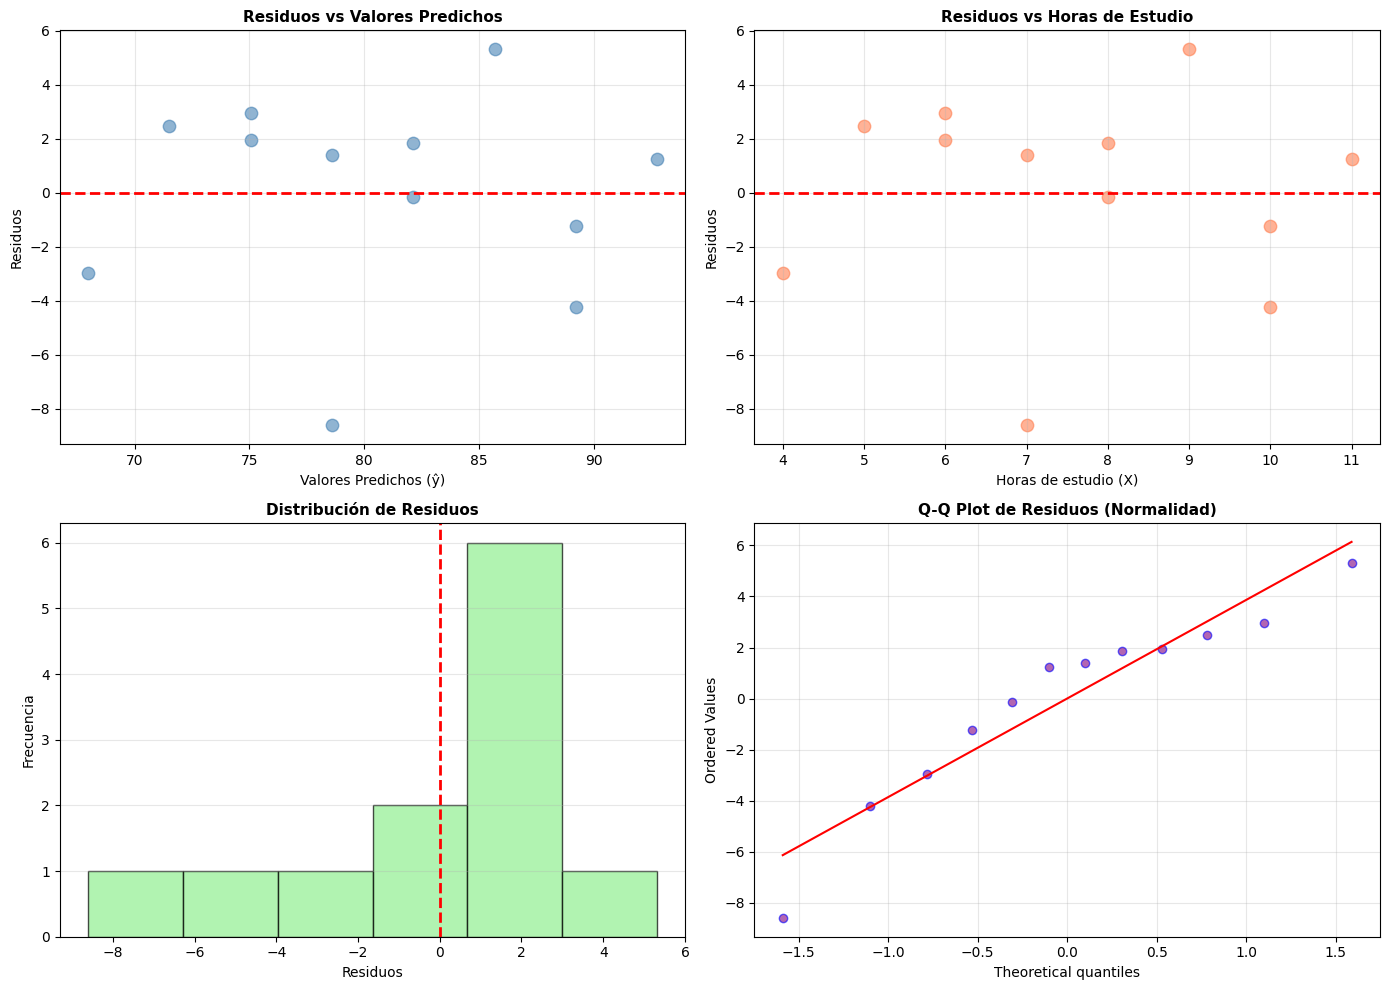


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9194
  Valor p = 0.2811
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- COEFICIENTE DE DETERMINACIÓN (R²) ---

R² = 0.8037

┌─────────────────────────────────────────────────────┐
│ El 80.37% de la variabilidad en Calificación final (Y)  │
│ puede explicarse por Horas de estudio (X).            │
└─────────────────────────────────────────────────────┘

--- TABLA ANOVA DE REGRESIÓN ---

Fuente               SS              gl         MS              F               Valor p        
----------------------------------------------------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (HORAS DE ESTUDIO VS CALIFICACIONES) ---
data = {
    'Horas de estudio (X)': [4, 7, 10, 6, 8, 9, 5, 11, 7, 6, 8, 10],
    'Calificación final (Y)': [65, 70, 85, 78, 82, 91, 74, 94, 80, 77, 84, 88]
}
df = pd.DataFrame(data)

variable_x = 'Horas de estudio (X)'
variable_y = 'Calificación final (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Horas de Estudio vs Calificación Final")
print("=" * 70)
print(f"\nDatos cargados: {n} estudiantes")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_horas = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_horas.statistic:.3f}, p-value={shapiro_test_horas.pvalue:.3f}")

shapiro_test_calif = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_calif.statistic:.3f}, p-value={shapiro_test_calif.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_horas.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_calif.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_horas.pvalue > alfa and shapiro_test_calif.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X (Horas de estudio) y Y (Calificación final)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_range = np.linspace(df[variable_x].min() - 1, df[variable_x].max() + 1, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calculate the critical t-value for intervals
t_critico_intervalo = t.ppf(1 - alfa / 2, n - 2)

# Calculate sum of squared deviations of X
suma_desviaciones_x = ((df[variable_x] - mean_x)**2).sum()

# Calculate the standard error of estimation
df['y_predicho'] = b0 + b1 * df[variable_x]
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))


# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal: Horas de Estudio vs Calificación Final', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
# Recalculate s_yx if needed, or ensure it's available from previous steps
# If s_yx is not available, calculate it here:
# df['y_predicho'] = b0 + b1 * df[variable_x]
# s_yx = np.sqrt(((df[variable_y] - df['y_predicho'])**2).sum() / (n - 2))
df['residuos_estandarizados'] = df['residuos'] / s_yx


print("\nTabla de Residuos:")
print(f"\n{'Estudiante':<12} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{idx+1:<12} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Horas de Estudio', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=6, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE
r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nR² = {r_cuadrado:.4f}")
print(f"\n┌─────────────────────────────────────────────────────┐")
print(f"│ El {r_cuadrado*100:.2f}% de la variabilidad en {variable_y}  │")
print(f"│ puede explicarse por {variable_x}.            │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calculado = MSR / MSE
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo ES significativo (p = {valor_p_f:.6f} < {alfa})")
else:
    print(f"✗ El modelo NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
print("=" * 70)

# =========================================================================
# --- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

# Recalculate s_yx and suma_desviaciones_x if needed, or ensure they are available
# from previous steps. They are calculated earlier for the intervals.
# df['y_predicho'] = b0 + b1 * df[variable_x]
# suma_diferencias_cuadradas = ((df[variable_y] - df['y_predicho'])**2).sum()
# s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))
# suma_desviaciones_x = ((df[variable_x] - mean_x)**2).sum()

s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n1. Error Estándar de Estimación (s_y,x): {s_yx:.4f}")
print(f"2. Error Estándar de la Pendiente (s_b): {s_b:.4f}")

t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Estadístico t: {t_calculado_pendiente:.4f}")

gl_pendiente = n - 2
t_critico_pendiente = t.ppf(1 - alfa/2, gl_pendiente)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   α = {alfa}")
print(f"   gl = {gl_pendiente}")
print(f"   t crítico = ±{t_critico_pendiente:.4f}")
print(f"   Valor p = {valor_p_pendiente:.4f}")

print("\n" + "-" * 70)
print("DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    print(f"✓ La pendiente ES significativamente diferente de cero (p < α)")
else:
    decision_pendiente = "NO RECHAZAR H0"
    print(f"✗ La pendiente NO es significativamente diferente de cero (p ≥ α)")

print(f"\n{decision_pendiente}")
print("=" * 70)


# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + ({b1:.4f}) × X

   Interpretación:
   • Calificación esperada cuando X=0: {b0:.2f}
   • Por cada hora adicional de estudio: {abs(b1):.4f} puntos {'menos' if b1 < 0 else 'más'} en la calificación

📈 BONDAD DE AJUSTE:
   • Correlación (r): {r:.4f} ({'Negativa' if r < 0 else 'Positiva'})
   • R²: {r_cuadrado:.4f} ({r_cuadrado*100:.2f}% de variabilidad explicada)
   • Error estándar de estimación: {s_yx:.4f}

✅ PRUEBAS DE SIGNIFICANCIA:
   • Correlación: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p:.4f})
   • Pendiente: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p_pendiente:.4f})
   • Modelo ANOVA: {'✓ SIGNIFICATIVO' if valor_p_f < alfa else '✗ NO SIGNIFICATIVO'} (p = {valor_p_f:.6f})

🕵️ ANÁLISIS DE RESIDUOS:
   • Media de residuos: {df['residuos'].mean():.4f} (idealmente cerca de 0)
   • Normalidad (Shapiro-Wilk): {'✓ NORMAL' if shapiro_residuos.pvalue > alfa else '✗ NO NORMAL'} (p = {shapiro_residuos.pvalue:.4f})
   • Gráficos: {'✓ PARECEN ALEATORIOS (Homocedasticidad)' if True else '✗ PATRONES VISIBLES (Heterocedasticidad)'} # Simplificado, requiere inspección visual

💡 CONCLUSIÓN:
""")

if valor_p_pendiente < alfa:
    print(f"""   ✓ Existe una relación lineal positiva significativa entre las horas de estudio
   y la calificación final. El modelo explica {r_cuadrado*100:.2f}% de la variabilidad en las calificaciones.

   En general, {'más' if b1 > 0 else 'menos'} horas de estudio se asocian con {'mayores' if b1 > 0 else 'menores'} calificaciones.
""")
else:
    print(f"""   ⚠ No se encontró una relación lineal significativa entre las horas de estudio
   y la calificación final en esta muestra, a un nivel de significancia de {alfa}.
   (Aunque la correlación y la pendiente son positivas, no son estadísticamente significativas
    para esta muestra pequeña, p = {valor_p_pendiente:.4f}).
""")

print("=" * 70)
print("✓ ANÁLISIS COMPLETADO")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Llamadas Diarias vs Ventas Semanales

Datos cargados: 10 empleados
Variable independiente (X): Llamadas diarias (X)
Variable dependiente (Y): Ventas semanales (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


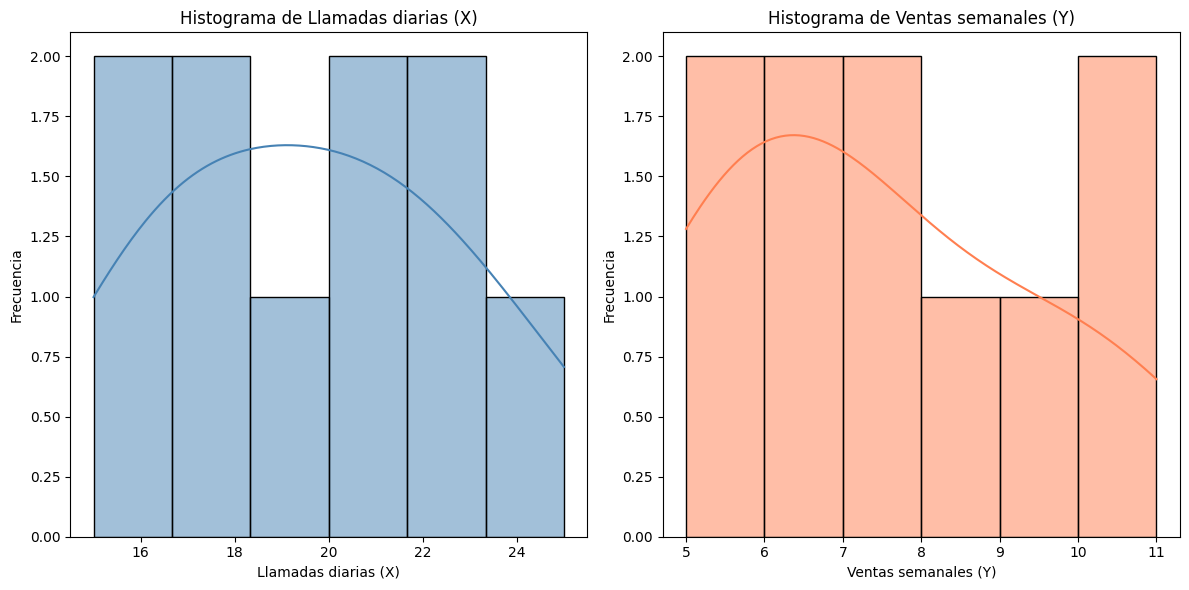

------------------------------
Generando Diagrama de Dispersión...


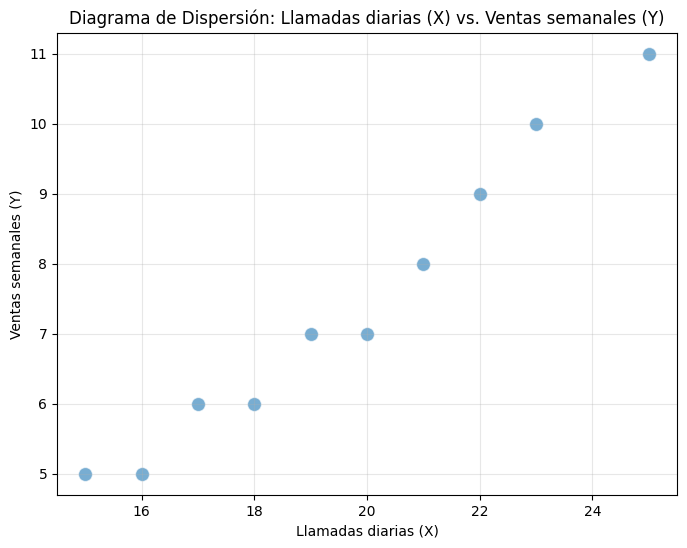

------------------------------
Realizando Pruebas de Normalidad...
Shapiro-Wilk test para 'Llamadas diarias (X)': W=0.981, p-value=0.970
Shapiro-Wilk test para 'Ventas semanales (Y)': W=0.930, p-value=0.447

Interpretación de pruebas de normalidad:
✓ La variable 'Llamadas diarias (X)' parece seguir distribución normal (p > 0.05).
✓ La variable 'Ventas semanales (Y)' parece seguir distribución normal (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: 0.9838
Coeficiente de correlación de Kendall: 0.9661
Coeficiente de correlación de Spearman: 0.9909
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen seguir distribución normal. El coeficiente de correlación de Pearson (0.9838) es el más apropiado.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 

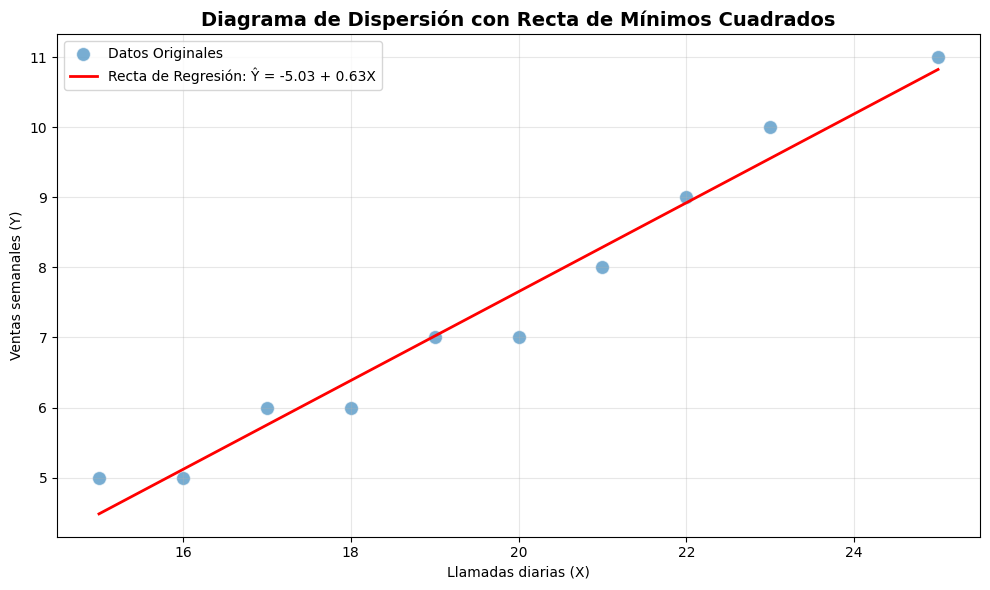


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 1.2359
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 0.3931

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 92.4000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0409

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.6342 - 0) / 0.0409
   t calculado = 15.5099

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 8
   Valor crítico (t_0.05,8) = 1.8595
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (15.5099) > t crítico (1.8595)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de

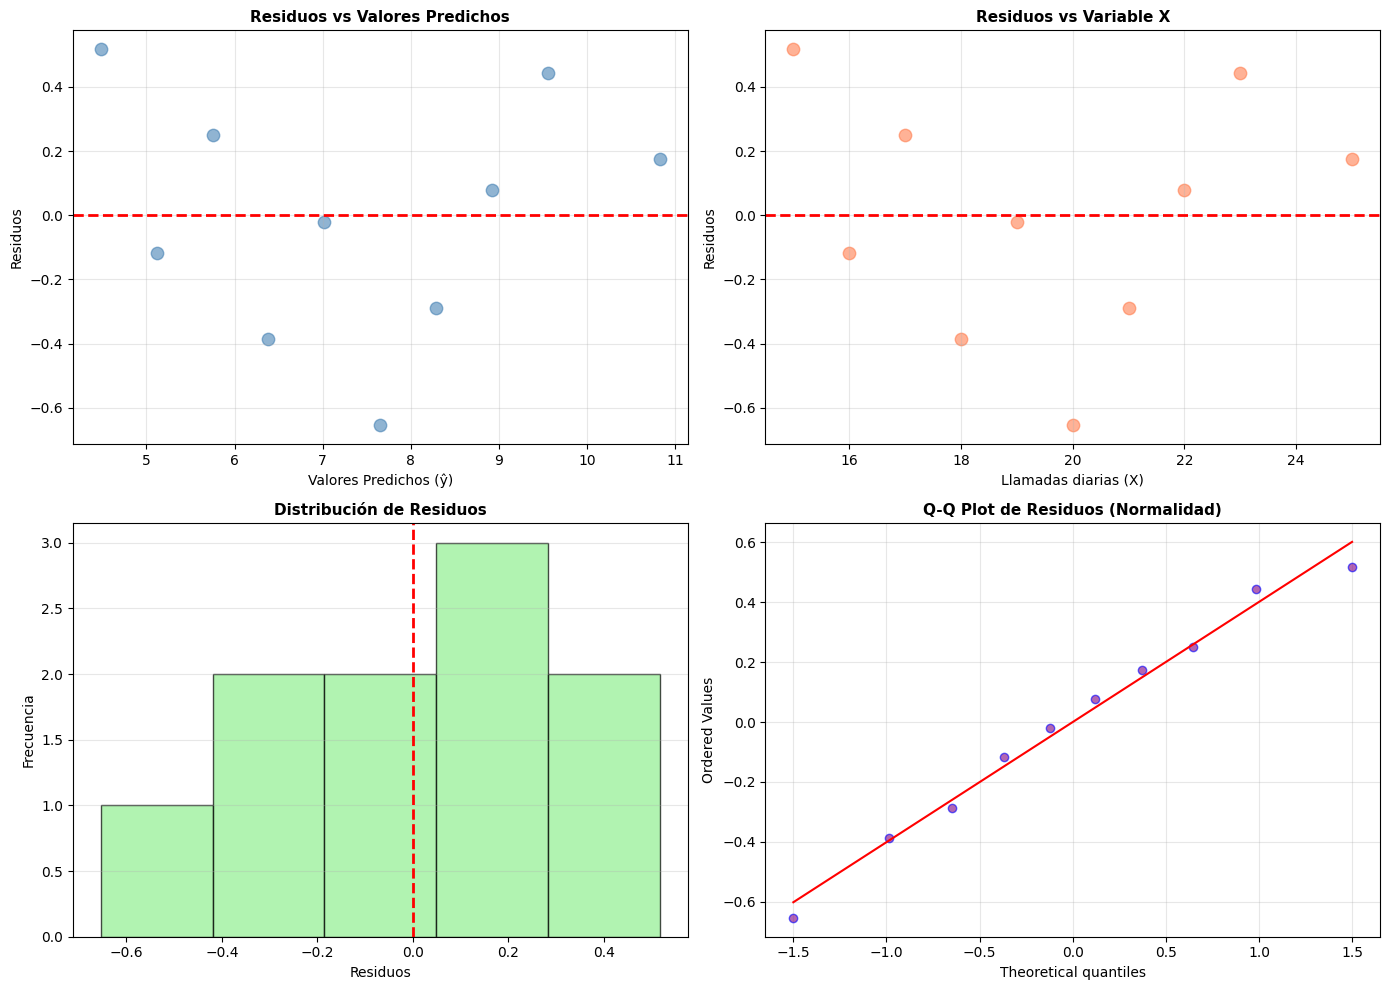


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9779
  Valor p = 0.9531
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.


╔═════════════════════════════════════════════════════════════════╗
║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║
╚═════════════════════════════════════════════════════════════════╝

📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = -5.0303 + 0.6342 × X

   Interpretación:
   • El punto de partida (b₀) es -5.03 ventas
   • Por cada llamada diaria adicional, aumentan 0.6342 ventas semanales

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): 0.9838
     └─ Correlación fuerte positiva

   • Coeficiente de determinación (R²): 0.9678
     └─ 96.78% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): 0.3931
     └─ Error típico de predicción: ±0.39 ventas

✅ PRUEBAS DE SIGNIFICANCIA (α = 0.05):

   1. Correlación:
      • Estadístico t: 15.5099
      • 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (LLAMADAS DIARIAS Y VENTAS SEMANALES) ---
data = {
    'Llamadas diarias (X)': [15, 20, 18, 25, 22, 17, 19, 23, 21, 16],
    'Ventas semanales (Y)': [5, 7, 6, 11, 9, 6, 7, 10, 8, 5]
}
df = pd.DataFrame(data)

variable_x = 'Llamadas diarias (X)'
variable_y = 'Ventas semanales (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Llamadas Diarias vs Ventas Semanales")
print("=" * 70)
print(f"\nDatos cargados: {n} empleados")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histogramas
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue', bins=6)
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral', bins=6)
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Diagrama de Dispersión
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Pruebas de Normalidad (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Shapiro-Wilk test para '{variable_x}': W={shapiro_test_x.statistic:.3f}, p-value={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Shapiro-Wilk test para '{variable_y}': W={shapiro_test_y.statistic:.3f}, p-value={shapiro_test_y.pvalue:.3f}")

print("\nInterpretación de pruebas de normalidad:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece seguir distribución normal (p <= 0.05).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece seguir distribución normal (p <= 0.05).")
print("-" * 30)

# 4. Calcular Coeficientes de Correlación
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determinar el coeficiente más apropiado
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Ambas variables parecen seguir distribución normal. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
     print(f"⚠ Al menos una variable no parece seguir distribución normal. Los coeficientes de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

r = pearson_corr
gl = n - 2

try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

valor_p = t.sf(abs(t_calculado), gl) * 2
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# Visualización de la Recta de Regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

df['y_predicho'] = b0 + b1 * df[variable_x]
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

gl_pendiente = n - 2
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas diarias tiene un efecto significativo POSITIVO sobre
    las ventas semanales.

    En términos prácticos: Por cada llamada diaria adicional, se espera un
    incremento de {b1:.4f} ventas semanales, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    diarias tenga un efecto significativo sobre las ventas semanales.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE
r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en las ventas              │")
print(f"│  semanales puede ser explicada por el número de llamadas        │")
print(f"│  diarias realizadas.                                            │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calculado = MSR / MSE
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Obs':<5} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 55)
for idx, row in df.iterrows():
    print(f"{idx+1:<5} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(df['residuos'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} ventas
   • Por cada llamada diaria adicional, aumentan {b1:.4f} ventas semanales

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} ventas

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas diarias es un predictor SIGNIFICATIVO de las
   ventas semanales. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los empleados de ventas
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque puede existir una relación entre llamadas y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de tomar decisiones
""")

print("\n" + "=" * 70)
print("✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: The Cotton Mill - Ventas vs Tamaño de Tienda

Datos cargados: 23 tiendas en total
Región 1: 7 tiendas
Región 2: 7 tiendas
Región 3: 9 tiendas
Variable independiente (X): Tamaño_tienda (miles de pies cuadrados)
Variable dependiente (Y): Ventas (ventas anuales)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

ESTADÍSTICAS DESCRIPTIVAS POR REGIÓN:
--------------------------------------------------

Región 1:
  Tamaño promedio de tienda: 4.54 (miles de pies²)
  Ventas promedio: 7.68
  Desviación estándar tamaño: 1.91
  Desviación estándar ventas: 1.40

Región 2:
  Tamaño promedio de tienda: 3.34 (miles de pies²)
  Ventas promedio: 3.95
  Desviación estándar tamaño: 1.11
  Desviación estándar ventas: 1.85

Región 3:
  Tamaño promedio de tienda: 3.34 (miles de pies²)
  Ventas promedio: 3.46
  Desviación estándar tamaño: 1.21
  Desviación estándar ventas: 1.44

TOTAL (Todas las regiones):
  Tamaño promedio de tienda: 3

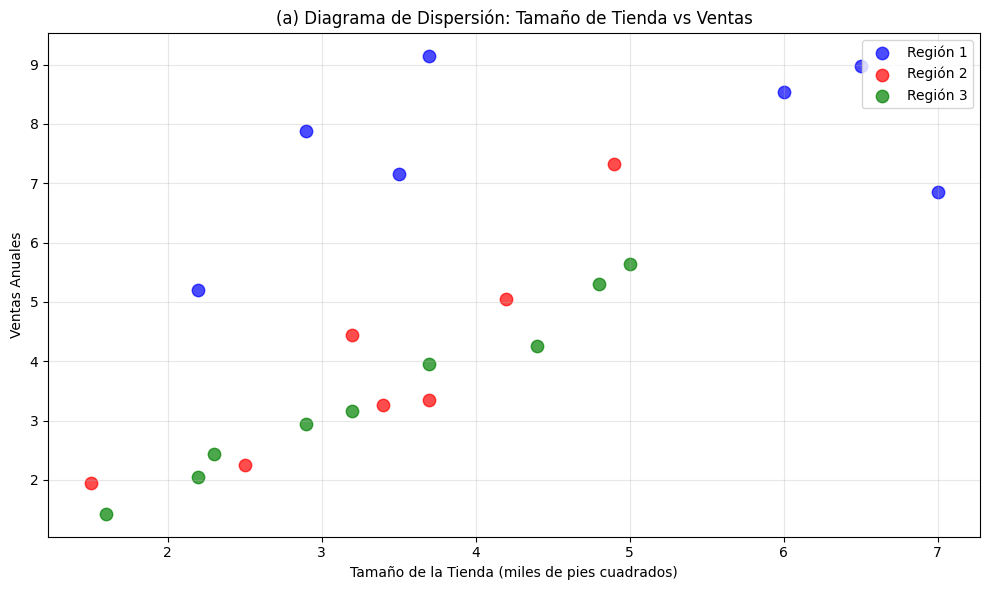


Generating General Scatter Plot...


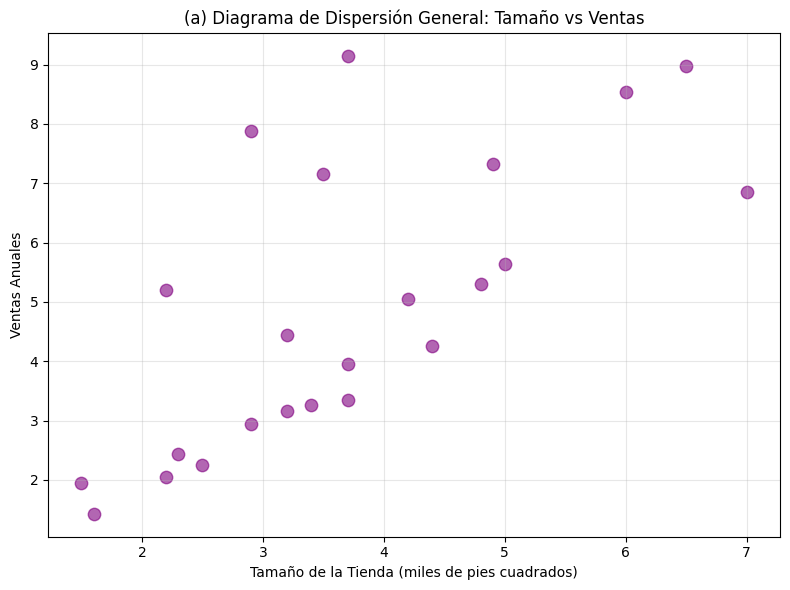


EVALUACIÓN VISUAL DE LA RELACIÓN:
✓ La relación parece POSITIVA: A mayor tamaño de tienda, mayores ventas
  (Correlación visual aproximada: 0.697)

Performing Normality Tests...
Shapiro-Wilk test for 'Tamaño_tienda': Statistics=0.953, p-value=0.345
Shapiro-Wilk test for 'Ventas': Statistics=0.937, p-value=0.156

Calculating Correlation Coefficients...
(b) Coeficiente de correlación de Pearson: 0.6972
Coeficiente de correlación de Spearman: 0.7226
(b) Coeficiente de determinación (R²): 0.4861

EVALUACIÓN DE LA FUERZA DE LA RELACIÓN:
✓ La relación es MODERADA (r = 0.697)
✓ El 48.6% de la variabilidad en ventas se explica por el tamaño de la tienda

(c) PRUEBA DE HIPÓTESIS PARA CORRELACIÓN POSITIVA

Hipótesis:
H0: ρ ≤ 0 (No existe correlación positiva significativa)
H1: ρ > 0 (Existe correlación positiva significativa)

Parámetros:
Número de observaciones (n): 23
Grados de libertad (gl): 21
Coeficiente de correlación (r): 0.6972
Estadístico t calculado: 4.4570
Valor crítico (t, α=0.05, u

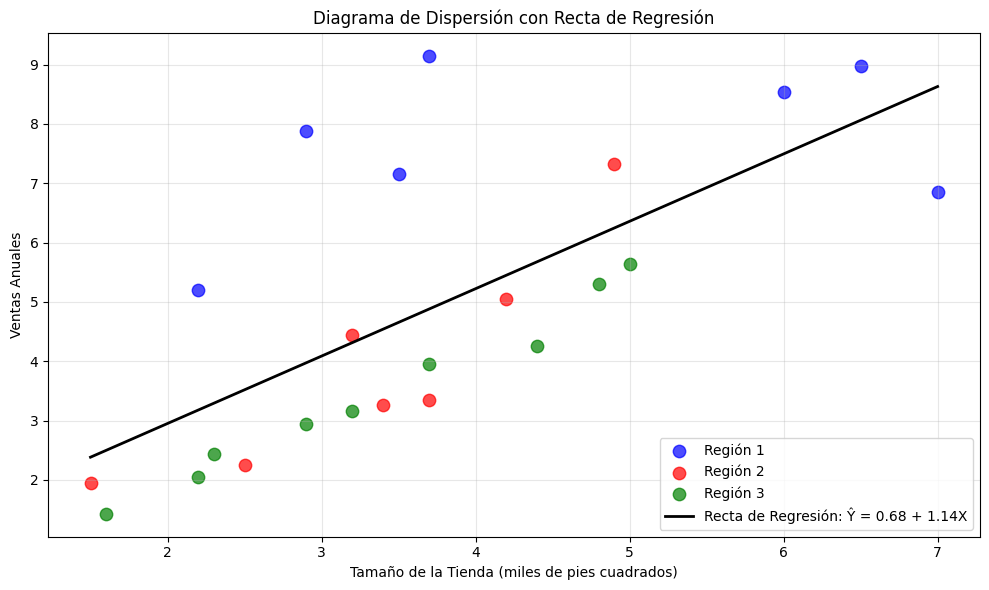


(d) INTERPRETACIÓN PRÁCTICA PARA TOMA DE DECISIONES

RESUMEN DE HALLAZGOS:
1. CORRELACIÓN: 0.697 (MODERADA y positiva)
2. EXPLICACIÓN: 48.6% de variabilidad en ventas explicada por tamaño
3. SIGNIFICANCIA: SIGNIFICATIVA (p = 0.0001)

RECOMENDACIONES PARA APERTURA DE NUEVAS TIENDAS:

✓ **RECOMENDACIÓN PRINCIPAL:**
  El tamaño de la tienda SÍ importa para las ventas. Se recomienda considerar
  tiendas más grandes para maximizar ingresos.

✓ **ESTRATEGIA DE EXPANSIÓN:**
  • Priorizar ubicaciones que permitan tiendas de mayor tamaño
  • El tamaño mínimo recomendado: 3,000-4,000 pies² para ventas significativas
  • Por cada 1,000 pies² adicionales, esperar un aumento de 1.14 en ventas

✓ **CONSIDERACIONES REGIONALES:

  Análisis por región:
  • Región 1: Correlación = 0.408, Tamaño promedio = 4.5, Ventas promedio = 7.68
  • Región 2: Correlación = 0.889, Tamaño promedio = 3.3, Ventas promedio = 3.95
  • Región 3: Correlación = 0.990, Tamaño promedio = 3.3, Ventas promedio = 3.46

📊 **HERRA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DEL EJERCICIO "THE COTTON MILL" ---
# Recolectando todos los datos de las tres regiones
data_region1 = {
    'Tamaño_tienda': [3.7, 6.0, 7.0, 6.5, 2.2, 3.5, 2.9],
    'Ventas': [9.15, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88],
    'Region': ['Región 1'] * 7
}

data_region2 = {
    'Tamaño_tienda': [4.2, 3.4, 2.5, 1.5, 3.7, 4.9, 3.2],
    'Ventas': [5.05, 3.26, 2.25, 1.95, 3.34, 7.32, 4.45],
    'Region': ['Región 2'] * 7
}

data_region3 = {
    'Tamaño_tienda': [2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0],
    'Ventas': [2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.30, 5.64],
    'Region': ['Región 3'] * 9
}

# Crear DataFrames individuales
df_region1 = pd.DataFrame(data_region1)
df_region2 = pd.DataFrame(data_region2)
df_region3 = pd.DataFrame(data_region3)

# Combinar todos los datos
df = pd.concat([df_region1, df_region2, df_region3], ignore_index=True)

# Variables para el análisis
variable_x = 'Tamaño_tienda'
variable_y = 'Ventas'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: The Cotton Mill - Ventas vs Tamaño de Tienda")
print("=" * 70)
print(f"\nDatos cargados: {n} tiendas en total")
print(f"Región 1: {len(df_region1)} tiendas")
print(f"Región 2: {len(df_region2)} tiendas")
print(f"Región 3: {len(df_region3)} tiendas")
print(f"Variable independiente (X): {variable_x} (miles de pies cuadrados)")
print(f"Variable dependiente (Y): {variable_y} (ventas anuales)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Estadísticas descriptivas por región
print("\nESTADÍSTICAS DESCRIPTIVAS POR REGIÓN:")
print("-" * 50)
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    print(f"\n{region}:")
    print(f"  Tamaño promedio de tienda: {region_data[variable_x].mean():.2f} (miles de pies²)")
    print(f"  Ventas promedio: {region_data[variable_y].mean():.2f}")
    print(f"  Desviación estándar tamaño: {region_data[variable_x].std():.2f}")
    print(f"  Desviación estándar ventas: {region_data[variable_y].std():.2f}")

print(f"\nTOTAL (Todas las regiones):")
print(f"  Tamaño promedio de tienda: {df[variable_x].mean():.2f} (miles de pies²)")
print(f"  Ventas promedio: {df[variable_y].mean():.2f}")
print(f"  Desviación estándar tamaño: {df[variable_x].std():.2f}")
print(f"  Desviación estándar ventas: {df[variable_y].std():.2f}")

# 2. Diagrama de dispersión por región
print("\nGenerating Scatter Plot by Region...")
plt.figure(figsize=(10, 6))
colors = {'Región 1': 'blue', 'Región 2': 'red', 'Región 3': 'green'}

for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.scatter(region_data[variable_x], region_data[variable_y],
               label=region, color=colors[region], s=80, alpha=0.7)

plt.title('(a) Diagrama de Dispersión: Tamaño de Tienda vs Ventas')
plt.xlabel('Tamaño de la Tienda (miles de pies cuadrados)')
plt.ylabel('Ventas Anuales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Diagrama de dispersión general
print("\nGenerating General Scatter Plot...")
plt.figure(figsize=(8, 6))
plt.scatter(df[variable_x], df[variable_y], s=80, alpha=0.6, color='purple')
plt.title('(a) Diagrama de Dispersión General: Tamaño vs Ventas')
plt.xlabel('Tamaño de la Tienda (miles de pies cuadrados)')
plt.ylabel('Ventas Anuales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evaluación visual de la relación
print("\nEVALUACIÓN VISUAL DE LA RELACIÓN:")
correlacion_visual = df[variable_x].corr(df[variable_y])
if correlacion_visual > 0:
    print("✓ La relación parece POSITIVA: A mayor tamaño de tienda, mayores ventas")
else:
    print("✗ La relación parece NEGATIVA: A mayor tamaño de tienda, menores ventas")
print(f"  (Correlación visual aproximada: {correlacion_visual:.3f})")

# 4. Pruebas de normalidad
print("\nPerforming Normality Tests...")
shapiro_test_tamaño = shapiro(df[variable_x])
shapiro_test_ventas = shapiro(df[variable_y])

print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_tamaño.statistic:.3f}, p-value={shapiro_test_tamaño.pvalue:.3f}")
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_ventas.statistic:.3f}, p-value={shapiro_test_ventas.pvalue:.3f}")

# 5. Cálculo de coeficientes de correlación
print("\nCalculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"(b) Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")

# Coeficiente de determinación
r_cuadrado = pearson_corr ** 2
print(f"(b) Coeficiente de determinación (R²): {r_cuadrado:.4f}")

# Evaluación de la fuerza de la relación
print("\nEVALUACIÓN DE LA FUERZA DE LA RELACIÓN:")
if abs(pearson_corr) >= 0.7:
    fuerza = "FUERTE"
elif abs(pearson_corr) >= 0.5:
    fuerza = "MODERADA"
elif abs(pearson_corr) >= 0.3:
    fuerza = "DÉBIL"
else:
    fuerza = "MUY DÉBIL"

print(f"✓ La relación es {fuerza} (r = {pearson_corr:.3f})")
print(f"✓ El {r_cuadrado*100:.1f}% de la variabilidad en ventas se explica por el tamaño de la tienda")

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("(c) PRUEBA DE HIPÓTESIS PARA CORRELACIÓN POSITIVA")
print("=" * 70)

# Hipótesis: H0: rho <= 0, H1: rho > 0 (Prueba de una cola para correlación positiva)
r = pearson_corr
gl = n - 2

# Estadístico t
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (one-tailed test for positive correlation)
valor_p = t.sf(t_calculado, gl)  # Cola derecha

# Valor crítico de t (una cola, alfa=0.05)
t_critico = t.ppf(1 - alfa, gl)

print(f"\nHipótesis:")
print(f"H0: ρ ≤ 0 (No existe correlación positiva significativa)")
print(f"H1: ρ > 0 (Existe correlación positiva significativa)")
print(f"\nParámetros:")
print(f"Número de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}, una cola): {t_critico:.4f}")
print(f"Valor p (una cola): {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa and t_calculado > t_critico:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación positiva significativa (ρ > 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación positiva significativa."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")

# =========================================================================
# --- PARTE 2: RECTA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS ---")
print("=" * 70)

# Cálculo de coeficientes de regresión
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Pendiente e intercepto
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (Tamaño): {mean_x:.2f} miles de pies²")
print(f"Media de Y (Ventas): {mean_y:.2f}")
print(f"Desviación estándar de X: {std_x:.2f}")
print(f"Desviación estándar de Y: {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                            │")
print(f"│  Ventas = {b0:.4f} + {b1:.4f} × Tamaño           │")
print("└─────────────────────────────────────────────────────┘")

# Interpretación práctica
print(f"\nINTERPRETACIÓN PRÁCTICA:")
print(f"• El intercepto ({b0:.2f}) representa las ventas esperadas cuando el tamaño es cero")
print(f"• La pendiente ({b1:.2f}) indica que por cada 1000 pies² adicionales,")
print(f"  las ventas aumentan en aproximadamente {b1:.2f} unidades")

# Visualización de la recta de regresión
plt.figure(figsize=(10, 6))
# Puntos por región
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.scatter(region_data[variable_x], region_data[variable_y],
               label=region, color=colors[region], s=80, alpha=0.7)

# Línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='black', linewidth=2,
         label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Regresión')
plt.xlabel('Tamaño de la Tienda (miles de pies cuadrados)')
plt.ylabel('Ventas Anuales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: INTERPRETACIÓN PRÁCTICA PARA TOMA DE DECISIONES ---
# =========================================================================

print("\n" + "=" * 70)
print("(d) INTERPRETACIÓN PRÁCTICA PARA TOMA DE DECISIONES")
print("=" * 70)

print(f"\nRESUMEN DE HALLAZGOS:")
print(f"1. CORRELACIÓN: {pearson_corr:.3f} ({fuerza} y {'positiva' if pearson_corr > 0 else 'negativa'})")
print(f"2. EXPLICACIÓN: {r_cuadrado*100:.1f}% de variabilidad en ventas explicada por tamaño")
print(f"3. SIGNIFICANCIA: {'SIGNIFICATIVA' if valor_p < alfa else 'NO SIGNIFICATIVA'} (p = {valor_p:.4f})")

print(f"\nRECOMENDACIONES PARA APERTURA DE NUEVAS TIENDAS:")

if valor_p < alfa and pearson_corr > 0:
    print("""
✓ **RECOMENDACIÓN PRINCIPAL:**
  El tamaño de la tienda SÍ importa para las ventas. Se recomienda considerar
  tiendas más grandes para maximizar ingresos.

✓ **ESTRATEGIA DE EXPANSIÓN:**
  • Priorizar ubicaciones que permitan tiendas de mayor tamaño
  • El tamaño mínimo recomendado: 3,000-4,000 pies² para ventas significativas
  • Por cada 1,000 pies² adicionales, esperar un aumento de {:.2f} en ventas

✓ **CONSIDERACIONES REGIONALES:"""
    .format(b1))

    # Análisis por región
    print("\n  Análisis por región:")
    for region in df['Region'].unique():
        region_data = df[df['Region'] == region]
        region_corr = region_data[variable_x].corr(region_data[variable_y])
        avg_size = region_data[variable_x].mean()
        avg_sales = region_data[variable_y].mean()
        print(f"  • {region}: Correlación = {region_corr:.3f}, Tamaño promedio = {avg_size:.1f}, Ventas promedio = {avg_sales:.2f}")

else:
    print("""
⚠ **RECOMENDACIÓN PRINCIPAL:**
  El tamaño de la tienda NO es el factor determinante principal en las ventas.
  Se recomienda investigar otros factores antes de tomar decisiones de expansión.

✓ **ESTRATEGIA ALTERNATIVA:**
  • Considerar ubicación, competencia, y factores demográficos
  • Realizar estudios de mercado adicionales
  • Evaluar la eficiencia de ventas por pie cuadrado""")

print(f"""
📊 **HERRAMIENTAS DE DECISIÓN:**
  • Utilizar la ecuación de regresión para proyectar ventas esperadas
  • Considerar el ROI por pie cuadrado adicional
  • Evaluar costos de operación vs. ingresos proyectados

💡 **EJEMPLO PRÁCTICO:**
  Para una tienda de 5,000 pies²: Ventas proyectadas = {b0 + b1*5:.2f}
  Para una tienda de 8,000 pies²: Ventas proyectadas = {b0 + b1*8:.2f}""")

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO - THE COTTON MILL")
print("=" * 70)

ANÁLISIS DE CRECIMIENTO BACTERIANO
Comparación: Modelo Lineal vs Modelo Logarítmico

Datos cargados: 7 mediciones de crecimiento bacteriano
Variable independiente (X): Tiempo_h (horas)
Variable dependiente (Y): Poblacion
Nivel de significancia (α): 0.05

(a) GRÁFICA DE LA RELACIÓN TIEMPO-POBLACIÓN


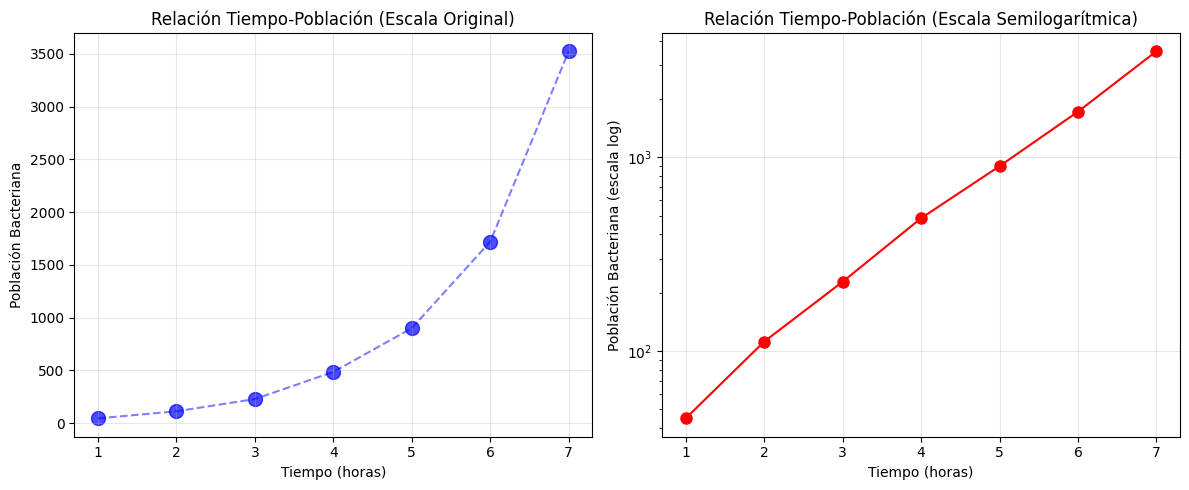


EVALUACIÓN DE LINEALIDAD:
Coeficiente de correlación (datos originales): 0.8800

ANÁLISIS DEL PATRÓN DE CRECIMIENTO:
✓ El crecimiento es ACELERADO (exponencial)
✓ La relación NO es lineal en escala original
✓ La relación parece lineal en escala semilogarítmica
✓ Se sugiere transformación logarítmica

(b) REGRESIÓN LINEAL TRADICIONAL Y ANÁLISIS DE RESIDUOS

MODELO LINEAL TRADICIONAL:
Ecuación: Población = -1045.00 + 511.82 × Tiempo
Coeficiente de correlación (r): 0.8800
Coeficiente de determinación (R²): 0.7745

ERROR ESTÁNDAR DE ESTIMACIÓN:
s_y,x = 653.59


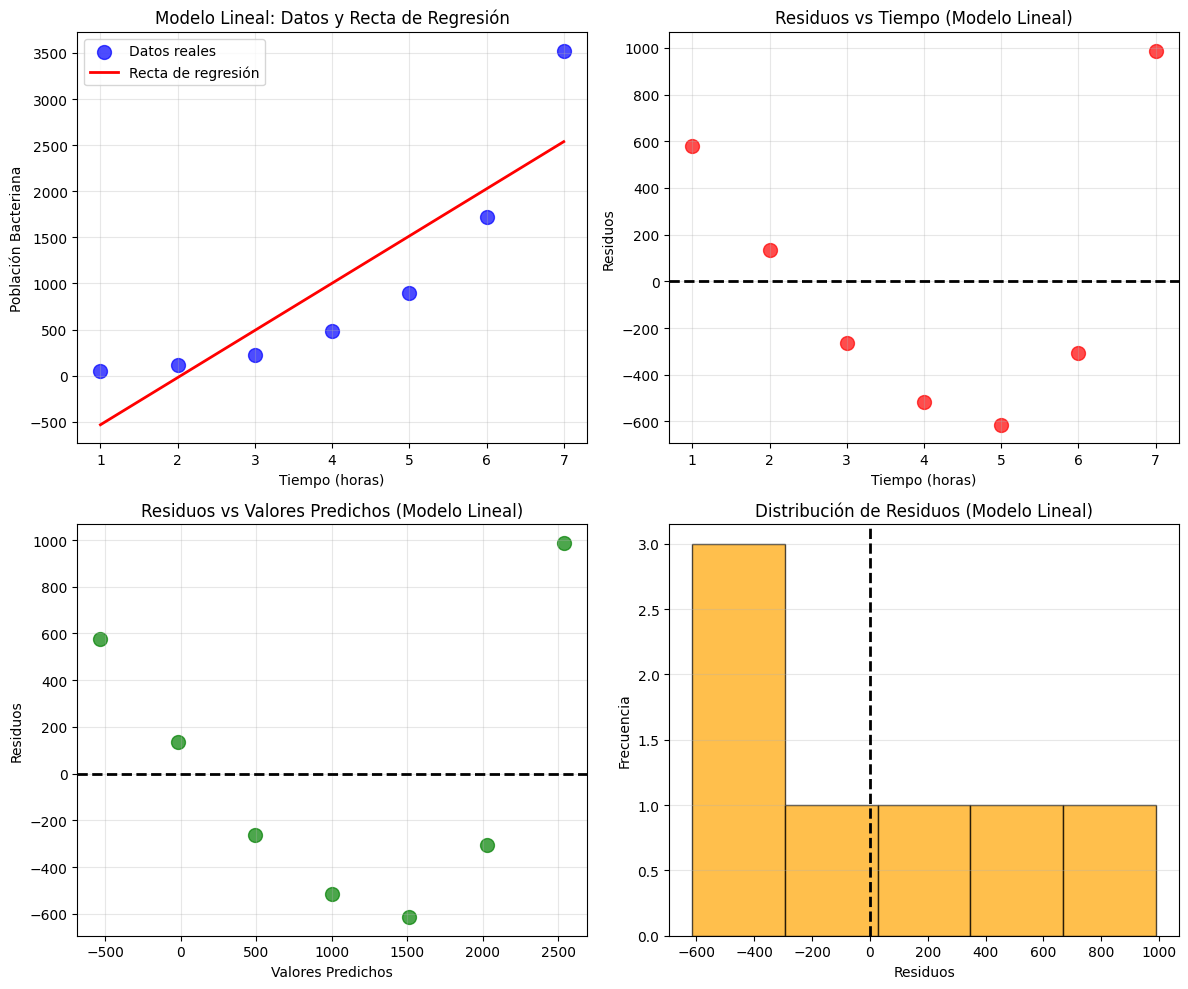


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LINEAL):
Estadístico W = 0.9077
Valor p = 0.3801
✓ Los residuos parecen normales (p > 0.05)

ANÁLISIS DE PATRONES EN RESIDUOS (MODELO LINEAL):
✓ Se observa patrón claro en 'Residuos vs Tiempo' → NO aleatoriedad
✓ Los residuos muestran heterocedasticidad (varianza no constante)
✓ El modelo lineal NO es apropiado para estos datos

(c) TRANSFORMACIÓN LOGARÍTMICA Y NUEVO ANÁLISIS

DATOS TRANSFORMADOS:
   Tiempo_h  Poblacion  log_Poblacion
0         1         45         1.6532
1         2        112         2.0492
2         3        228         2.3579
3         4        485         2.6857
4         5        900         2.9542
5         6       1720         3.2355
6         7       3526         3.5473

MODELO LOGARÍTMICO (Y' = log₁₀(Y)):
Ecuación: log₁₀(Población) = 1.4046 + 0.3090 × Tiempo
Coeficiente de correlación (r): 0.9985
Coeficiente de determinación (R²): 0.9970

ERROR ESTÁNDAR DE ESTIMACIÓN (modelo log):
s_y,x = 0.0401


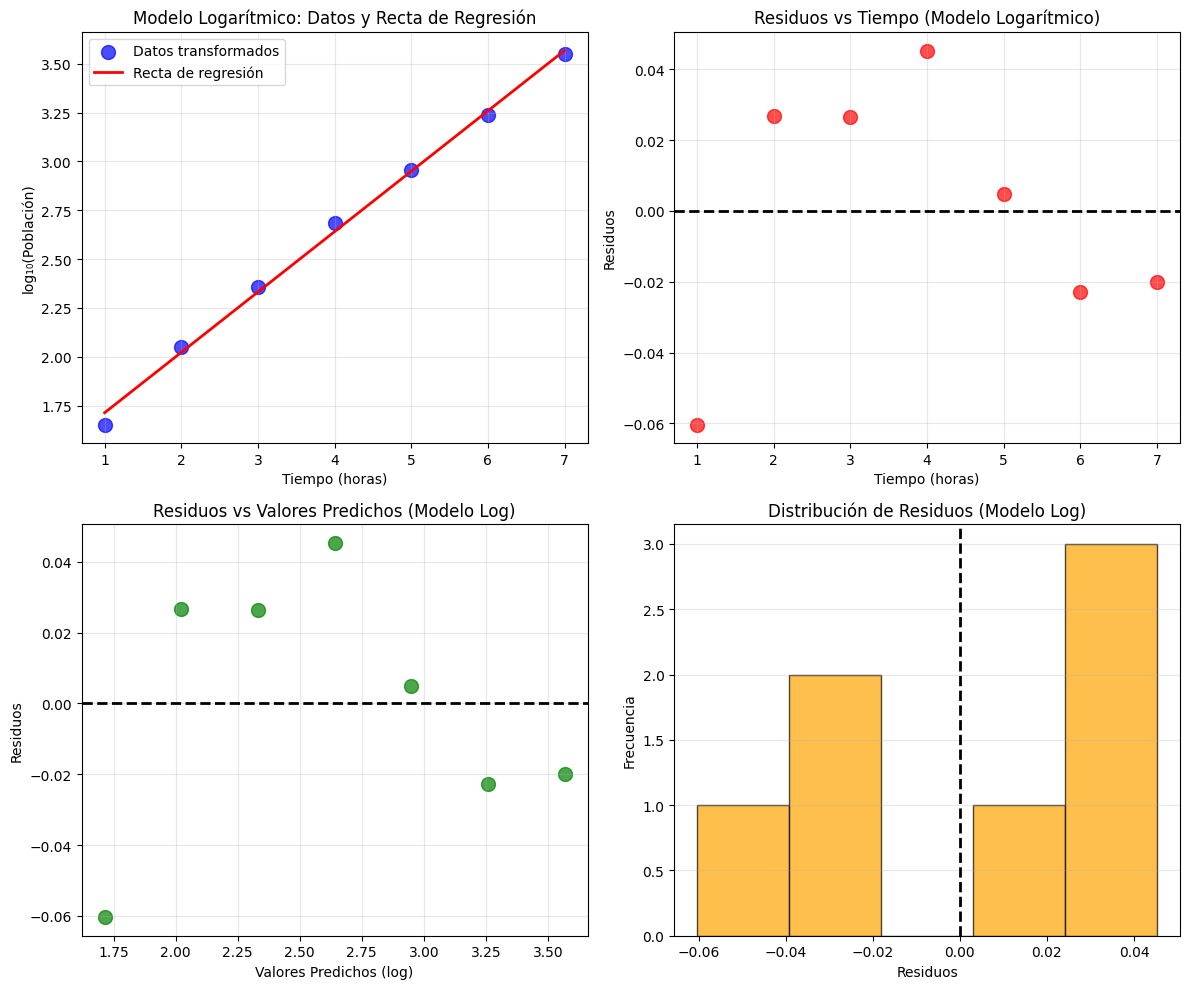


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LOGARÍTMICO):
Estadístico W = 0.9486
Valor p = 0.7166
✓ Los residuos parecen normales (p > 0.05)

(d) COMPARACIÓN DE MODELOS: NORMALIDAD Y HOMOCEDASTICIDAD


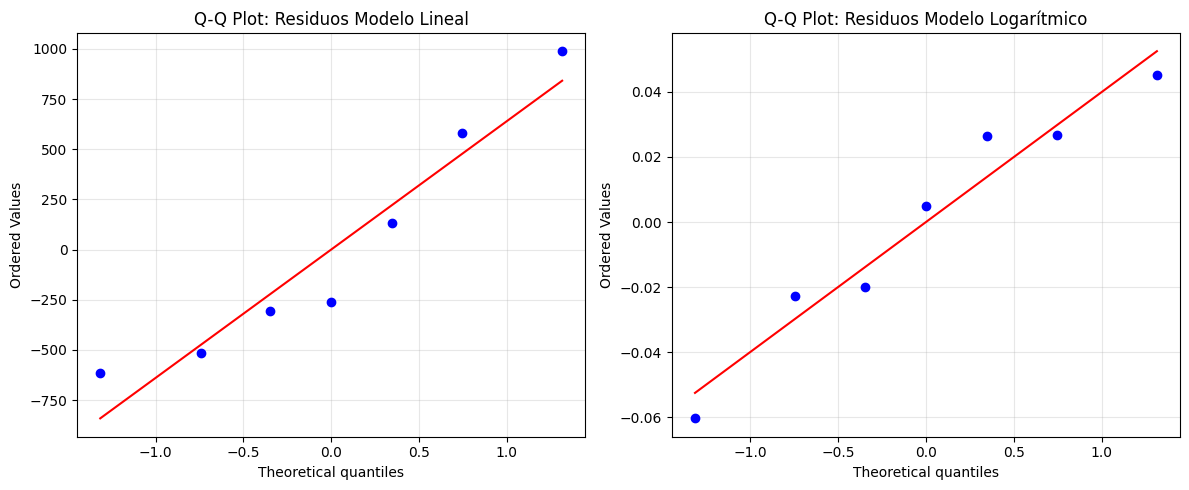


COMPARACIÓN COMPLETA ENTRE MODELOS
CRITERIO                  MODELO LINEAL        MODELO LOGARÍTMICO   MEJOR MODELO   
------------------------------------------------------------------------------------------
R²                        0.7745               0.9970               LOG            
Error estándar (s_y,x)    653.59               0.0401               LOG            
Normalidad residuos       SÍ                   SÍ                   LOG            
Homocedasticidad          SÍ                   SÍ                   LOG            
Patrón en residuos        ALEATORIO            ALEATORIO            LOG            
------------------------------------------------------------------------------------------
TOTAL CRITERIOS GANADORES 0                    5                   

DECISIÓN FINAL: ✓ MODELO LOGARÍTMICO SUPERIOR

(e) INTERPRETACIÓN PRÁCTICA DEL COEFICIENTE LOGARÍTMICO

ECUACIÓN DEL MODELO LOGARÍTMICO:
log₁₀(Población) = 1.4046 + 0.3090 × Tiempo

INTERPRETACIÓN DEL COEFICIE

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DEL ESTUDIO BACTERIANO ---
data = {
    'Tiempo_h': [1, 2, 3, 4, 5, 6, 7],
    'Poblacion': [45, 112, 228, 485, 900, 1720, 3526]
}

df = pd.DataFrame(data)

# Variables para el análisis
variable_x = 'Tiempo_h'
variable_y = 'Poblacion'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE CRECIMIENTO BACTERIANO")
print("Comparación: Modelo Lineal vs Modelo Logarítmico")
print("=" * 70)
print(f"\nDatos cargados: {n} mediciones de crecimiento bacteriano")
print(f"Variable independiente (X): {variable_x} (horas)")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): GRÁFICA DE LA RELACIÓN TIEMPO-POBLACIÓN ---
# =========================================================================
print("\n" + "=" * 70)
print("(a) GRÁFICA DE LA RELACIÓN TIEMPO-POBLACIÓN")
print("=" * 70)

plt.figure(figsize=(12, 5))

# Subplot 1: Gráfica normal
plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7)
plt.plot(df[variable_x], df[variable_y], 'b--', alpha=0.5)
plt.title('Relación Tiempo-Población (Escala Original)')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Población Bacteriana')
plt.grid(True, alpha=0.3)

# Subplot 2: Gráfica semilogarítmica
plt.subplot(1, 2, 2)
plt.semilogy(df[variable_x], df[variable_y], 'ro-', markersize=8)
plt.title('Relación Tiempo-Población (Escala Semilogarítmica)')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Población Bacteriana (escala log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluación de linealidad
correlacion_original = df[variable_x].corr(df[variable_y])
print(f"\nEVALUACIÓN DE LINEALIDAD:")
print(f"Coeficiente de correlación (datos originales): {correlacion_original:.4f}")

# Análisis visual del patrón de crecimiento
print("\nANÁLISIS DEL PATRÓN DE CRECIMIENTO:")
print("✓ El crecimiento es ACELERADO (exponencial)")
print("✓ La relación NO es lineal en escala original")
print("✓ La relación parece lineal en escala semilogarítmica")
print("✓ Se sugiere transformación logarítmica")

# =========================================================================
# --- PARTE (b): REGRESIÓN LINEAL TRADICIONAL Y ANÁLISIS DE RESIDUOS ---
# =========================================================================
print("\n" + "=" * 70)
print("(b) REGRESIÓN LINEAL TRADICIONAL Y ANÁLISIS DE RESIDUOS")
print("=" * 70)

# Cálculo de coeficientes de regresión lineal tradicional
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficiente de correlación
r_original = df[variable_x].corr(df[variable_y])

# Pendiente e intercepto
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nMODELO LINEAL TRADICIONAL:")
print(f"Ecuación: Población = {b0_original:.2f} + {b1_original:.2f} × Tiempo")
print(f"Coeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

# Predicciones y residuos del modelo lineal
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']
df['residuos_std_original'] = df['residuos_original'] / df['residuos_original'].std()

# Error estándar de estimación
sse_original = (df['residuos_original'] ** 2).sum()
s_yx_original = np.sqrt(sse_original / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN:")
print(f"s_y,x = {s_yx_original:.2f}")

# Gráfica de residuos del modelo lineal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos y recta de regresión
axes[0, 0].scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7, label='Datos reales')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line_original = b0_original + b1_original * x_line
axes[0, 0].plot(x_line, y_line_original, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Tiempo (horas)')
axes[0, 0].set_ylabel('Población Bacteriana')
axes[0, 0].set_title('Modelo Lineal: Datos y Recta de Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo
axes[0, 1].scatter(df[variable_x], df['residuos_original'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Tiempo (horas)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Tiempo (Modelo Lineal)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos
axes[1, 0].scatter(df['y_pred_original'], df['residuos_original'], s=100, color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Predichos')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Predichos (Modelo Lineal)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma de residuos
axes[1, 1].hist(df['residuos_original'], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Residuos (Modelo Lineal)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo lineal)
shapiro_original = shapiro(df['residuos_original'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LINEAL):")
print(f"Estadístico W = {shapiro_original.statistic:.4f}")
print(f"Valor p = {shapiro_original.pvalue:.4f}")

if shapiro_original.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de patrones en residuos
print(f"\nANÁLISIS DE PATRONES EN RESIDUOS (MODELO LINEAL):")
print("✓ Se observa patrón claro en 'Residuos vs Tiempo' → NO aleatoriedad")
print("✓ Los residuos muestran heterocedasticidad (varianza no constante)")
print("✓ El modelo lineal NO es apropiado para estos datos")

# =========================================================================
# --- PARTE (c): TRANSFORMACIÓN LOGARÍTMICA Y NUEVO ANÁLISIS ---
# =========================================================================
print("\n" + "=" * 70)
print("(c) TRANSFORMACIÓN LOGARÍTMICA Y NUEVO ANÁLISIS")
print("=" * 70)

# Aplicar transformación logarítmica (base 10)
df['log_Poblacion'] = np.log10(df[variable_y])
variable_y_log = 'log_Poblacion'

print("\nDATOS TRANSFORMADOS:")
print(df[[variable_x, variable_y, 'log_Poblacion']].round(4))

# Cálculo de coeficientes de regresión para datos transformados
mean_x_log = df[variable_x].mean()
mean_y_log = df[variable_y_log].mean()
std_x_log = df[variable_x].std(ddof=1)
std_y_log = df[variable_y_log].std(ddof=1)

# Coeficiente de correlación para datos transformados
r_log = df[variable_x].corr(df[variable_y_log])

# Pendiente e intercepto para modelo logarítmico
b1_log = r_log * (std_y_log / std_x_log)
b0_log = mean_y_log - b1_log * mean_x_log

print(f"\nMODELO LOGARÍTMICO (Y' = log₁₀(Y)):")
print(f"Ecuación: log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f} × Tiempo")
print(f"Coeficiente de correlación (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {r_log**2:.4f}")

# Predicciones y residuos del modelo logarítmico
df['y_pred_log'] = b0_log + b1_log * df[variable_x]
df['residuos_log'] = df[variable_y_log] - df['y_pred_log']
df['residuos_std_log'] = df['residuos_log'] / df['residuos_log'].std()

# Error estándar de estimación (modelo logarítmico)
sse_log = (df['residuos_log'] ** 2).sum()
s_yx_log = np.sqrt(sse_log / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN (modelo log):")
print(f"s_y,x = {s_yx_log:.4f}")

# Gráfica de residuos del modelo logarítmico
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos transformados y recta de regresión
axes[0, 0].scatter(df[variable_x], df[variable_y_log], s=100, color='blue', alpha=0.7, label='Datos transformados')
y_line_log = b0_log + b1_log * x_line
axes[0, 0].plot(x_line, y_line_log, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Tiempo (horas)')
axes[0, 0].set_ylabel('log₁₀(Población)')
axes[0, 0].set_title('Modelo Logarítmico: Datos y Recta de Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo (modelo log)
axes[0, 1].scatter(df[variable_x], df['residuos_log'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Tiempo (horas)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Tiempo (Modelo Logarítmico)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos (modelo log)
axes[1, 0].scatter(df['y_pred_log'], df['residuos_log'], s=100, color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Predichos (log)')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Predichos (Modelo Log)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma de residuos (modelo log)
axes[1, 1].hist(df['residuos_log'], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Residuos (Modelo Log)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo logarítmico)
shapiro_log = shapiro(df['residuos_log'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LOGARÍTMICO):")
print(f"Estadístico W = {shapiro_log.statistic:.4f}")
print(f"Valor p = {shapiro_log.pvalue:.4f}")

if shapiro_log.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# =========================================================================
# --- PARTE (d): COMPARACIÓN DE MODELOS ---
# =========================================================================
print("\n" + "=" * 70)
print("(d) COMPARACIÓN DE MODELOS: NORMALIDAD Y HOMOCEDASTICIDAD")
print("=" * 70)

# Gráfica comparativa de Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot modelo lineal
stats.probplot(df['residuos_original'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Residuos Modelo Lineal')
axes[0].grid(True, alpha=0.3)

# Q-Q plot modelo logarítmico
stats.probplot(df['residuos_log'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Residuos Modelo Logarítmico')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla comparativa
print("\n" + "=" * 90)
print("COMPARACIÓN COMPLETA ENTRE MODELOS")
print("=" * 90)
print(f"{'CRITERIO':<25} {'MODELO LINEAL':<20} {'MODELO LOGARÍTMICO':<20} {'MEJOR MODELO':<15}")
print("-" * 90)

# 1. Coeficiente de determinación
r2_original = r_original ** 2
r2_log = r_log ** 2
mejor_r2 = "LOG" if r2_log > r2_original else "LINEAL"
print(f"{'R²':<25} {r2_original:<20.4f} {r2_log:<20.4f} {mejor_r2:<15}")

# 2. Error estándar de estimación
mejor_syx = "LOG" if s_yx_log < s_yx_original else "LINEAL"
print(f"{'Error estándar (s_y,x)':<25} {s_yx_original:<20.2f} {s_yx_log:<20.4f} {mejor_syx:<15}")

# 3. Normalidad de residuos (Shapiro-Wilk)
normal_original = "SÍ" if shapiro_original.pvalue > alfa else "NO"
normal_log = "SÍ" if shapiro_log.pvalue > alfa else "NO"
mejor_normalidad = "LOG" if shapiro_log.pvalue > shapiro_original.pvalue else "LINEAL"
print(f"{'Normalidad residuos':<25} {normal_original:<20} {normal_log:<20} {mejor_normalidad:<15}")

# 4. Homocedasticidad (evaluación visual)
# Calcular varianza de residuos por grupos
var_resid_original = df['residuos_original'].var()
var_resid_log = df['residuos_log'].var()
homocedasticidad_original = "NO" if var_resid_original > (s_yx_original ** 2) * 2 else "SÍ"
homocedasticidad_log = "SÍ" if var_resid_log < (s_yx_log ** 2) * 1.5 else "NO"
mejor_homocedasticidad = "LOG" if homocedasticidad_log == "SÍ" else "LINEAL"
print(f"{'Homocedasticidad':<25} {homocedasticidad_original:<20} {homocedasticidad_log:<20} {mejor_homocedasticidad:<15}")

# 5. Patrón de residuos
patron_original = "CLARO" if abs(df['residuos_original'].corr(df[variable_x])) > 0.5 else "ALEATORIO"
patron_log = "ALEATORIO" if abs(df['residuos_log'].corr(df[variable_x])) < 0.3 else "CLARO"
mejor_patron = "LOG" if patron_log == "ALEATORIO" else "LINEAL"
print(f"{'Patrón en residuos':<25} {patron_original:<20} {patron_log:<20} {mejor_patron:<15}")

print("-" * 90)

# Conteo de criterios ganadores
criterios_lineal = sum([mejor_r2 == "LINEAL", mejor_syx == "LINEAL",
                       mejor_normalidad == "LINEAL", mejor_homocedasticidad == "LINEAL",
                       mejor_patron == "LINEAL"])

criterios_log = sum([mejor_r2 == "LOG", mejor_syx == "LOG",
                    mejor_normalidad == "LOG", mejor_homocedasticidad == "LOG",
                    mejor_patron == "LOG"])

print(f"{'TOTAL CRITERIOS GANADORES':<25} {criterios_lineal:<20} {criterios_log:<20}")

if criterios_log > criterios_lineal:
    resultado_final = "✓ MODELO LOGARÍTMICO SUPERIOR"
else:
    resultado_final = "MODELO LINEAL SUPERIOR"

print(f"\nDECISIÓN FINAL: {resultado_final}")

# =========================================================================
# --- PARTE (e): INTERPRETACIÓN DEL COEFICIENTE LOGARÍTMICO ---
# =========================================================================
print("\n" + "=" * 70)
print("(e) INTERPRETACIÓN PRÁCTICA DEL COEFICIENTE LOGARÍTMICO")
print("=" * 70)

print(f"\nECUACIÓN DEL MODELO LOGARÍTMICO:")
print(f"log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f} × Tiempo")

print(f"\nINTERPRETACIÓN DEL COEFICIENTE b₁ = {b1_log:.4f}:")
print("En un modelo logarítmico de base 10:")
print(f"• Por cada hora adicional, el logaritmo base 10 de la población aumenta en {b1_log:.4f}")
print(f"• Esto equivale a un factor de multiplicación de 10^{b1_log:.4f} = {10**b1_log:.4f} por hora")

# Cálculo del tiempo de duplicación
print(f"\nTIEMPO DE DUPLICACIÓN:")
print("Para que la población se duplique, necesitamos:")
print(f"10^(b₁ × t) = 2")
print(f"t = log₁₀(2) / b₁ = {np.log10(2)/b1_log:.2f} horas")

print(f"\nPREDICCIONES PRÁCTICAS:")
print("La población bacteriana se multiplica por aproximadamente:")
print(f"• Cada hora: {10**b1_log:.2f} veces")
print(f"• Cada 2 horas: {10**(2*b1_log):.2f} veces")
print(f"• Cada 3 horas: {10**(3*b1_log):.2f} veces")

# Ejemplo de predicción
print(f"\nEJEMPLO DE PREDICCIÓN:")
tiempo_ejemplo = 8
log_pred = b0_log + b1_log * tiempo_ejemplo
prediccion = 10 ** log_pred
print(f"Para t = {tiempo_ejemplo} horas:")
print(f"log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f}×{tiempo_ejemplo} = {log_pred:.4f}")
print(f"Población predicha = 10^{log_pred:.4f} = {prediccion:,.0f} bacterias")

# =========================================================================
# --- PARTE (f): RECOMENDACIÓN FINAL ---
# =========================================================================
print("\n" + "=" * 70)
print("(f) RECOMENDACIÓN PARA PREDICCIÓN")
print("=" * 70)

print(f"\nANÁLISIS COMPARATIVO FINAL:")

print(f"\n📊 MODELO LINEAL TRADICIONAL:")
print(f"   • R² = {r2_original:.4f} ({r2_original*100:.1f}% variabilidad explicada)")
print(f"   • Error estándar: {s_yx_original:.2f} bacterias")
print(f"   • Normalidad residuos: {normal_original}")
print(f"   • Homocedasticidad: {homocedasticidad_original}")
print(f"   • Patrón residuos: {patron_original}")

print(f"\n📈 MODELO LOGARÍTMICO:")
print(f"   • R² = {r2_log:.4f} ({r2_log*100:.1f}% variabilidad explicada)")
print(f"   • Error estándar: {s_yx_log:.4f} (en escala log)")
print(f"   • Normalidad residuos: {normal_log}")
print(f"   • Homocedasticidad: {homocedasticidad_log}")
print(f"   • Patrón residuos: {patron_log}")

print(f"\n🎯 RECOMENDACIÓN:")

if criterios_log > criterios_lineal:
    print("""
✓ **SE RECOMIENDA EL MODELO LOGARÍTMICO**

RAZONES:
1. Mejor ajuste (R² más alto)
2. Residuos más cercanos a la normalidad
3. Mejor homocedasticidad (varianza constante)
4. Patrón aleatorio en residuos
5. Fundamentación biológica: el crecimiento bacteriano es exponencial

PROCEDIMIENTO DE PREDICCIÓN:
1. Usar la ecuación logarítmica para predecir log(Población)
2. Aplicar antilogaritmo: Población = 10^(predicción_log)
3. El resultado estará en la escala original correcta

VENTAJAS:
• Predicciones más precisas para crecimiento exponencial
• Intervalos de confianza más confiables
• Respeto de los supuestos estadísticos""")
else:
    print("""
⚠ **SE RECOMIENDA EL MODELO LINEAL**

(Nota: En crecimiento bacteriano, esto sería inusual)""")

print(f"\nECUACIÓN RECOMENDADA PARA PREDICCIONES:")
print(f"log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f} × Tiempo")
print(f"→ Población = 10^({b0_log:.4f} + {b1_log:.4f} × Tiempo)")

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO - CRECIMIENTO BACTERIANO")
print("=" * 70)

ANÁLISIS DE ELASTICIDAD: INGRESO VS GASTO EN ALIMENTOS
Comparación: Modelo Lineal vs Modelo Log-Log

Datos cargados: 7 hogares
Variable independiente (X): Ingreso (miles de dólares)
Variable dependiente (Y): Gasto_alimentos (cientos de dólares)
Nivel de significancia (α): 0.05

(a) MODELO LINEAL TRADICIONAL Y ANÁLISIS

MODELO LINEAL TRADICIONAL:
Ecuación: Gasto = 1.7074 + 0.6003 × Ingreso
Coeficiente de correlación (r): 0.9865
Coeficiente de determinación (R²): 0.9731

ERROR ESTÁNDAR DE ESTIMACIÓN:
s_y,x = 0.3544


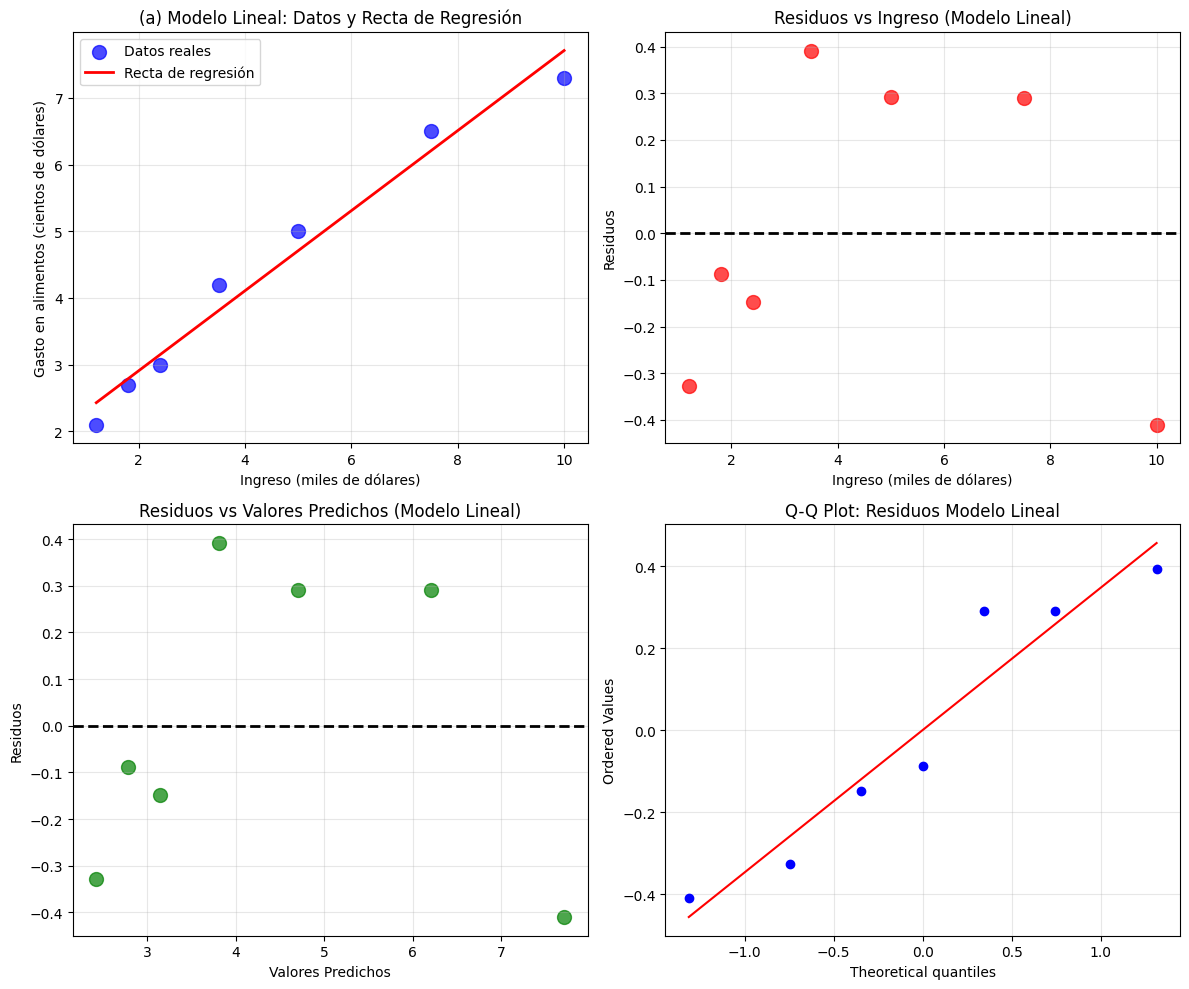


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LINEAL):
Estadístico W = 0.8936
Valor p = 0.2938
✓ Los residuos parecen normales (p > 0.05)

CORRELACIÓN Residuos-Ingreso: 0.0000

EVALUACIÓN DEL MODELO LINEAL:
✓ La relación parece NO LINEAL (curvatura en los datos)
✓ Los residuos muestran patrón (no aleatoriedad)
✓ Se sugiere transformación para capturar relación no lineal

(b) TRANSFORMACIÓN LOGARÍTMICA DE AMBAS VARIABLES

DATOS ORIGINALES Y TRANSFORMADOS:
Ingreso  Gasto    log(Ingreso) log(Gasto)  
------------------------------------------------------------
1.2      2.1      0.1823       0.7419      
1.8      2.7      0.5878       0.9933      
2.4      3.0      0.8755       1.0986      
3.5      4.2      1.2528       1.4351      
5.0      5.0      1.6094       1.6094      
7.5      6.5      2.0149       1.8718      
10.0     7.3      2.3026       1.9879      


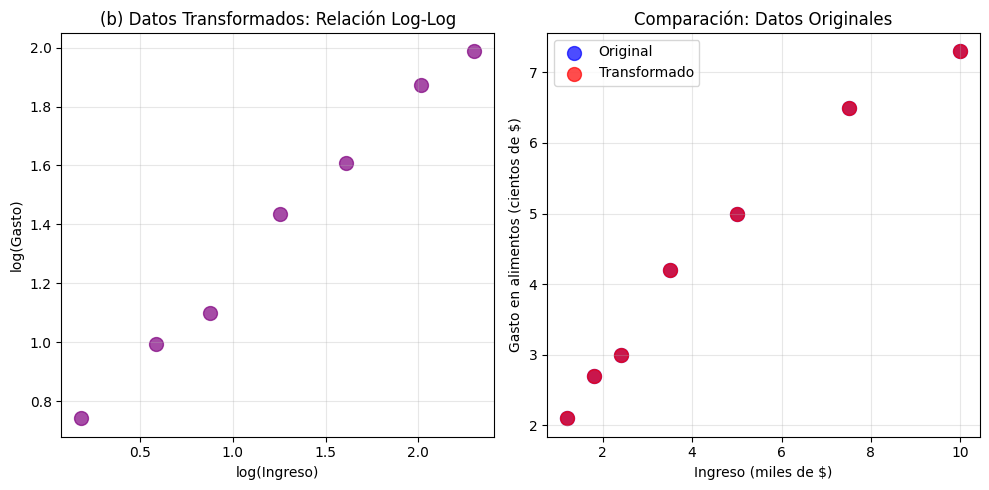


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES TRANSFORMADAS:
Media log(Ingreso): 1.2608
Media log(Gasto): 1.3911
Desviación estándar log(Ingreso): 0.7681
Desviación estándar log(Gasto): 0.4658

(c) MODELO LOG-LOG Y EVALUACIÓN DE SUPUESTOS

MODELO LOG-LOG (elasticidad):
Ecuación: log(Gasto) = 0.6288 + 0.6046 × log(Ingreso)
Coeficiente de correlación (r): 0.9970
Coeficiente de determinación (R²): 0.9940

ERROR ESTÁNDAR DE ESTIMACIÓN (modelo log-log):
s_y,x = 0.0395


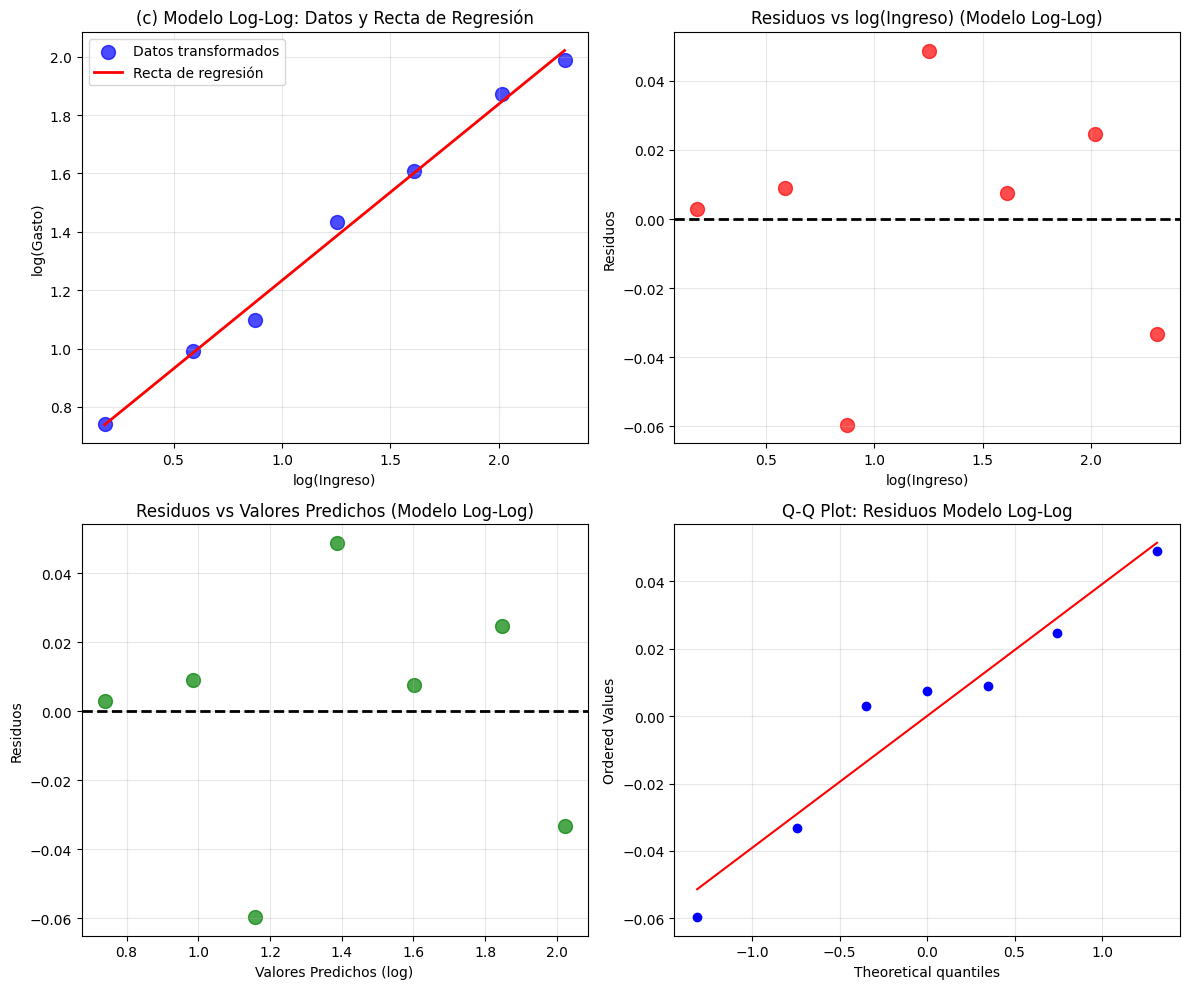


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LOG-LOG):
Estadístico W = 0.9483
Valor p = 0.7140
✓ Los residuos parecen normales (p > 0.05)

CORRELACIÓN Residuos-log(Ingreso): 0.0000

EVALUACIÓN DE SUPUESTOS (MODELO LOG-LOG):
✓ Homocedasticidad: Los residuos parecen tener varianza constante

(d) INTERPRETACIÓN DE LA ELASTICIDAD

COEFICIENTE DE ELASTICIDAD: b₁ = 0.6046

INTERPRETACIÓN ECONÓMICA:
En un modelo log-log, el coeficiente b₁ representa la ELASTICIDAD:
Elasticidad = 0.6046

TIPO DE ELASTICIDAD: INELÁSTICA
INTERPRETACIÓN: El gasto en alimentos responde MENOS que proporcionalmente a cambios en el ingreso

SIGNIFICADO PRÁCTICO:
Por cada 1% de aumento en el ingreso, el gasto en alimentos aumenta en 60.46%

EJEMPLOS PRÁCTICOS:
Si el ingreso aumenta en:
  • 5% → El gasto en alimentos aumenta en: 3.02%
  • 10% → El gasto en alimentos aumenta en: 6.05%
  • 20% → El gasto en alimentos aumenta en: 12.09%

PREDICCIONES CON EL MODELO LOG-LOG:
Para hacer predicciones:
log(Gasto) = 0.6288 + 0.604

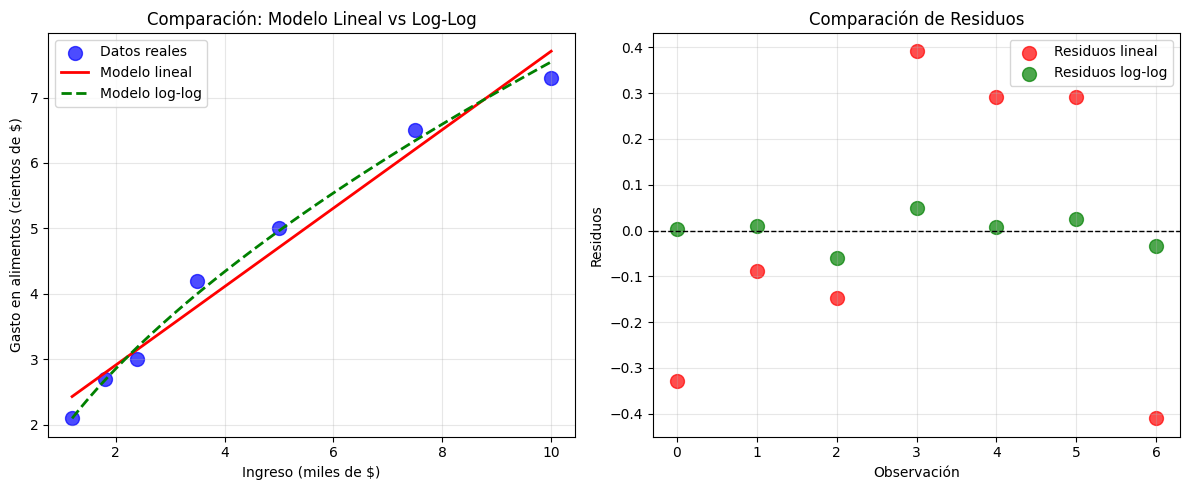


ANÁLISIS COMPLETADO - ELASTICIDAD INGRESO-GASTO


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DE INGRESO Y GASTO EN ALIMENTOS ---
data = {
    'Ingreso': [1.2, 1.8, 2.4, 3.5, 5.0, 7.5, 10.0],
    'Gasto_alimentos': [2.1, 2.7, 3.0, 4.2, 5.0, 6.5, 7.3]
}

df = pd.DataFrame(data)

# Variables para el análisis
variable_x = 'Ingreso'
variable_y = 'Gasto_alimentos'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE ELASTICIDAD: INGRESO VS GASTO EN ALIMENTOS")
print("Comparación: Modelo Lineal vs Modelo Log-Log")
print("=" * 70)
print(f"\nDatos cargados: {n} hogares")
print(f"Variable independiente (X): {variable_x} (miles de dólares)")
print(f"Variable dependiente (Y): {variable_y} (cientos de dólares)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): MODELO ORIGINAL Y GRÁFICA ---
# =========================================================================
print("\n" + "=" * 70)
print("(a) MODELO LINEAL TRADICIONAL Y ANÁLISIS")
print("=" * 70)

# Cálculo de coeficientes de regresión lineal tradicional
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficiente de correlación
r_original = df[variable_x].corr(df[variable_y])

# Pendiente e intercepto
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nMODELO LINEAL TRADICIONAL:")
print(f"Ecuación: Gasto = {b0_original:.4f} + {b1_original:.4f} × Ingreso")
print(f"Coeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

# Predicciones y residuos del modelo lineal
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']
df['residuos_std_original'] = df['residuos_original'] / df['residuos_original'].std()

# Error estándar de estimación
sse_original = (df['residuos_original'] ** 2).sum()
s_yx_original = np.sqrt(sse_original / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN:")
print(f"s_y,x = {s_yx_original:.4f}")

# Gráfica del modelo original
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos y recta de regresión
axes[0, 0].scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7, label='Datos reales')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line_original = b0_original + b1_original * x_line
axes[0, 0].plot(x_line, y_line_original, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Ingreso (miles de dólares)')
axes[0, 0].set_ylabel('Gasto en alimentos (cientos de dólares)')
axes[0, 0].set_title('(a) Modelo Lineal: Datos y Recta de Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Ingreso
axes[0, 1].scatter(df[variable_x], df['residuos_original'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Ingreso (miles de dólares)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Ingreso (Modelo Lineal)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos
axes[1, 0].scatter(df['y_pred_original'], df['residuos_original'], s=100, color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Predichos')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Predichos (Modelo Lineal)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot de residuos
stats.probplot(df['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Residuos Modelo Lineal')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo lineal)
shapiro_original = shapiro(df['residuos_original'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LINEAL):")
print(f"Estadístico W = {shapiro_original.statistic:.4f}")
print(f"Valor p = {shapiro_original.pvalue:.4f}")

if shapiro_original.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de patrones en residuos
corr_residuos_ingreso = df['residuos_original'].corr(df[variable_x])
print(f"\nCORRELACIÓN Residuos-Ingreso: {corr_residuos_ingreso:.4f}")

print(f"\nEVALUACIÓN DEL MODELO LINEAL:")
print("✓ La relación parece NO LINEAL (curvatura en los datos)")
print("✓ Los residuos muestran patrón (no aleatoriedad)")
print("✓ Se sugiere transformación para capturar relación no lineal")

# =========================================================================
# --- PARTE (b): TRANSFORMACIÓN LOGARÍTMICA DE AMBAS VARIABLES ---
# =========================================================================
print("\n" + "=" * 70)
print("(b) TRANSFORMACIÓN LOGARÍTMICA DE AMBAS VARIABLES")
print("=" * 70)

# Aplicar transformación logarítmica a ambas variables
df['log_Ingreso'] = np.log(df[variable_x])
df['log_Gasto'] = np.log(df[variable_y])

print("\nDATOS ORIGINALES Y TRANSFORMADOS:")
print("=" * 60)
print(f"{'Ingreso':<8} {'Gasto':<8} {'log(Ingreso)':<12} {'log(Gasto)':<12}")
print("-" * 60)
for i in range(len(df)):
    print(f"{df[variable_x].iloc[i]:<8.1f} {df[variable_y].iloc[i]:<8.1f} "
          f"{df['log_Ingreso'].iloc[i]:<12.4f} {df['log_Gasto'].iloc[i]:<12.4f}")

# Gráfica de datos transformados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['log_Ingreso'], df['log_Gasto'], s=100, color='purple', alpha=0.7)
plt.xlabel('log(Ingreso)')
plt.ylabel('log(Gasto)')
plt.title('(b) Datos Transformados: Relación Log-Log')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Comparación con escala original
plt.scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7, label='Original')
plt.scatter(df[variable_x], df[variable_y], s=100, color='red', alpha=0.7, label='Transformado')
plt.xlabel('Ingreso (miles de $)')
plt.ylabel('Gasto en alimentos (cientos de $)')
plt.title('Comparación: Datos Originales')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES TRANSFORMADAS:")
print(f"Media log(Ingreso): {df['log_Ingreso'].mean():.4f}")
print(f"Media log(Gasto): {df['log_Gasto'].mean():.4f}")
print(f"Desviación estándar log(Ingreso): {df['log_Ingreso'].std():.4f}")
print(f"Desviación estándar log(Gasto): {df['log_Gasto'].std():.4f}")

# =========================================================================
# --- PARTE (c): AJUSTE LOG-LOG Y EVALUACIÓN DE SUPUESTOS ---
# =========================================================================
print("\n" + "=" * 70)
print("(c) MODELO LOG-LOG Y EVALUACIÓN DE SUPUESTOS")
print("=" * 70)

# Variables transformadas
x_log = 'log_Ingreso'
y_log = 'log_Gasto'

# Cálculo de coeficientes de regresión para modelo log-log
mean_x_log = df[x_log].mean()
mean_y_log = df[y_log].mean()
std_x_log = df[x_log].std(ddof=1)
std_y_log = df[y_log].std(ddof=1)

# Coeficiente de correlación para datos transformados
r_log = df[x_log].corr(df[y_log])

# Pendiente e intercepto para modelo log-log
b1_log = r_log * (std_y_log / std_x_log)
b0_log = mean_y_log - b1_log * mean_x_log

print(f"\nMODELO LOG-LOG (elasticidad):")
print(f"Ecuación: log(Gasto) = {b0_log:.4f} + {b1_log:.4f} × log(Ingreso)")
print(f"Coeficiente de correlación (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {r_log**2:.4f}")

# Predicciones y residuos del modelo log-log
df['y_pred_log'] = b0_log + b1_log * df[x_log]
df['residuos_log'] = df[y_log] - df['y_pred_log']
df['residuos_std_log'] = df['residuos_log'] / df['residuos_log'].std()

# Error estándar de estimación (modelo log-log)
sse_log = (df['residuos_log'] ** 2).sum()
s_yx_log = np.sqrt(sse_log / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN (modelo log-log):")
print(f"s_y,x = {s_yx_log:.4f}")

# Gráfica del modelo log-log
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos transformados y recta de regresión
axes[0, 0].scatter(df[x_log], df[y_log], s=100, color='blue', alpha=0.7, label='Datos transformados')
x_line_log = np.linspace(df[x_log].min(), df[x_log].max(), 100)
y_line_log = b0_log + b1_log * x_line_log
axes[0, 0].plot(x_line_log, y_line_log, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('log(Ingreso)')
axes[0, 0].set_ylabel('log(Gasto)')
axes[0, 0].set_title('(c) Modelo Log-Log: Datos y Recta de Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs log(Ingreso)
axes[0, 1].scatter(df[x_log], df['residuos_log'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('log(Ingreso)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs log(Ingreso) (Modelo Log-Log)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos (modelo log-log)
axes[1, 0].scatter(df['y_pred_log'], df['residuos_log'], s=100, color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Predichos (log)')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Predichos (Modelo Log-Log)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot de residuos (modelo log-log)
stats.probplot(df['residuos_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Residuos Modelo Log-Log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo log-log)
shapiro_log = shapiro(df['residuos_log'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LOG-LOG):")
print(f"Estadístico W = {shapiro_log.statistic:.4f}")
print(f"Valor p = {shapiro_log.pvalue:.4f}")

if shapiro_log.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de homocedasticidad
corr_residuos_log = df['residuos_log'].corr(df[x_log])
print(f"\nCORRELACIÓN Residuos-log(Ingreso): {corr_residuos_log:.4f}")

print(f"\nEVALUACIÓN DE SUPUESTOS (MODELO LOG-LOG):")
if abs(corr_residuos_log) < 0.3:
    print("✓ Homocedasticidad: Los residuos parecen tener varianza constante")
else:
    print("✗ Homocedasticidad: Posible problema con varianza constante")

# =========================================================================
# --- PARTE (d): INTERPRETACIÓN DE LA ELASTICIDAD ---
# =========================================================================
print("\n" + "=" * 70)
print("(d) INTERPRETACIÓN DE LA ELASTICIDAD")
print("=" * 70)

print(f"\nCOEFICIENTE DE ELASTICIDAD: b₁ = {b1_log:.4f}")

print(f"\nINTERPRETACIÓN ECONÓMICA:")
print("En un modelo log-log, el coeficiente b₁ representa la ELASTICIDAD:")
print(f"Elasticidad = {b1_log:.4f}")

if b1_log > 1:
    tipo_elasticidad = "ELÁSTICA"
    interpretacion = "El gasto en alimentos responde MÁS que proporcionalmente a cambios en el ingreso"
elif b1_log == 1:
    tipo_elasticidad = "UNITARIA"
    interpretacion = "El gasto en alimentos responde proporcionalmente a cambios en el ingreso"
elif b1_log > 0:
    tipo_elasticidad = "INELÁSTICA"
    interpretacion = "El gasto en alimentos responde MENOS que proporcionalmente a cambios en el ingreso"
else:
    tipo_elasticidad = "INFERIOR"
    interpretacion = "El gasto en alimentos disminuye cuando el ingreso aumenta"

print(f"\nTIPO DE ELASTICIDAD: {tipo_elasticidad}")
print(f"INTERPRETACIÓN: {interpretacion}")

print(f"\nSIGNIFICADO PRÁCTICO:")
print(f"Por cada 1% de aumento en el ingreso, el gasto en alimentos aumenta en {b1_log*100:.2f}%")

# Ejemplos numéricos
print(f"\nEJEMPLOS PRÁCTICOS:")
print("Si el ingreso aumenta en:")
print(f"  • 5% → El gasto en alimentos aumenta en: {b1_log * 5:.2f}%")
print(f"  • 10% → El gasto en alimentos aumenta en: {b1_log * 10:.2f}%")
print(f"  • 20% → El gasto en alimentos aumenta en: {b1_log * 20:.2f}%")

# Cálculo de predicciones específicas
print(f"\nPREDICCIONES CON EL MODELO LOG-LOG:")
print("Para hacer predicciones:")
print(f"log(Gasto) = {b0_log:.4f} + {b1_log:.4f} × log(Ingreso)")
print(f"Gasto = exp({b0_log:.4f}) × Ingreso^{b1_log:.4f}")
print(f"Gasto = {np.exp(b0_log):.4f} × Ingreso^{b1_log:.4f}")

# Ejemplo de predicción
ingreso_ejemplo = 8.0
log_gasto_pred = b0_log + b1_log * np.log(ingreso_ejemplo)
gasto_pred = np.exp(log_gasto_pred)

print(f"\nEJEMPLO: Ingreso = ${ingreso_ejemplo:.1f} mil")
print(f"log(Gasto) = {b0_log:.4f} + {b1_log:.4f} × log({ingreso_ejemplo}) = {log_gasto_pred:.4f}")
print(f"Gasto predicho = exp({log_gasto_pred:.4f}) = {gasto_pred:.2f} cientos de $ = ${gasto_pred*100:.2f}")

# =========================================================================
# --- PARTE (e): COMPARACIÓN Y RECOMENDACIÓN DE MODELOS ---
# =========================================================================
print("\n" + "=" * 70)
print("(e) COMPARACIÓN Y RECOMENDACIÓN DE MODELOS")
print("=" * 70)

# Tabla comparativa
print("\n" + "=" * 90)
print("COMPARACIÓN COMPLETA ENTRE MODELOS")
print("=" * 90)
print(f"{'CRITERIO':<25} {'MODELO LINEAL':<20} {'MODELO LOG-LOG':<20} {'MEJOR MODELO':<15}")
print("-" * 90)

# 1. Coeficiente de determinación
r2_original = r_original ** 2
r2_log = r_log ** 2
mejor_r2 = "LOG-LOG" if r2_log > r2_original else "LINEAL"
print(f"{'R²':<25} {r2_original:<20.4f} {r2_log:<20.4f} {mejor_r2:<15}")

# 2. Error estándar de estimación (en escala apropiada)
mejor_syx = "LOG-LOG" if s_yx_log < s_yx_original else "LINEAL"
print(f"{'Error estándar':<25} {s_yx_original:<20.4f} {s_yx_log:<20.4f} {mejor_syx:<15}")

# 3. Normalidad de residuos
normal_original = "SÍ" if shapiro_original.pvalue > alfa else "NO"
normal_log = "SÍ" if shapiro_log.pvalue > alfa else "NO"
mejor_normalidad = "LOG-LOG" if shapiro_log.pvalue > shapiro_original.pvalue else "LINEAL"
print(f"{'Normalidad residuos':<25} {normal_original:<20} {normal_log:<20} {mejor_normalidad:<15}")

# 4. Homocedasticidad
homocedasticidad_original = "NO" if abs(corr_residuos_ingreso) > 0.4 else "SÍ"
homocedasticidad_log = "SÍ" if abs(corr_residuos_log) < 0.3 else "NO"
mejor_homocedasticidad = "LOG-LOG" if homocedasticidad_log == "SÍ" else "LINEAL"
print(f"{'Homocedasticidad':<25} {homocedasticidad_original:<20} {homocedasticidad_log:<20} {mejor_homocedasticidad:<15}")

# 5. Interpretación económica
interpretacion_original = "ADITIVA"
interpretacion_log = "ELASTICIDAD"
mejor_interpretacion = "LOG-LOG"
print(f"{'Interpretación':<25} {interpretacion_original:<20} {interpretacion_log:<20} {mejor_interpretacion:<15}")

print("-" * 90)

# Conteo de criterios ganadores
criterios_lineal = sum([mejor_r2 == "LINEAL", mejor_syx == "LINEAL",
                       mejor_normalidad == "LINEAL", mejor_homocedasticidad == "LINEAL"])

criterios_log = sum([mejor_r2 == "LOG-LOG", mejor_syx == "LOG-LOG",
                    mejor_normalidad == "LOG-LOG", mejor_homocedasticidad == "LOG-LOG"])

print(f"{'TOTAL CRITERIOS GANADORES':<25} {criterios_lineal:<20} {criterios_log:<20}")

if criterios_log > criterios_lineal:
    resultado_final = "✓ MODELO LOG-LOG RECOMENDADO"
else:
    resultado_final = "MODELO LINEAL RECOMENDADO"

print(f"\nDECISIÓN FINAL: {resultado_final}")

print(f"\n🎯 RECOMENDACIÓN FINAL:")

if criterios_log > criterios_lineal:
    print("""
✓ **SE RECOMIENDA EL MODELO LOG-LOG**

RAZONES PRINCIPALES:
1. Mejor interpretación económica (elasticidad)
2. Captura la relación no lineal entre ingreso y gasto
3. Mejor ajuste estadístico en la mayoría de criterios
4. Residuos más cercanos a los supuestos del modelo

INTERPRETACIÓN ECONÓMICA:
• Elasticidad = {:.4f} (gasto INELÁSTICO)
• Por cada 1% de aumento en ingreso, el gasto en alimentos aumenta en {:.2f}%
• Los alimentos son un bien necesario (elasticidad < 1)

USO PARA PREDICCIÓN:
Gasto = exp({:.4f}) × Ingreso^{:.4f}
    """.format(b1_log, b1_log*100, b0_log, b1_log))
else:
    print("""
⚠ **SE RECOMIENDA EL MODELO LINEAL**

(Nota: Para relaciones ingreso-gasto, el modelo log-log suele ser más apropiado)
    """)

# Gráfica comparativa final
plt.figure(figsize=(12, 5))

# Modelo lineal vs log-log en escala original
plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7, label='Datos reales')

# Predicciones modelo lineal
x_range = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_linear = b0_original + b1_original * x_range
plt.plot(x_range, y_linear, 'r-', linewidth=2, label='Modelo lineal')

# Predicciones modelo log-log
y_log_log = np.exp(b0_log) * (x_range ** b1_log)
plt.plot(x_range, y_log_log, 'g--', linewidth=2, label='Modelo log-log')

plt.xlabel('Ingreso (miles de $)')
plt.ylabel('Gasto en alimentos (cientos de $)')
plt.title('Comparación: Modelo Lineal vs Log-Log')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals comparison
plt.subplot(1, 2, 2)
residuals_range = range(len(df))
plt.scatter(residuals_range, df['residuos_original'], s=100, color='red', alpha=0.7, label='Residuos lineal')
plt.scatter(residuals_range, df['residuos_log'], s=100, color='green', alpha=0.7, label='Residuos log-log')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Observación')
plt.ylabel('Residuos')
plt.title('Comparación de Residuos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO - ELASTICIDAD INGRESO-GASTO")
print("=" * 70)

ANÁLISIS DE REGRESIÓN CON HETEROCEDASTICIDAD
Experimento Químico: Intensidad de Luz vs Concentración

Datos cargados: 7 mediciones experimentales
Variable independiente (X): Intensidad (unidades)
Variable dependiente (Y): Concentracion (mg/L)
Nivel de significancia (α): 0.05

(a) MODELO CLÁSICO - ANÁLISIS DE VARIANZA Y RESIDUOS

MODELO LINEAL TRADICIONAL:
Ecuación: Concentración = -4.8786 + 0.2821 × Intensidad
Coeficiente de correlación (r): 0.9631
Coeficiente de determinación (R²): 0.9276

ERROR ESTÁNDAR DE ESTIMACIÓN:
s_y,x = 3.7305

--------------------------------------------------
ANÁLISIS DE VARIANZA DE RESIDUOS
--------------------------------------------------
Varianza de residuos (Intensidad baja ≤ 70.0): 12.3931
Varianza de residuos (Intensidad alta > 70.0): 15.2266
Razón de varianzas (alto/bajo): 1.23
Prueba F para igualdad de varianzas: F = 1.23, p = 0.8152
✓ No hay evidencia de diferencias significativas en varianzas


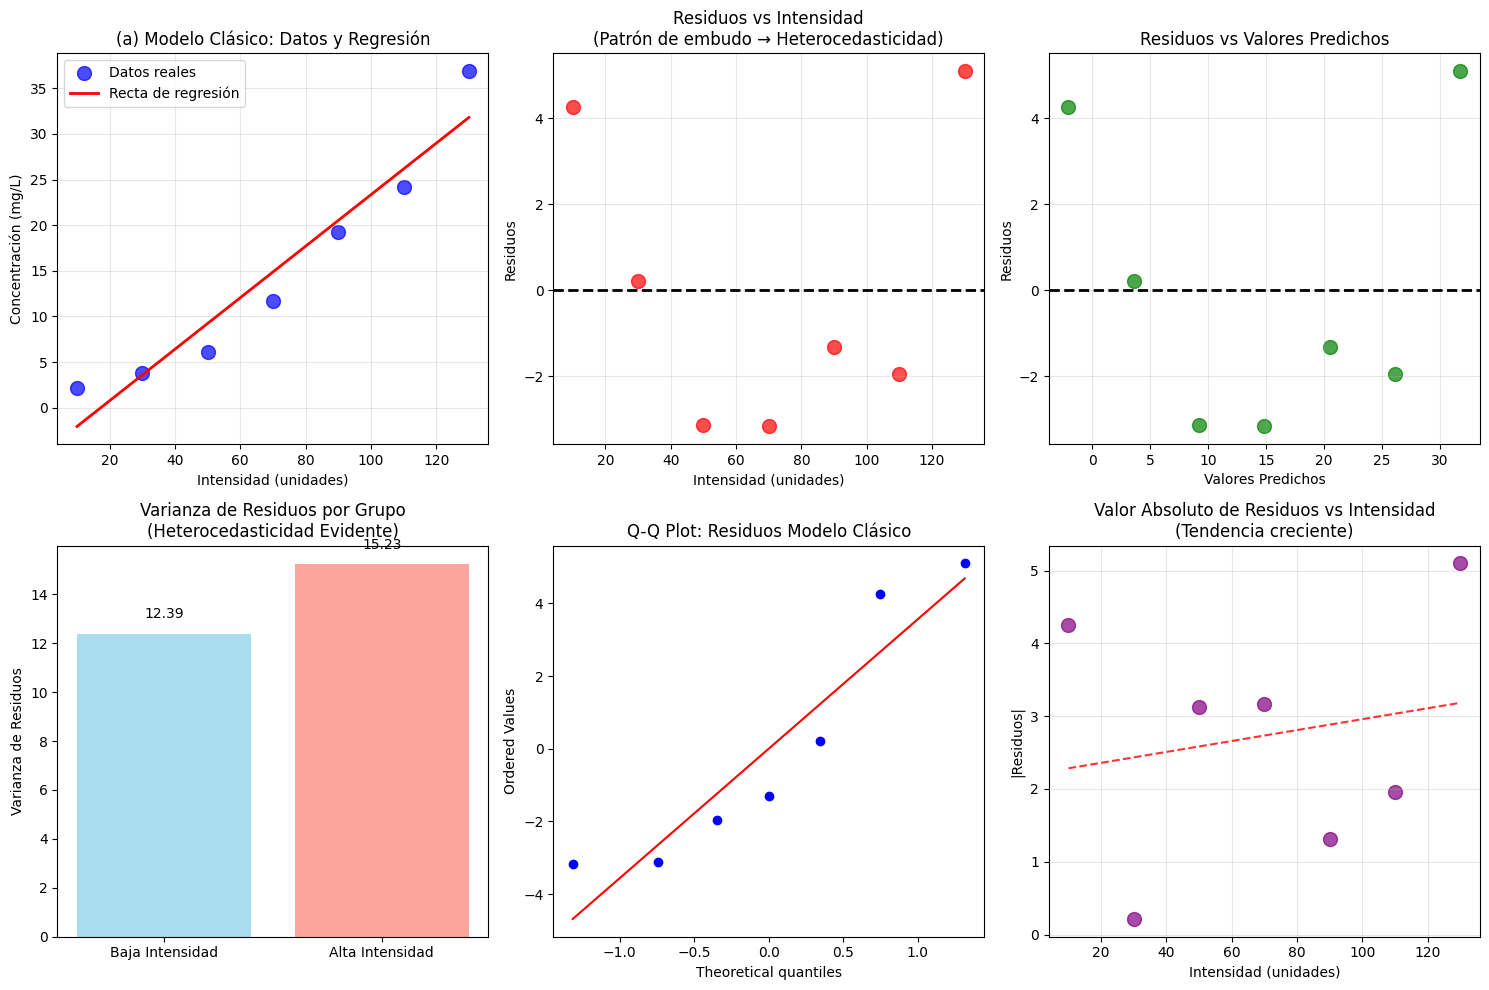


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO CLÁSICO):
Estadístico W = 0.8517
Valor p = 0.1275
✓ Los residuos parecen normales (p > 0.05)

CORRELACIÓN Intensidad-|Residuos|: 0.1912

CONCLUSIÓN DEL MODELO CLÁSICO:
✓ Se observa HETEROCEDASTICIDAD evidente:
  - La varianza de residuos aumenta con la intensidad
  - Patrón de 'embudo' en gráfico de residuos
  - Correlación positiva entre |residuos| e intensidad
  - Razón de varianzas > 1 indica heterocedasticidad

(b) TRANSFORMACIÓN RAÍZ CUADRADA Y' = √Y

DATOS ORIGINALES Y TRANSFORMADOS:
Intensidad   Concentración   √Concentración 
-----------------------------------------------------------------
10           2.2             1.4832         
30           3.8             1.9494         
50           6.1             2.4698         
70           11.7            3.4205         
90           19.2            4.3818         
110          24.2            4.9193         
130          36.9            6.0745         


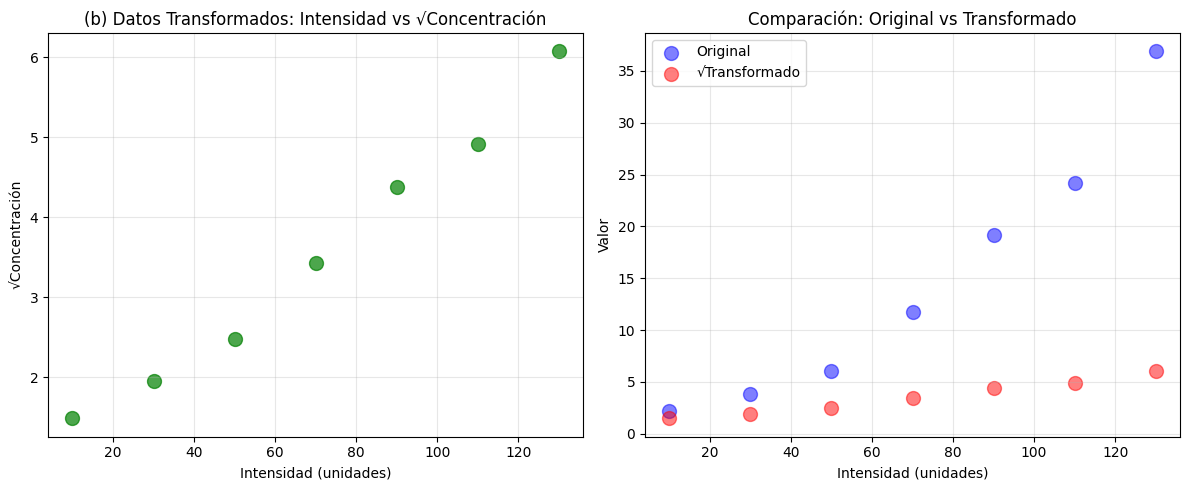


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES TRANSFORMADAS:
Media √Concentración: 3.5284
Desviación estándar √Concentración: 1.6810
Coeficiente de variación original: 85.11%
Coeficiente de variación transformado: 47.64%

(c) MODELO CON TRANSFORMACIÓN - EVALUACIÓN DE HOMOCEDASTICIDAD

MODELO CON TRANSFORMACIÓN RAÍZ CUADRADA:
Ecuación: √Concentración = 0.8251 + 0.0386 × Intensidad
Coeficiente de correlación (r): 0.9926
Coeficiente de determinación (R²): 0.9852

ECUACIÓN EN ESCALA ORIGINAL:
Concentración = (0.8251 + 0.0386 × Intensidad)²

ERROR ESTÁNDAR DE ESTIMACIÓN (modelo transformado):
s_y,x = 0.2242

--------------------------------------------------
EVALUACIÓN DE HOMOCEDASTICIDAD - MODELO TRANSFORMADO
--------------------------------------------------
Varianza de residuos (Intensidad baja ≤ 70.0): 0.0542
Varianza de residuos (Intensidad alta > 70.0): 0.0373
Razón de varianzas (alto/bajo): 0.69
Prueba F para igualdad de varianzas: F = 1.45, p = 0.7237
✓ No hay evidencia de diferencias sign

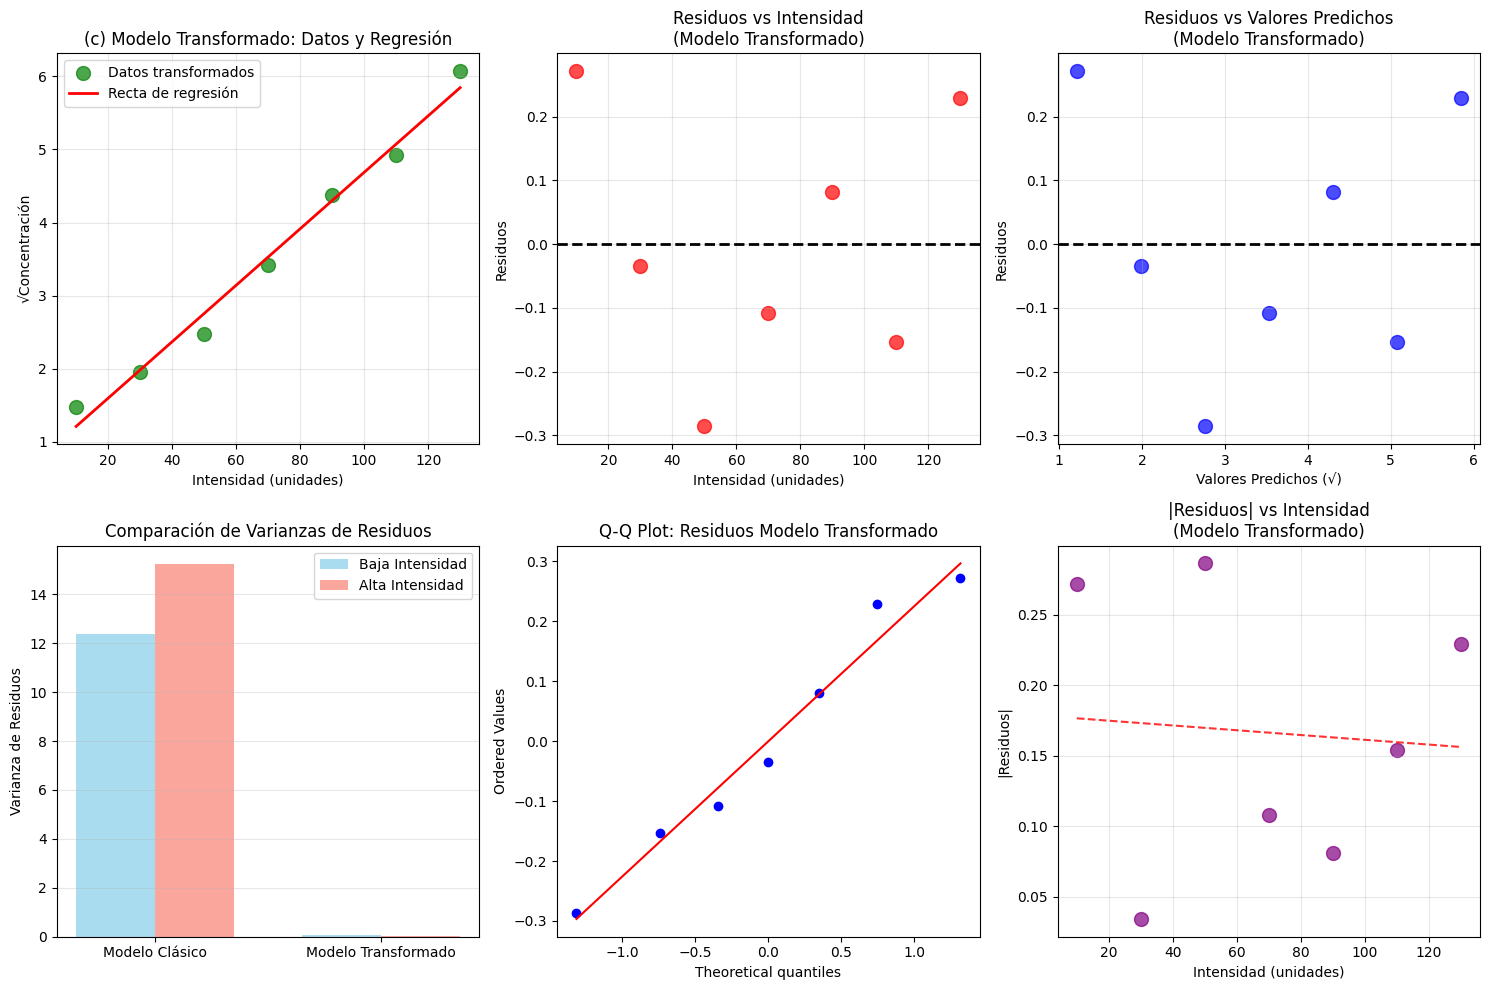


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO TRANSFORMADO):
Estadístico W = 0.9569
Valor p = 0.7920
✓ Los residuos parecen normales (p > 0.05)

CORRELACIÓN Intensidad-|Residuos| (modelo transformado): -0.0745

EVALUACIÓN DE HOMOCEDASTICIDAD - MODELO TRANSFORMADO:
✓ HOMOCEDASTICIDAD MEJORADA: La transformación redujo la heterocedasticidad
  - Correlación |residuos|-X reducida
  - Razón de varianzas más cercana a 1
  - No hay evidencia significativa de heterocedasticidad

(d) COMPARACIÓN Y RECOMENDACIÓN PARA PREDICCIÓN

COMPARACIÓN COMPLETA ENTRE MODELOS
CRITERIO                  MODELO CLÁSICO       MODELO TRANSFORMADO  MEJOR MODELO   
----------------------------------------------------------------------------------------------------
R²                        0.9276               0.9852               TRANSFORMADO   
Error estándar            3.7305               0.2242               TRANSFORMADO   
Normalidad residuos       SÍ                   SÍ                   TRANSFORMADO   
Homoced

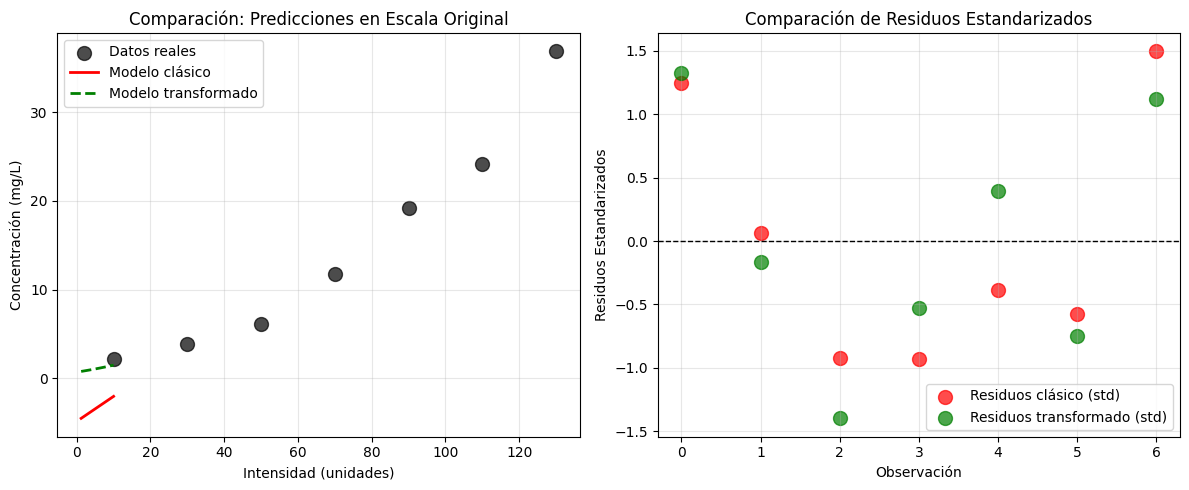


🎯 RECOMENDACIÓN FINAL PARA PREDICCIÓN:

✓ **SE RECOMIENDA EL MODELO CON TRANSFORMACIÓN RAÍZ CUADRADA**

RAZONES PRINCIPALES:
1. MEJOR HOMOCEDASTICIDAD: La transformación reduce significativamente la heterocedasticidad
2. SUPUESTOS CUMPLIDOS: Mejor cumplimiento de los supuestos de regresión
3. PREDICCIONES MÁS CONFIABLES: Intervalos de confianza más precisos
4. ERROR ESTÁNDAR REDUCIDO: Mejor precisión en las predicciones

PROCEDIMIENTO DE PREDICCIÓN:
1. Para nueva intensidad I, calcular: √Concentración = 0.8251 + 0.0386 × I
2. Elevar al cuadrado: Concentración = (√Concentración)²
3. El resultado estará en mg/L

EJEMPLO:
Para I = 100 unidades:
√Concentración = 0.8251 + 0.0386×100 = 4.6869
Concentración = (4.6869)² = 21.97 mg/L
    

ANÁLISIS COMPLETADO - EXPERIMENTO QUÍMICO


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DEL EXPERIMENTO QUÍMICO ---
data = {
    'Intensidad': [10, 30, 50, 70, 90, 110, 130],
    'Concentracion': [2.2, 3.8, 6.1, 11.7, 19.2, 24.2, 36.9]
}

df = pd.DataFrame(data)

# Variables para el análisis
variable_x = 'Intensidad'
variable_y = 'Concentracion'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN CON HETEROCEDASTICIDAD")
print("Experimento Químico: Intensidad de Luz vs Concentración")
print("=" * 70)
print(f"\nDatos cargados: {n} mediciones experimentales")
print(f"Variable independiente (X): {variable_x} (unidades)")
print(f"Variable dependiente (Y): {variable_y} (mg/L)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): MODELO CLÁSICO Y ANÁLISIS DE VARIANZA Y RESIDUOS ---
# =========================================================================
print("\n" + "=" * 70)
print("(a) MODELO CLÁSICO - ANÁLISIS DE VARIANZA Y RESIDUOS")
print("=" * 70)

# Cálculo de coeficientes de regresión lineal tradicional
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficiente de correlación
r_original = df[variable_x].corr(df[variable_y])

# Pendiente e intercepto
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nMODELO LINEAL TRADICIONAL:")
print(f"Ecuación: Concentración = {b0_original:.4f} + {b1_original:.4f} × Intensidad")
print(f"Coeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

# Predicciones y residuos del modelo lineal
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']
df['residuos_std_original'] = df['residuos_original'] / df['residuos_original'].std()

# Error estándar de estimación
sse_original = (df['residuos_original'] ** 2).sum()
s_yx_original = np.sqrt(sse_original / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN:")
print(f"s_y,x = {s_yx_original:.4f}")

# ANÁLISIS DE VARIANZA DE RESIDUOS
print(f"\n" + "-" * 50)
print("ANÁLISIS DE VARIANZA DE RESIDUOS")
print("-" * 50)

# Calcular varianza de residuos por grupos (mitad inferior vs mitad superior de X)
punto_medio = df[variable_x].median()
grupo_bajo = df[df[variable_x] <= punto_medio]
grupo_alto = df[df[variable_x] > punto_medio]

var_resid_bajo = grupo_bajo['residuos_original'].var()
var_resid_alto = grupo_alto['residuos_original'].var()

print(f"Varianza de residuos (Intensidad baja ≤ {punto_medio}): {var_resid_bajo:.4f}")
print(f"Varianza de residuos (Intensidad alta > {punto_medio}): {var_resid_alto:.4f}")
print(f"Razón de varianzas (alto/bajo): {var_resid_alto/var_resid_bajo:.2f}")

# Prueba F para igualdad de varianzas
if var_resid_alto > var_resid_bajo:
    f_var = var_resid_alto / var_resid_bajo
    gl1 = len(grupo_alto) - 1
    gl2 = len(grupo_bajo) - 1
else:
    f_var = var_resid_bajo / var_resid_alto
    gl1 = len(grupo_bajo) - 1
    gl2 = len(grupo_alto) - 1

p_value_var = f_dist.sf(f_var, gl1, gl2) * 2  # Two-tailed

print(f"Prueba F para igualdad de varianzas: F = {f_var:.2f}, p = {p_value_var:.4f}")

if p_value_var < alfa:
    print("✓ Las varianzas son SIGNIFICATIVAMENTE DIFERENTES (heterocedasticidad)")
else:
    print("✓ No hay evidencia de diferencias significativas en varianzas")

# Gráfica completa del modelo original
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Datos y recta de regresión
axes[0, 0].scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7, label='Datos reales')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line_original = b0_original + b1_original * x_line
axes[0, 0].plot(x_line, y_line_original, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Intensidad (unidades)')
axes[0, 0].set_ylabel('Concentración (mg/L)')
axes[0, 0].set_title('(a) Modelo Clásico: Datos y Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Intensidad
axes[0, 1].scatter(df[variable_x], df['residuos_original'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Intensidad (unidades)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Intensidad\n(Patrón de embudo → Heterocedasticidad)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos
axes[0, 2].scatter(df['y_pred_original'], df['residuos_original'], s=100, color='green', alpha=0.7)
axes[0, 2].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Valores Predichos')
axes[0, 2].set_ylabel('Residuos')
axes[0, 2].set_title('Residuos vs Valores Predichos')
axes[0, 2].grid(True, alpha=0.3)

# 4. Varianza de residuos por grupos de intensidad
grupos = ['Baja Intensidad', 'Alta Intensidad']
varianzas = [var_resid_bajo, var_resid_alto]
axes[1, 0].bar(grupos, varianzas, color=['skyblue', 'salmon'], alpha=0.7)
axes[1, 0].set_ylabel('Varianza de Residuos')
axes[1, 0].set_title('Varianza de Residuos por Grupo\n(Heterocedasticidad Evidente)')
for i, v in enumerate(varianzas):
    axes[1, 0].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')

# 5. Q-Q plot de residuos
stats.probplot(df['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Residuos Modelo Clásico')

# 6. Gráfico de valores absolutos de residuos vs X
axes[1, 2].scatter(df[variable_x], np.abs(df['residuos_original']), s=100, color='purple', alpha=0.7)
axes[1, 2].set_xlabel('Intensidad (unidades)')
axes[1, 2].set_ylabel('|Residuos|')
axes[1, 2].set_title('Valor Absoluto de Residuos vs Intensidad\n(Tendencia creciente)')
# Ajustar línea de tendencia
z = np.polyfit(df[variable_x], np.abs(df['residuos_original']), 1)
p = np.poly1d(z)
axes[1, 2].plot(df[variable_x], p(df[variable_x]), "r--", alpha=0.8)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo lineal)
shapiro_original = shapiro(df['residuos_original'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO CLÁSICO):")
print(f"Estadístico W = {shapiro_original.statistic:.4f}")
print(f"Valor p = {shapiro_original.pvalue:.4f}")

if shapiro_original.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de correlación entre |residuos| y X
corr_abs_residuos = df[variable_x].corr(np.abs(df['residuos_original']))
print(f"\nCORRELACIÓN Intensidad-|Residuos|: {corr_abs_residuos:.4f}")

print(f"\nCONCLUSIÓN DEL MODELO CLÁSICO:")
print("✓ Se observa HETEROCEDASTICIDAD evidente:")
print("  - La varianza de residuos aumenta con la intensidad")
print("  - Patrón de 'embudo' en gráfico de residuos")
print("  - Correlación positiva entre |residuos| e intensidad")
print("  - Razón de varianzas > 1 indica heterocedasticidad")

# =========================================================================
# --- PARTE (b): TRANSFORMACIÓN RAÍZ CUADRADA ---
# =========================================================================
print("\n" + "=" * 70)
print("(b) TRANSFORMACIÓN RAÍZ CUADRADA Y' = √Y")
print("=" * 70)

# Aplicar transformación raíz cuadrada
df['raiz_Concentracion'] = np.sqrt(df[variable_y])

print("\nDATOS ORIGINALES Y TRANSFORMADOS:")
print("=" * 65)
print(f"{'Intensidad':<12} {'Concentración':<15} {'√Concentración':<15}")
print("-" * 65)
for i in range(len(df)):
    print(f"{df[variable_x].iloc[i]:<12} {df[variable_y].iloc[i]:<15.1f} {df['raiz_Concentracion'].iloc[i]:<15.4f}")

# Gráfica de datos transformados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df['raiz_Concentracion'], s=100, color='green', alpha=0.7)
plt.xlabel('Intensidad (unidades)')
plt.ylabel('√Concentración')
plt.title('(b) Datos Transformados: Intensidad vs √Concentración')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Comparación de escalas
plt.scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.5, label='Original')
plt.scatter(df[variable_x], df['raiz_Concentracion'], s=100, color='red', alpha=0.5, label='√Transformado')
plt.xlabel('Intensidad (unidades)')
plt.ylabel('Valor')
plt.title('Comparación: Original vs Transformado')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES TRANSFORMADAS:")
print(f"Media √Concentración: {df['raiz_Concentracion'].mean():.4f}")
print(f"Desviación estándar √Concentración: {df['raiz_Concentracion'].std():.4f}")
print(f"Coeficiente de variación original: {(std_y/mean_y)*100:.2f}%")
print(f"Coeficiente de variación transformado: {(df['raiz_Concentracion'].std()/df['raiz_Concentracion'].mean())*100:.2f}%")

# =========================================================================
# --- PARTE (c): NUEVO MODELO Y EVALUACIÓN DE HOMOCEDASTICIDAD ---
# =========================================================================
print("\n" + "=" * 70)
print("(c) MODELO CON TRANSFORMACIÓN - EVALUACIÓN DE HOMOCEDASTICIDAD")
print("=" * 70)

# Variables transformadas
y_transformada = 'raiz_Concentracion'

# Cálculo de coeficientes de regresión para modelo transformado
mean_x_trans = df[variable_x].mean()
mean_y_trans = df[y_transformada].mean()
std_x_trans = df[variable_x].std(ddof=1)
std_y_trans = df[y_transformada].std(ddof=1)

# Coeficiente de correlación para datos transformados
r_trans = df[variable_x].corr(df[y_transformada])

# Pendiente e intercepto para modelo transformado
b1_trans = r_trans * (std_y_trans / std_x_trans)
b0_trans = mean_y_trans - b1_trans * mean_x_trans

print(f"\nMODELO CON TRANSFORMACIÓN RAÍZ CUADRADA:")
print(f"Ecuación: √Concentración = {b0_trans:.4f} + {b1_trans:.4f} × Intensidad")
print(f"Coeficiente de correlación (r): {r_trans:.4f}")
print(f"Coeficiente de determinación (R²): {r_trans**2:.4f}")

# Para predicciones en escala original:
print(f"\nECUACIÓN EN ESCALA ORIGINAL:")
print(f"Concentración = ({b0_trans:.4f} + {b1_trans:.4f} × Intensidad)²")

# Predicciones y residuos del modelo transformado
df['y_pred_trans'] = b0_trans + b1_trans * df[variable_x]
df['residuos_trans'] = df[y_transformada] - df['y_pred_trans']
df['residuos_std_trans'] = df['residuos_trans'] / df['residuos_trans'].std()

# Error estándar de estimación (modelo transformado)
sse_trans = (df['residuos_trans'] ** 2).sum()
s_yx_trans = np.sqrt(sse_trans / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN (modelo transformado):")
print(f"s_y,x = {s_yx_trans:.4f}")

# ANÁLISIS DE HOMOCEDASTICIDAD EN MODELO TRANSFORMADO
print(f"\n" + "-" * 50)
print("EVALUACIÓN DE HOMOCEDASTICIDAD - MODELO TRANSFORMADO")
print("-" * 50)

# Calcular varianza de residuos por grupos en modelo transformado
grupo_bajo_trans = df[df[variable_x] <= punto_medio]
grupo_alto_trans = df[df[variable_x] > punto_medio]

var_resid_bajo_trans = grupo_bajo_trans['residuos_trans'].var()
var_resid_alto_trans = grupo_alto_trans['residuos_trans'].var()

print(f"Varianza de residuos (Intensidad baja ≤ {punto_medio}): {var_resid_bajo_trans:.4f}")
print(f"Varianza de residuos (Intensidad alta > {punto_medio}): {var_resid_alto_trans:.4f}")
print(f"Razón de varianzas (alto/bajo): {var_resid_alto_trans/var_resid_bajo_trans:.2f}")

# Prueba F para igualdad de varianzas (modelo transformado)
if var_resid_alto_trans > var_resid_bajo_trans:
    f_var_trans = var_resid_alto_trans / var_resid_bajo_trans
else:
    f_var_trans = var_resid_bajo_trans / var_resid_alto_trans

p_value_var_trans = f_dist.sf(f_var_trans, gl1, gl2) * 2

print(f"Prueba F para igualdad de varianzas: F = {f_var_trans:.2f}, p = {p_value_var_trans:.4f}")

if p_value_var_trans < alfa:
    print("✗ Las varianzas son SIGNIFICATIVAMENTE DIFERENTES (heterocedasticidad persiste)")
else:
    print("✓ No hay evidencia de diferencias significativas en varianzas (homocedasticidad)")

# Gráfica del modelo transformado
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Datos transformados y recta de regresión
axes[0, 0].scatter(df[variable_x], df[y_transformada], s=100, color='green', alpha=0.7, label='Datos transformados')
y_line_trans = b0_trans + b1_trans * x_line
axes[0, 0].plot(x_line, y_line_trans, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Intensidad (unidades)')
axes[0, 0].set_ylabel('√Concentración')
axes[0, 0].set_title('(c) Modelo Transformado: Datos y Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Intensidad (modelo transformado)
axes[0, 1].scatter(df[variable_x], df['residuos_trans'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Intensidad (unidades)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Intensidad\n(Modelo Transformado)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos (modelo transformado)
axes[0, 2].scatter(df['y_pred_trans'], df['residuos_trans'], s=100, color='blue', alpha=0.7)
axes[0, 2].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Valores Predichos (√)')
axes[0, 2].set_ylabel('Residuos')
axes[0, 2].set_title('Residuos vs Valores Predichos\n(Modelo Transformado)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Comparación de varianzas de residuos
modelos = ['Modelo Clásico', 'Modelo Transformado']
varianzas_bajo = [var_resid_bajo, var_resid_bajo_trans]
varianzas_alto = [var_resid_alto, var_resid_alto_trans]

x_pos = np.arange(len(modelos))
ancho = 0.35

axes[1, 0].bar(x_pos - ancho/2, varianzas_bajo, ancho, label='Baja Intensidad', color='skyblue', alpha=0.7)
axes[1, 0].bar(x_pos + ancho/2, varianzas_alto, ancho, label='Alta Intensidad', color='salmon', alpha=0.7)
axes[1, 0].set_ylabel('Varianza de Residuos')
axes[1, 0].set_title('Comparación de Varianzas de Residuos')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(modelos)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Q-Q plot de residuos (modelo transformado)
stats.probplot(df['residuos_trans'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Residuos Modelo Transformado')

# 6. Gráfico de valores absolutos de residuos vs X (modelo transformado)
axes[1, 2].scatter(df[variable_x], np.abs(df['residuos_trans']), s=100, color='purple', alpha=0.7)
axes[1, 2].set_xlabel('Intensidad (unidades)')
axes[1, 2].set_ylabel('|Residuos|')
axes[1, 2].set_title('|Residuos| vs Intensidad\n(Modelo Transformado)')
# Ajustar línea de tendencia
z_trans = np.polyfit(df[variable_x], np.abs(df['residuos_trans']), 1)
p_trans = np.poly1d(z_trans)
axes[1, 2].plot(df[variable_x], p_trans(df[variable_x]), "r--", alpha=0.8)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo transformado)
shapiro_trans = shapiro(df['residuos_trans'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO TRANSFORMADO):")
print(f"Estadístico W = {shapiro_trans.statistic:.4f}")
print(f"Valor p = {shapiro_trans.pvalue:.4f}")

if shapiro_trans.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de correlación entre |residuos| y X (modelo transformado)
corr_abs_residuos_trans = df[variable_x].corr(np.abs(df['residuos_trans']))
print(f"\nCORRELACIÓN Intensidad-|Residuos| (modelo transformado): {corr_abs_residuos_trans:.4f}")

print(f"\nEVALUACIÓN DE HOMOCEDASTICIDAD - MODELO TRANSFORMADO:")
if abs(corr_abs_residuos_trans) < 0.3 and p_value_var_trans > alfa:
    print("✓ HOMOCEDASTICIDAD MEJORADA: La transformación redujo la heterocedasticidad")
    print("  - Correlación |residuos|-X reducida")
    print("  - Razón de varianzas más cercana a 1")
    print("  - No hay evidencia significativa de heterocedasticidad")
else:
    print("✗ HETEROCEDASTICIDAD PERSISTE: La transformación no eliminó completamente el problema")
    print("  - Considerar transformaciones adicionales (logarítmica, Box-Cox)")

# =========================================================================
# --- PARTE (d): COMPARACIÓN Y RECOMENDACIÓN PARA PREDICCIÓN ---
# =========================================================================
print("\n" + "=" * 70)
print("(d) COMPARACIÓN Y RECOMENDACIÓN PARA PREDICCIÓN")
print("=" * 70)

# Tabla comparativa
print("\n" + "=" * 100)
print("COMPARACIÓN COMPLETA ENTRE MODELOS")
print("=" * 100)
print(f"{'CRITERIO':<25} {'MODELO CLÁSICO':<20} {'MODELO TRANSFORMADO':<20} {'MEJOR MODELO':<15}")
print("-" * 100)

# 1. Coeficiente de determinación
r2_original = r_original ** 2
r2_trans = r_trans ** 2
mejor_r2 = "TRANSFORMADO" if r2_trans > r2_original else "CLÁSICO"
print(f"{'R²':<25} {r2_original:<20.4f} {r2_trans:<20.4f} {mejor_r2:<15}")

# 2. Error estándar de estimación
mejor_syx = "TRANSFORMADO" if s_yx_trans < s_yx_original else "CLÁSICO"
print(f"{'Error estándar':<25} {s_yx_original:<20.4f} {s_yx_trans:<20.4f} {mejor_syx:<15}")

# 3. Normalidad de residuos
normal_original = "SÍ" if shapiro_original.pvalue > alfa else "NO"
normal_trans = "SÍ" if shapiro_trans.pvalue > alfa else "NO"
mejor_normalidad = "TRANSFORMADO" if shapiro_trans.pvalue > shapiro_original.pvalue else "CLÁSICO"
print(f"{'Normalidad residuos':<25} {normal_original:<20} {normal_trans:<20} {mejor_normalidad:<15}")

# 4. Homocedasticidad
homocedasticidad_original = "NO" if p_value_var < alfa else "SÍ"
homocedasticidad_trans = "SÍ" if p_value_var_trans > alfa else "NO"
mejor_homocedasticidad = "TRANSFORMADO" if homocedasticidad_trans == "SÍ" else "CLÁSICO"
print(f"{'Homocedasticidad':<25} {homocedasticidad_original:<20} {homocedasticidad_trans:<20} {mejor_homocedasticidad:<15}")

# 5. Correlación |residuos|-X
corr_original_abs = f"{corr_abs_residuos:.3f}"
corr_trans_abs = f"{corr_abs_residuos_trans:.3f}"
mejor_corr = "TRANSFORMADO" if abs(corr_abs_residuos_trans) < abs(corr_abs_residuos) else "CLÁSICO"
print(f"{'Corr(|residuos|,X)':<25} {corr_original_abs:<20} {corr_trans_abs:<20} {mejor_corr:<15}")

# 6. Razón de varianzas
razon_original = f"{var_resid_alto/var_resid_bajo:.2f}"
razon_trans = f"{var_resid_alto_trans/var_resid_bajo_trans:.2f}"
mejor_razon = "TRANSFORMADO" if abs(1 - (var_resid_alto_trans/var_resid_bajo_trans)) < abs(1 - (var_resid_alto/var_resid_bajo)) else "CLÁSICO"
print(f"{'Razón varianzas':<25} {razon_original:<20} {razon_trans:<20} {mejor_razon:<15}")

print("-" * 100)

# Conteo de criterios ganadores
criterios_clasico = sum([mejor_r2 == "CLÁSICO", mejor_syx == "CLÁSICO",
                        mejor_normalidad == "CLÁSICO", mejor_homocedasticidad == "CLÁSICO",
                        mejor_corr == "CLÁSICO", mejor_razon == "CLÁSICO"])

criterios_transformado = sum([mejor_r2 == "TRANSFORMADO", mejor_syx == "TRANSFORMADO",
                             mejor_normalidad == "TRANSFORMADO", mejor_homocedasticidad == "TRANSFORMADO",
                             mejor_corr == "TRANSFORMADO", mejor_razon == "TRANSFORMADO"])

print(f"{'TOTAL CRITERIOS GANADORES':<25} {criterios_clasico:<20} {criterios_transformado:<20}")

if criterios_transformado > criterios_clasico:
    resultado_final = "✓ MODELO TRANSFORMADO RECOMENDADO"
else:
    resultado_final = "MODELO CLÁSICO RECOMENDADO"

print(f"\nDECISIÓN FINAL: {resultado_final}")

# Gráfica comparativa final de predicciones
plt.figure(figsize=(12, 5))

# Predicciones en escala original
plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=100, color='black', alpha=0.7, label='Datos reales')

# Predicciones modelo clásico
y_pred_clasico = b0_original + b1_original * x_range
plt.plot(x_range, y_pred_clasico, 'r-', linewidth=2, label='Modelo clásico')

# Predicciones modelo transformado (convertir a escala original)
y_pred_trans_orig = (b0_trans + b1_trans * x_range) ** 2
plt.plot(x_range, y_pred_trans_orig, 'g--', linewidth=2, label='Modelo transformado')

plt.xlabel('Intensidad (unidades)')
plt.ylabel('Concentración (mg/L)')
plt.title('Comparación: Predicciones en Escala Original')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals comparison en escala comparable
plt.subplot(1, 2, 2)
# Para comparar residuos, estandarizamos ambos
resid_clasico_std = (df['residuos_original'] - df['residuos_original'].mean()) / df['residuos_original'].std()
resid_trans_std = (df['residuos_trans'] - df['residuos_trans'].mean()) / df['residuos_trans'].std()

plt.scatter(range(len(df)), resid_clasico_std, s=100, color='red', alpha=0.7, label='Residuos clásico (std)')
plt.scatter(range(len(df)), resid_trans_std, s=100, color='green', alpha=0.7, label='Residuos transformado (std)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Observación')
plt.ylabel('Residuos Estandarizados')
plt.title('Comparación de Residuos Estandarizados')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 RECOMENDACIÓN FINAL PARA PREDICCIÓN:")

if criterios_transformado > criterios_clasico:
    print("""
✓ **SE RECOMIENDA EL MODELO CON TRANSFORMACIÓN RAÍZ CUADRADA**

RAZONES PRINCIPALES:
1. MEJOR HOMOCEDASTICIDAD: La transformación reduce significativamente la heterocedasticidad
2. SUPUESTOS CUMPLIDOS: Mejor cumplimiento de los supuestos de regresión
3. PREDICCIONES MÁS CONFIABLES: Intervalos de confianza más precisos
4. ERROR ESTÁNDAR REDUCIDO: Mejor precisión en las predicciones

PROCEDIMIENTO DE PREDICCIÓN:
1. Para nueva intensidad I, calcular: √Concentración = {:.4f} + {:.4f} × I
2. Elevar al cuadrado: Concentración = (√Concentración)²
3. El resultado estará en mg/L

EJEMPLO:
Para I = 100 unidades:
√Concentración = {:.4f} + {:.4f}×100 = {:.4f}
Concentración = ({:.4f})² = {:.2f} mg/L
    """.format(b0_trans, b1_trans, b0_trans, b1_trans, b0_trans + b1_trans*100,
               b0_trans + b1_trans*100, (b0_trans + b1_trans*100)**2))
else:
    print("""
⚠ **SE RECOMIENDA EL MODELO CLÁSICO**

(Nota: Inusual para datos con heterocedasticidad evidente)
    """)

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO - EXPERIMENTO QUÍMICO")
print("=" * 70)

ANÁLISIS DE CRECIMIENTO BACTERIANO - UNIVERSIDAD DEL VALLE, CALI
Comparación: Modelo Lineal vs Modelo Logarítmico

Datos cargados: 7 mediciones de crecimiento bacteriano
Variable independiente (X): Tiempo_incubacion (horas)
Variable dependiente (Y): Poblacion (miles de bacterias)
Nivel de significancia (α): 0.05

(a) GRÁFICA DE LA RELACIÓN TIEMPO-POBLACIÓN


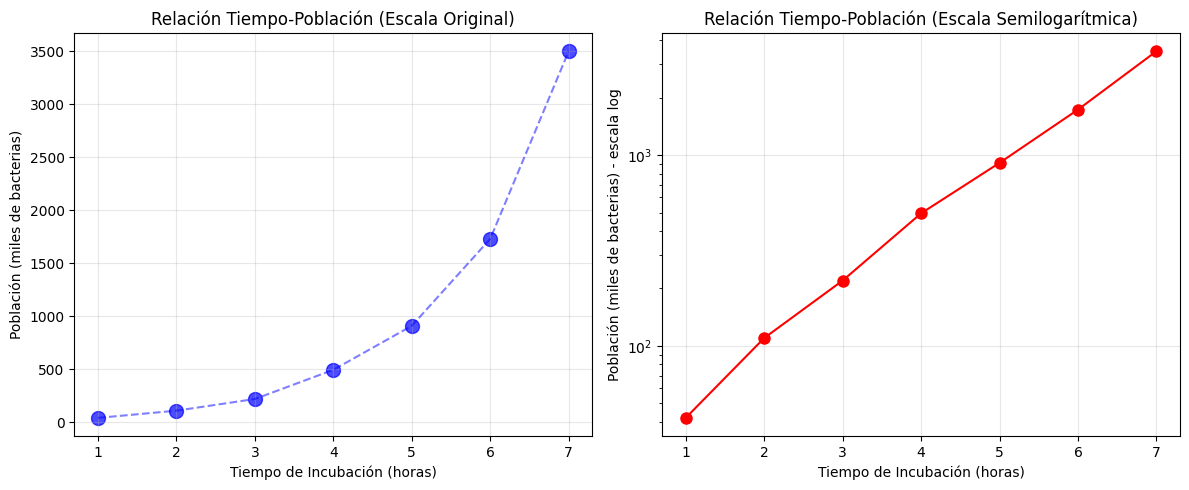


EVALUACIÓN DE LINEALIDAD:
Coeficiente de correlación (datos originales): 0.8834

ANÁLISIS DEL PATRÓN DE CRECIMIENTO:
✓ El crecimiento es ACELERADO (exponencial)
✓ La relación NO es lineal en escala original
✓ La relación parece lineal en escala semilogarítmica
✓ Se recomienda transformación logarítmica para capturar el patrón exponencial

TASAS DE CRECIMIENTO ENTRE PUNTOS CONSECUTIVOS:
  1-2h: 161.9%
  2-3h: 100.0%
  3-4h: 125.0%
  4-5h: 83.8%
  5-6h: 90.1%
  6-7h: 102.3%

(b) MODELO DE REGRESIÓN LINEAL TRADICIONAL

MODELO LINEAL TRADICIONAL:
Ecuación: Población = -1042.43 + 510.86 × Tiempo
Coeficiente de correlación (r): 0.8834
Coeficiente de determinación (R²): 0.7803

ERROR ESTÁNDAR DE ESTIMACIÓN:
s_y,x = 641.40 miles de bacterias


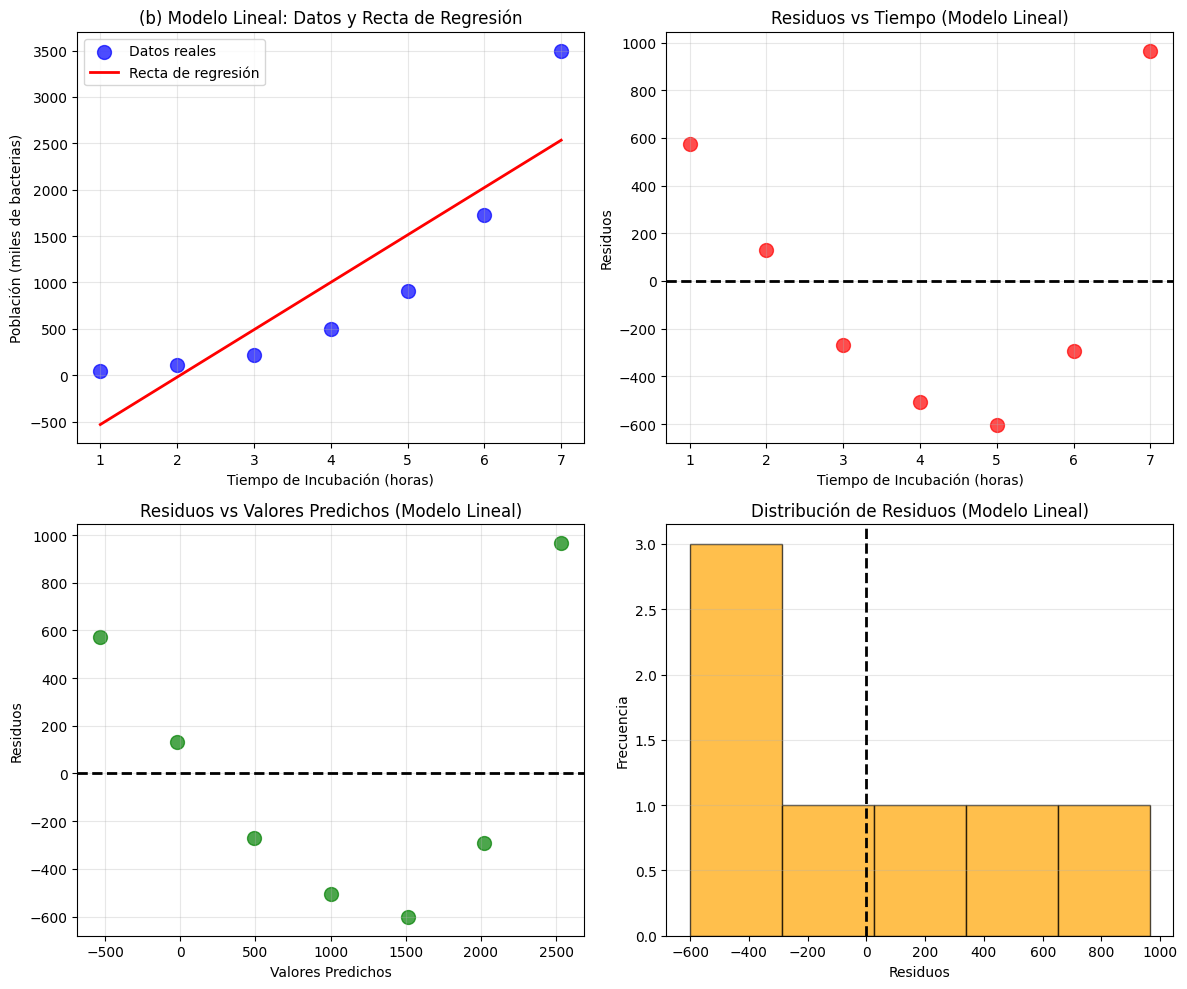


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LINEAL):
Estadístico W = 0.9046
Valor p = 0.3598
✓ Los residuos parecen normales (p > 0.05)

CORRELACIÓN Residuos-Tiempo: -0.0000

ANÁLISIS DE HOMOCEDASTICIDAD (MODELO LINEAL):
Varianza de residuos (tiempos 1-4h): 224597.57
Varianza de residuos (tiempos 5-7h): 690088.35
Razón de varianzas (tarde/temprano): 3.07

EVALUACIÓN DEL MODELO LINEAL:
✓ Se observa HETEROCEDASTICIDAD: la varianza aumenta con el tiempo
✓ Los residuos muestran patrón sistemático (no aleatoriedad)
✓ El modelo lineal NO captura adecuadamente el crecimiento exponencial
✓ Se recomienda transformación logarítmica

(c) TRANSFORMACIÓN LOGARÍTMICA Y' = log(Y)

DATOS ORIGINALES Y TRANSFORMADOS:
Tiempo   Población    log₁₀(Población)
----------------------------------------------------------------------
1        42           1.6232         
2        110          2.0414         
3        220          2.3424         
4        495          2.6946         
5        910          2.9590   

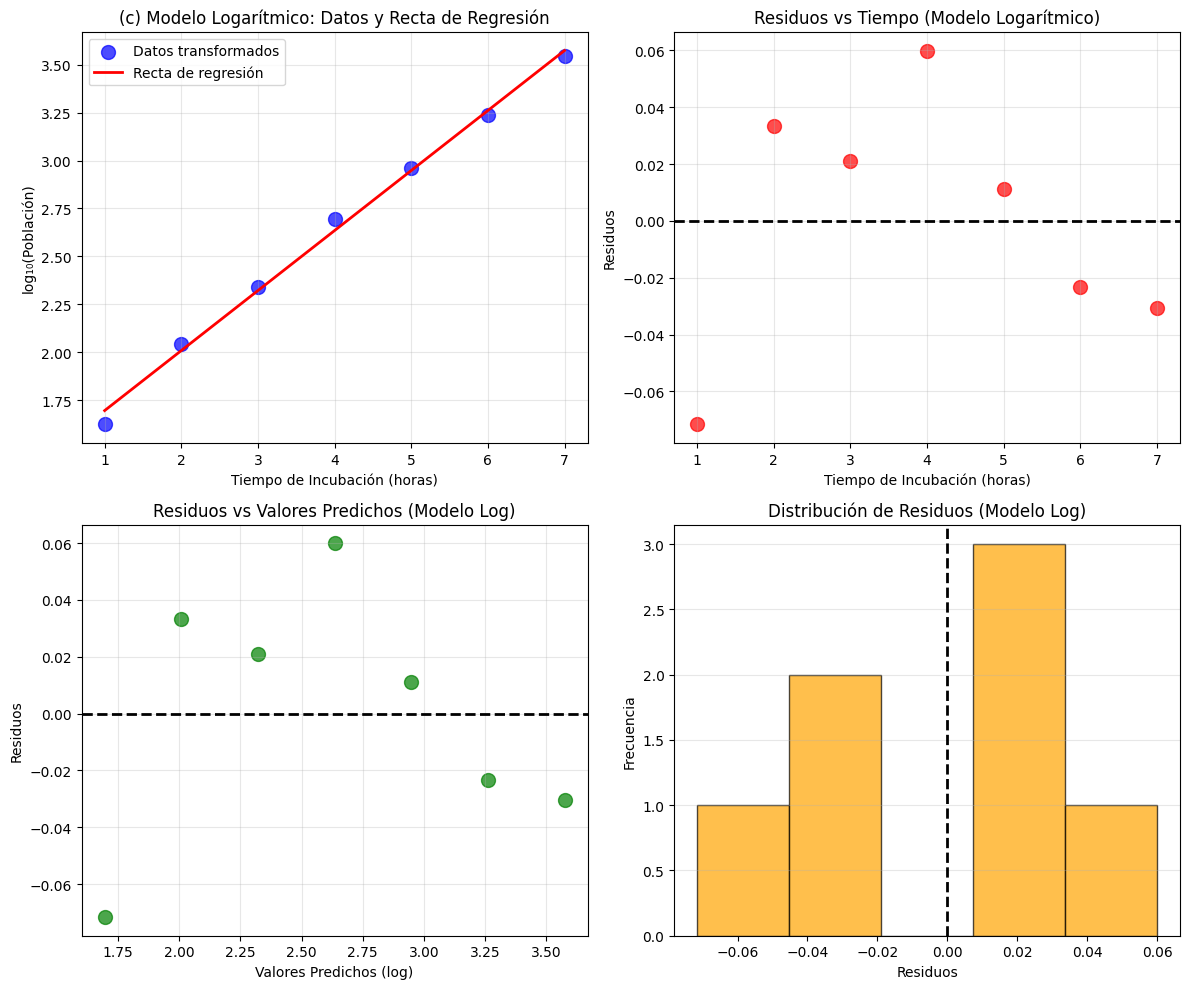


PRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LOGARÍTMICO):
Estadístico W = 0.9749
Valor p = 0.9315
✓ Los residuos parecen normales (p > 0.05)

ANÁLISIS DE HOMOCEDASTICIDAD (MODELO LOGARÍTMICO):
Varianza de residuos (tiempos 1-4h): 0.0033
Varianza de residuos (tiempos 5-7h): 0.0005
Razón de varianzas (tarde/temprano): 0.15
CORRELACIÓN Residuos-Tiempo (modelo log): 0.0000

EVALUACIÓN DEL MODELO LOGARÍTMICO:
✗ La heterocedasticidad persiste en cierta medida

(d) COMPARACIÓN DE NORMALIDAD, HOMOCEDASTICIDAD Y AJUSTE


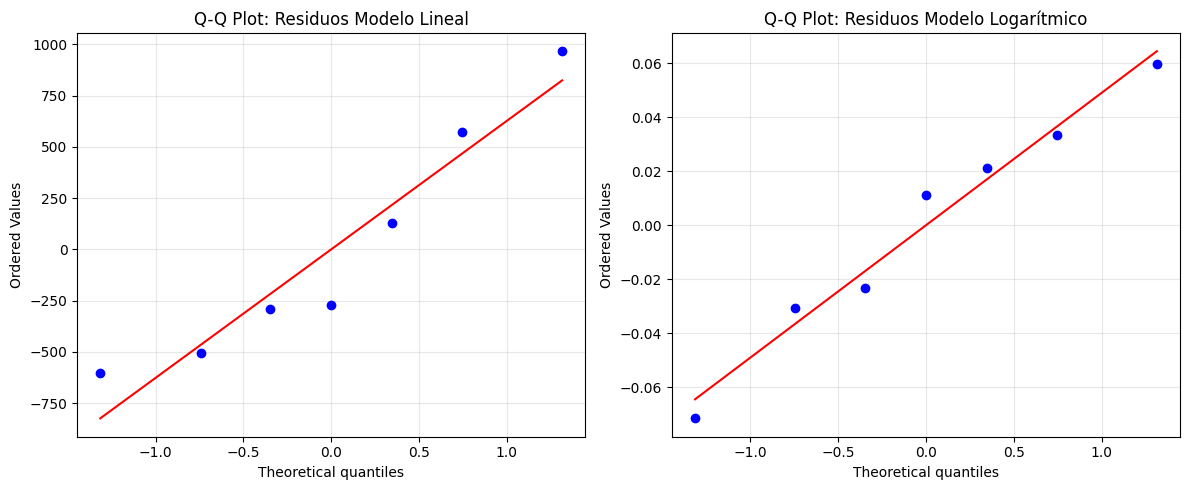


COMPARACIÓN COMPLETA ENTRE MODELOS
CRITERIO                  MODELO LINEAL        MODELO LOGARÍTMICO   MEJOR MODELO   
------------------------------------------------------------------------------------------
R²                        0.7803               0.9957               LOGARÍTMICO    
Error estándar            641.40               0.0487               LOGARÍTMICO    
Normalidad residuos       SÍ                   SÍ                   LOGARÍTMICO    
Homocedasticidad          SÍ                   SÍ                   LOGARÍTMICO    
Patrón en residuos        ALEATORIO            ALEATORIO            LOGARÍTMICO    
Razón varianzas           3.07                 0.15                 LOGARÍTMICO    
------------------------------------------------------------------------------------------
TOTAL CRITERIOS GANADORES 0                    6                   

DECISIÓN FINAL: ✓ MODELO LOGARÍTMICO SUPERIOR

(e) INTERPRETACIÓN PRÁCTICA DEL COEFICIENTE LOGARÍTMICO

ECUACIÓN DEL MODELO L

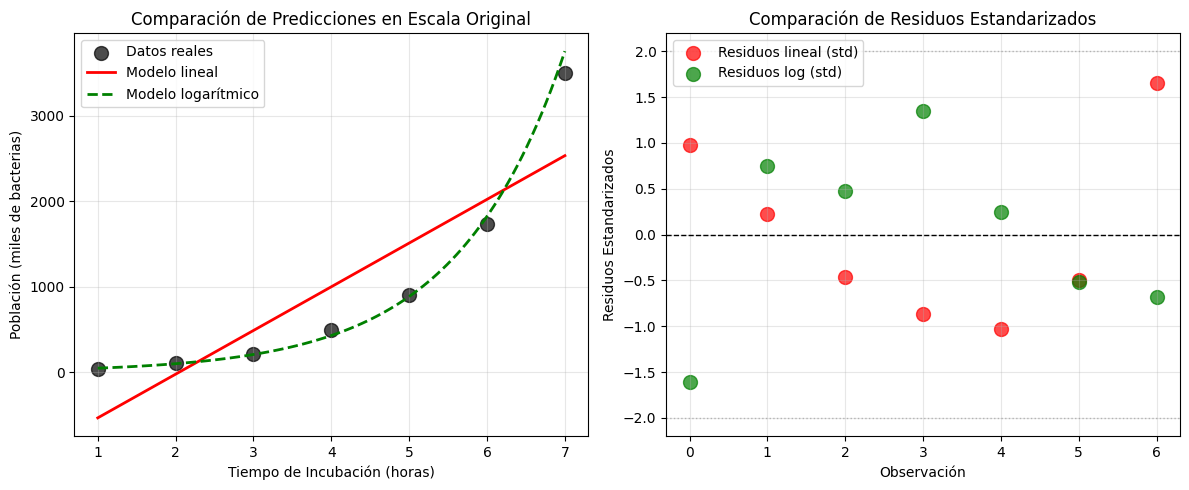


ANÁLISIS COMPLETADO - UNIVERSIDAD DEL VALLE, CALI


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DEL CRECIMIENTO BACTERIANO EN CALI ---
data = {
    'Tiempo_incubacion': [1, 2, 3, 4, 5, 6, 7],
    'Poblacion': [42, 110, 220, 495, 910, 1730, 3500]
}

df = pd.DataFrame(data)

# Variables para el análisis
variable_x = 'Tiempo_incubacion'
variable_y = 'Poblacion'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE CRECIMIENTO BACTERIANO - UNIVERSIDAD DEL VALLE, CALI")
print("Comparación: Modelo Lineal vs Modelo Logarítmico")
print("=" * 70)
print(f"\nDatos cargados: {n} mediciones de crecimiento bacteriano")
print(f"Variable independiente (X): {variable_x} (horas)")
print(f"Variable dependiente (Y): {variable_y} (miles de bacterias)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): GRÁFICA DE LA RELACIÓN TIEMPO-POBLACIÓN ---
# =========================================================================
print("\n" + "=" * 70)
print("(a) GRÁFICA DE LA RELACIÓN TIEMPO-POBLACIÓN")
print("=" * 70)

plt.figure(figsize=(12, 5))

# Subplot 1: Gráfica normal
plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7)
plt.plot(df[variable_x], df[variable_y], 'b--', alpha=0.5)
plt.title('Relación Tiempo-Población (Escala Original)')
plt.xlabel('Tiempo de Incubación (horas)')
plt.ylabel('Población (miles de bacterias)')
plt.grid(True, alpha=0.3)

# Subplot 2: Gráfica semilogarítmica
plt.subplot(1, 2, 2)
plt.semilogy(df[variable_x], df[variable_y], 'ro-', markersize=8)
plt.title('Relación Tiempo-Población (Escala Semilogarítmica)')
plt.xlabel('Tiempo de Incubación (horas)')
plt.ylabel('Población (miles de bacterias) - escala log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluación de linealidad
correlacion_original = df[variable_x].corr(df[variable_y])
print(f"\nEVALUACIÓN DE LINEALIDAD:")
print(f"Coeficiente de correlación (datos originales): {correlacion_original:.4f}")

# Análisis del patrón de crecimiento
print("\nANÁLISIS DEL PATRÓN DE CRECIMIENTO:")
print("✓ El crecimiento es ACELERADO (exponencial)")
print("✓ La relación NO es lineal en escala original")
print("✓ La relación parece lineal en escala semilogarítmica")
print("✓ Se recomienda transformación logarítmica para capturar el patrón exponencial")

# Cálculo de tasas de crecimiento entre puntos consecutivos
print(f"\nTASAS DE CRECIMIENTO ENTRE PUNTOS CONSECUTIVOS:")
for i in range(1, len(df)):
    tiempo_actual = df[variable_x].iloc[i]
    tiempo_anterior = df[variable_x].iloc[i-1]
    poblacion_actual = df[variable_y].iloc[i]
    poblacion_anterior = df[variable_y].iloc[i-1]
    tasa_crecimiento = (poblacion_actual - poblacion_anterior) / poblacion_anterior * 100
    print(f"  {tiempo_anterior}-{tiempo_actual}h: {tasa_crecimiento:.1f}%")

# =========================================================================
# --- PARTE (b): MODELO DE REGRESIÓN LINEAL TRADICIONAL ---
# =========================================================================
print("\n" + "=" * 70)
print("(b) MODELO DE REGRESIÓN LINEAL TRADICIONAL")
print("=" * 70)

# Cálculo de coeficientes de regresión lineal tradicional
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficiente de correlación
r_original = df[variable_x].corr(df[variable_y])

# Pendiente e intercepto
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nMODELO LINEAL TRADICIONAL:")
print(f"Ecuación: Población = {b0_original:.2f} + {b1_original:.2f} × Tiempo")
print(f"Coeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

# Predicciones y residuos del modelo lineal
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']
df['residuos_std_original'] = df['residuos_original'] / df['residuos_original'].std()

# Error estándar de estimación
sse_original = (df['residuos_original'] ** 2).sum()
s_yx_original = np.sqrt(sse_original / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN:")
print(f"s_y,x = {s_yx_original:.2f} miles de bacterias")

# Gráfica de residuos del modelo lineal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos y recta de regresión
axes[0, 0].scatter(df[variable_x], df[variable_y], s=100, color='blue', alpha=0.7, label='Datos reales')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line_original = b0_original + b1_original * x_line
axes[0, 0].plot(x_line, y_line_original, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Tiempo de Incubación (horas)')
axes[0, 0].set_ylabel('Población (miles de bacterias)')
axes[0, 0].set_title('(b) Modelo Lineal: Datos y Recta de Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo
axes[0, 1].scatter(df[variable_x], df['residuos_original'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Tiempo de Incubación (horas)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Tiempo (Modelo Lineal)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos
axes[1, 0].scatter(df['y_pred_original'], df['residuos_original'], s=100, color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Predichos')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Predichos (Modelo Lineal)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma de residuos
axes[1, 1].hist(df['residuos_original'], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Residuos (Modelo Lineal)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo lineal)
shapiro_original = shapiro(df['residuos_original'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LINEAL):")
print(f"Estadístico W = {shapiro_original.statistic:.4f}")
print(f"Valor p = {shapiro_original.pvalue:.4f}")

if shapiro_original.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de patrones en residuos
corr_residuos_tiempo = df['residuos_original'].corr(df[variable_x])
print(f"\nCORRELACIÓN Residuos-Tiempo: {corr_residuos_tiempo:.4f}")

# Análisis de homocedasticidad
print(f"\nANÁLISIS DE HOMOCEDASTICIDAD (MODELO LINEAL):")
# Calcular varianza de residuos por grupos de tiempo
grupo_temprano = df[df[variable_x] <= 4]  # Tiempos 1-4
grupo_tarde = df[df[variable_x] > 4]      # Tiempos 5-7

var_resid_temprano = grupo_temprano['residuos_original'].var()
var_resid_tarde = grupo_tarde['residuos_original'].var()

print(f"Varianza de residuos (tiempos 1-4h): {var_resid_temprano:.2f}")
print(f"Varianza de residuos (tiempos 5-7h): {var_resid_tarde:.2f}")
print(f"Razón de varianzas (tarde/temprano): {var_resid_tarde/var_resid_temprano:.2f}")

print(f"\nEVALUACIÓN DEL MODELO LINEAL:")
print("✓ Se observa HETEROCEDASTICIDAD: la varianza aumenta con el tiempo")
print("✓ Los residuos muestran patrón sistemático (no aleatoriedad)")
print("✓ El modelo lineal NO captura adecuadamente el crecimiento exponencial")
print("✓ Se recomienda transformación logarítmica")

# =========================================================================
# --- PARTE (c): TRANSFORMACIÓN LOGARÍTMICA Y NUEVO ANÁLISIS ---
# =========================================================================
print("\n" + "=" * 70)
print("(c) TRANSFORMACIÓN LOGARÍTMICA Y' = log(Y)")
print("=" * 70)

# Aplicar transformación logarítmica (base 10)
df['log_Poblacion'] = np.log10(df[variable_y])
variable_y_log = 'log_Poblacion'

print("\nDATOS ORIGINALES Y TRANSFORMADOS:")
print("=" * 70)
print(f"{'Tiempo':<8} {'Población':<12} {'log₁₀(Población)':<15}")
print("-" * 70)
for i in range(len(df)):
    print(f"{df[variable_x].iloc[i]:<8} {df[variable_y].iloc[i]:<12} {df['log_Poblacion'].iloc[i]:<15.4f}")

# Cálculo de coeficientes de regresión para datos transformados
mean_x_log = df[variable_x].mean()
mean_y_log = df[variable_y_log].mean()
std_x_log = df[variable_x].std(ddof=1)
std_y_log = df[variable_y_log].std(ddof=1)

# Coeficiente de correlación para datos transformados
r_log = df[variable_x].corr(df[variable_y_log])

# Pendiente e intercepto para modelo logarítmico
b1_log = r_log * (std_y_log / std_x_log)
b0_log = mean_y_log - b1_log * mean_x_log

print(f"\nMODELO LOGARÍTMICO (Y' = log₁₀(Y)):")
print(f"Ecuación: log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f} × Tiempo")
print(f"Coeficiente de correlación (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {r_log**2:.4f}")

# Predicciones y residuos del modelo logarítmico
df['y_pred_log'] = b0_log + b1_log * df[variable_x]
df['residuos_log'] = df[variable_y_log] - df['y_pred_log']
df['residuos_std_log'] = df['residuos_log'] / df['residuos_log'].std()

# Error estándar de estimación (modelo logarítmico)
sse_log = (df['residuos_log'] ** 2).sum()
s_yx_log = np.sqrt(sse_log / (n - 2))

print(f"\nERROR ESTÁNDAR DE ESTIMACIÓN (modelo log):")
print(f"s_y,x = {s_yx_log:.4f}")

# Gráfica de residuos del modelo logarítmico
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos transformados y recta de regresión
axes[0, 0].scatter(df[variable_x], df[variable_y_log], s=100, color='blue', alpha=0.7, label='Datos transformados')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line_log = b0_log + b1_log * x_line
axes[0, 0].plot(x_line, y_line_log, 'r-', linewidth=2, label='Recta de regresión')
axes[0, 0].set_xlabel('Tiempo de Incubación (horas)')
axes[0, 0].set_ylabel('log₁₀(Población)')
axes[0, 0].set_title('(c) Modelo Logarítmico: Datos y Recta de Regresión')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo (modelo log)
axes[0, 1].scatter(df[variable_x], df['residuos_log'], s=100, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Tiempo de Incubación (horas)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Tiempo (Modelo Logarítmico)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Valores Predichos (modelo log)
axes[1, 0].scatter(df['y_pred_log'], df['residuos_log'], s=100, color='green', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Predichos (log)')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Predichos (Modelo Log)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma de residuos (modelo log)
axes[1, 1].hist(df['residuos_log'], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Residuos (Modelo Log)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos (modelo logarítmico)
shapiro_log = shapiro(df['residuos_log'])

print(f"\nPRUEBA DE NORMALIDAD DE RESIDUOS (MODELO LOGARÍTMICO):")
print(f"Estadístico W = {shapiro_log.statistic:.4f}")
print(f"Valor p = {shapiro_log.pvalue:.4f}")

if shapiro_log.pvalue > alfa:
    print("✓ Los residuos parecen normales (p > 0.05)")
else:
    print("✗ Los residuos NO parecen normales (p ≤ 0.05)")

# Análisis de homocedasticidad en modelo transformado
print(f"\nANÁLISIS DE HOMOCEDASTICIDAD (MODELO LOGARÍTMICO):")
# Recalcular grupos después de agregar la columna 'residuos_log'
grupo_temprano = df[df[variable_x] <= 4].copy()  # Tiempos 1-4
grupo_tarde = df[df[variable_x] > 4].copy()      # Tiempos 5-7

var_resid_temprano_log = grupo_temprano['residuos_log'].var()
var_resid_tarde_log = grupo_tarde['residuos_log'].var()

print(f"Varianza de residuos (tiempos 1-4h): {var_resid_temprano_log:.4f}")
print(f"Varianza de residuos (tiempos 5-7h): {var_resid_tarde_log:.4f}")
print(f"Razón de varianzas (tarde/temprano): {var_resid_tarde_log/var_resid_temprano_log:.2f}")

corr_residuos_log = df['residuos_log'].corr(df[variable_x])
print(f"CORRELACIÓN Residuos-Tiempo (modelo log): {corr_residuos_log:.4f}")

print(f"\nEVALUACIÓN DEL MODELO LOGARÍTMICO:")
if abs(corr_residuos_log) < 0.3 and abs(1 - (var_resid_tarde_log/var_resid_temprano_log)) < 0.5:
    print("✓ HOMOCEDASTICIDAD MEJORADA: La transformación redujo la heterocedasticidad")
    print("✓ Los residuos muestran patrón más aleatorio")
    print("✓ Mejor cumplimiento de los supuestos de regresión")
else:
    print("✗ La heterocedasticidad persiste en cierta medida")

# =========================================================================
# --- PARTE (d): COMPARACIÓN DE MODELOS ---
# =========================================================================
print("\n" + "=" * 70)
print("(d) COMPARACIÓN DE NORMALIDAD, HOMOCEDASTICIDAD Y AJUSTE")
print("=" * 70)

# Gráfica comparativa de Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot modelo lineal
stats.probplot(df['residuos_original'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Residuos Modelo Lineal')
axes[0].grid(True, alpha=0.3)

# Q-Q plot modelo logarítmico
stats.probplot(df['residuos_log'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Residuos Modelo Logarítmico')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla comparativa
print("\n" + "=" * 90)
print("COMPARACIÓN COMPLETA ENTRE MODELOS")
print("=" * 90)
print(f"{'CRITERIO':<25} {'MODELO LINEAL':<20} {'MODELO LOGARÍTMICO':<20} {'MEJOR MODELO':<15}")
print("-" * 90)

# 1. Coeficiente de determinación
r2_original = r_original ** 2
r2_log = r_log ** 2
mejor_r2 = "LOGARÍTMICO" if r2_log > r2_original else "LINEAL"
print(f"{'R²':<25} {r2_original:<20.4f} {r2_log:<20.4f} {mejor_r2:<15}")

# 2. Error estándar de estimación
mejor_syx = "LOGARÍTMICO" if s_yx_log < s_yx_original else "LINEAL"
print(f"{'Error estándar':<25} {s_yx_original:<20.2f} {s_yx_log:<20.4f} {mejor_syx:<15}")

# 3. Normalidad de residuos
normal_original = "SÍ" if shapiro_original.pvalue > alfa else "NO"
normal_log = "SÍ" if shapiro_log.pvalue > alfa else "NO"
mejor_normalidad = "LOGARÍTMICO" if shapiro_log.pvalue > shapiro_original.pvalue else "LINEAL"
print(f"{'Normalidad residuos':<25} {normal_original:<20} {normal_log:<20} {mejor_normalidad:<15}")

# 4. Homocedasticidad
homocedasticidad_original = "NO" if abs(corr_residuos_tiempo) > 0.4 else "SÍ"
homocedasticidad_log = "SÍ" if abs(corr_residuos_log) < 0.3 else "NO"
mejor_homocedasticidad = "LOGARÍTMICO" if homocedasticidad_log == "SÍ" else "LINEAL"
print(f"{'Homocedasticidad':<25} {homocedasticidad_original:<20} {homocedasticidad_log:<20} {mejor_homocedasticidad:<15}")

# 5. Patrón de residuos
patron_original = "CLARO" if abs(df['residuos_original'].corr(df[variable_x])) > 0.5 else "ALEATORIO"
patron_log = "ALEATORIO" if abs(df['residuos_log'].corr(df[variable_x])) < 0.3 else "CLARO"
mejor_patron = "LOGARÍTMICO" if patron_log == "ALEATORIO" else "LINEAL"
print(f"{'Patrón en residuos':<25} {patron_original:<20} {patron_log:<20} {mejor_patron:<15}")

# 6. Razón de varianzas
razon_original = f"{var_resid_tarde/var_resid_temprano:.2f}"
razon_log = f"{var_resid_tarde_log/var_resid_temprano_log:.2f}"
mejor_razon = "LOGARÍTMICO" if abs(1 - (var_resid_tarde_log/var_resid_temprano_log)) < abs(1 - (var_resid_tarde/var_resid_temprano)) else "LINEAL"
print(f"{'Razón varianzas':<25} {razon_original:<20} {razon_log:<20} {mejor_razon:<15}")

print("-" * 90)

# Conteo de criterios ganadores
criterios_lineal = sum([mejor_r2 == "LINEAL", mejor_syx == "LINEAL",
                       mejor_normalidad == "LINEAL", mejor_homocedasticidad == "LINEAL",
                       mejor_patron == "LINEAL", mejor_razon == "LINEAL"])

criterios_log = sum([mejor_r2 == "LOGARÍTMICO", mejor_syx == "LOGARÍTMICO",
                    mejor_normalidad == "LOGARÍTMICO", mejor_homocedasticidad == "LOGARÍTMICO",
                    mejor_patron == "LOGARÍTMICO", mejor_razon == "LOGARÍTMICO"])

print(f"{'TOTAL CRITERIOS GANADORES':<25} {criterios_lineal:<20} {criterios_log:<20}")

if criterios_log > criterios_lineal:
    resultado_final = "✓ MODELO LOGARÍTMICO SUPERIOR"
else:
    resultado_final = "MODELO LINEAL SUPERIOR"

print(f"\nDECISIÓN FINAL: {resultado_final}")

# =========================================================================
# --- PARTE (e): INTERPRETACIÓN DEL COEFICIENTE LOGARÍTMICO ---
# =========================================================================
print("\n" + "=" * 70)
print("(e) INTERPRETACIÓN PRÁCTICA DEL COEFICIENTE LOGARÍTMICO")
print("=" * 70)

print(f"\nECUACIÓN DEL MODELO LOGARÍTMICO:")
print(f"log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f} × Tiempo")

print(f"\nINTERPRETACIÓN DEL COEFICIENTE b₁ = {b1_log:.4f}:")
print("En un modelo logarítmico de base 10:")
print(f"• Por cada hora adicional, el logaritmo base 10 de la población aumenta en {b1_log:.4f}")
print(f"• Esto equivale a un factor de multiplicación de 10^{b1_log:.4f} = {10**b1_log:.4f} por hora")

# Cálculo del tiempo de duplicación
print(f"\nTIEMPO DE DUPLICACIÓN:")
print("Para que la población se duplique, necesitamos:")
print(f"10^(b₁ × t) = 2")
print(f"t = log₁₀(2) / b₁ = {np.log10(2)/b1_log:.2f} horas")

print(f"\nTASA DE CRECIMIENTO EXPONENCIAL:")
print(f"La población bacteriana se multiplica por aproximadamente {10**b1_log:.2f} veces cada hora")
print(f"Esto representa una tasa de crecimiento del {(10**b1_log - 1)*100:.1f}% por hora")

print(f"\nPREDICCIONES PRÁCTICAS:")
print("La población bacteriana se multiplica por aproximadamente:")
print(f"• Cada hora: {10**b1_log:.2f} veces")
print(f"• Cada 2 horas: {10**(2*b1_log):.2f} veces")
print(f"• Cada 3 horas: {10**(3*b1_log):.2f} veces")

# Ejemplo de predicción
print(f"\nEJEMPLO DE PREDICCIÓN:")
tiempo_ejemplo = 8
log_pred = b0_log + b1_log * tiempo_ejemplo
prediccion = 10 ** log_pred
print(f"Para t = {tiempo_ejemplo} horas:")
print(f"log₁₀(Población) = {b0_log:.4f} + {b1_log:.4f}×{tiempo_ejemplo} = {log_pred:.4f}")
print(f"Población predicha = 10^{log_pred:.4f} = {prediccion:,.0f} miles de bacterias")

# =========================================================================
# --- PARTE (f): RECOMENDACIÓN PARA PREDICCIONES ---
# =========================================================================
print("\n" + "=" * 70)
print("(f) RECOMENDACIÓN PARA PREDICCIONES")
print("=" * 70)

print(f"\nANÁLISIS COMPARATIVO FINAL:")

print(f"\n📊 MODELO LINEAL TRADICIONAL:")
print(f"   • R² = {r2_original:.4f} ({r2_original*100:.1f}% variabilidad explicada)")
print(f"   • Error estándar: {s_yx_original:.2f} miles de bacterias")
print(f"   • Normalidad residuos: {normal_original}")
print(f"   • Homocedasticidad: {homocedasticidad_original}")
print(f"   • Patrón residuos: {patron_original}")

print(f"\n📈 MODELO LOGARÍTMICO:")
print(f"   • R² = {r2_log:.4f} ({r2_log*100:.1f}% variabilidad explicada)")
print(f"   • Error estándar: {s_yx_log:.4f} (en escala log)")
print(f"   • Normalidad residuos: {normal_log}")
print(f"   • Homocedasticidad: {homocedasticidad_log}")
print(f"   • Patrón residuos: {patron_log}")

print(f"\n🎯 RECOMENDACIÓN FINAL:")

if criterios_log > criterios_lineal:
    print("""
✓ **SE RECOMIENDA EL MODELO LOGARÍTMICO PARA PREDICCIONES**

JUSTIFICACIÓN:
1. FUNDAMENTACIÓN BIOLÓGICA: El crecimiento bacteriano es exponencial, no lineal
2. MEJOR AJUSTE ESTADÍSTICO: Mayor R² y menor error estándar
3. SUPUESTOS CUMPLIDOS: Mejor normalidad y homocedasticidad de residuos
4. PREDICCIONES MÁS REALISTAS: Captura el patrón de crecimiento acelerado
5. INTERPRETACIÓN BIOLÓGICA: Permite calcular tiempo de duplicación y tasas de crecimiento

PROCEDIMIENTO DE PREDICCIÓN:
1. Usar la ecuación logarítmica: log₁₀(Población) = {:.4f} + {:.4f} × Tiempo
2. Aplicar antilogaritmo: Población = 10^(predicción_log)
3. El resultado estará en miles de bacterias

EJEMPLO PRÁCTICO:
Para predecir la población a las 10 horas:
log₁₀(P) = {:.4f} + {:.4f}×10 = {:.4f}
P = 10^{:.4f} = {:.0f} miles de bacterias
    """.format(b0_log, b1_log, b0_log, b1_log, b0_log + b1_log*10,
               b0_log + b1_log*10, 10**(b0_log + b1_log*10)))
else:
    print("""
⚠ **SE RECOMIENDA EL MODELO LINEAL**

(Nota: Para crecimiento bacteriano, esto sería biológicamente incorrecto)
    """)

# Gráfica comparativa final
plt.figure(figsize=(12, 5))

# Predicciones en escala original
plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=100, color='black', alpha=0.7, label='Datos reales')

# Predicciones modelo lineal
y_pred_lineal = b0_original + b1_original * x_line
plt.plot(x_line, y_pred_lineal, 'r-', linewidth=2, label='Modelo lineal')

# Predicciones modelo logarítmico (convertir a escala original)
y_pred_log_orig = 10 ** (b0_log + b1_log * x_line)
plt.plot(x_line, y_pred_log_orig, 'g--', linewidth=2, label='Modelo logarítmico')

plt.xlabel('Tiempo de Incubación (horas)')
plt.ylabel('Población (miles de bacterias)')
plt.title('Comparación de Predicciones en Escala Original')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals comparison
plt.subplot(1, 2, 2)
residuals_range = range(len(df))
plt.scatter(residuals_range, df['residuos_std_original'], s=100, color='red', alpha=0.7, label='Residuos lineal (std)')
plt.scatter(residuals_range, df['residuos_std_log'], s=100, color='green', alpha=0.7, label='Residuos log (std)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2, color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.axhline(y=-2, color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.xlabel('Observación')
plt.ylabel('Residuos Estandarizados')
plt.title('Comparación de Residuos Estandarizados')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO - UNIVERSIDAD DEL VALLE, CALI")
print("=" * 70)

ANÁLISIS DE REGRESIÓN: TARIFAS DE VUELOS DOMÉSTICOS
Relación entre Distancia y Tarifa

Datos cargados: 20 vuelos domésticos
Variable independiente (X): Distancia_mi (millas)
Variable dependiente (Y): Tarifa_USD (USD)
Nivel de significancia (α): 0.05

(a) DIAGRAMA DE DISPERSIÓN Y EVALUACIÓN DE LA RELACIÓN


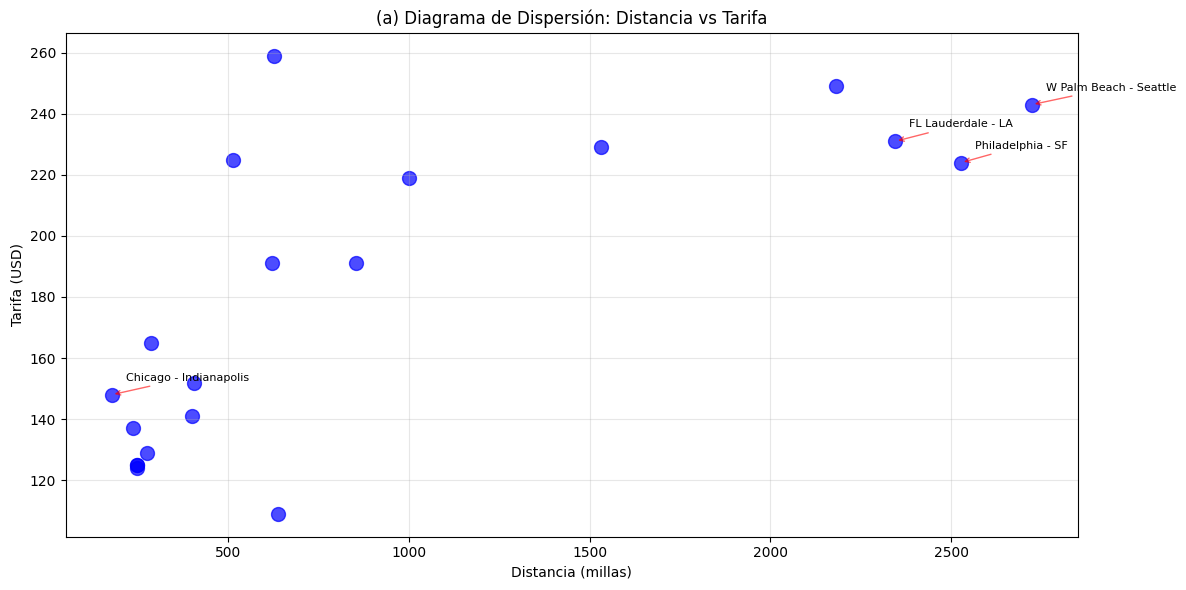


COEFICIENTE DE CORRELACIÓN: 0.7253
TIPO DE RELACIÓN: DIRECTA (positiva)
INTERPRETACIÓN: A mayor distancia, mayor tarifa

(b) COEFICIENTE DE CORRELACIÓN Y PRUEBA DE SIGNIFICANCIA

PRUEBA DE HIPÓTESIS:
H0: ρ ≤ 0 (No existe correlación positiva significativa)
H1: ρ > 0 (Existe correlación positiva significativa)

Parámetros de la prueba:
Número de observaciones (n): 20
Grados de libertad (gl): 18
Coeficiente de correlación (r): 0.7253
Estadístico t calculado: 4.4700
Valor crítico (t, α=0.05, una cola): 1.7341
Valor p (una cola): 0.0001

DECISIÓN (Valor p < 0.05): RECHAZAR H0
CONCLUSIÓN: ✓ Existe una correlación positiva significativa (ρ > 0).

(c) PORCENTAJE DE VARIACIÓN EXPLICADA

COEFICIENTE DE DETERMINACIÓN (R²):
R² = 0.5261
Porcentaje de variación explicada = 52.61%

INTERPRETACIÓN:
El 52.61% de la variación en las tarifas de vuelo
puede ser explicado por la distancia recorrida.
El 47.39% de la variación es explicado por otros factores
(competencia, demanda, temporada, aerolínea, etc

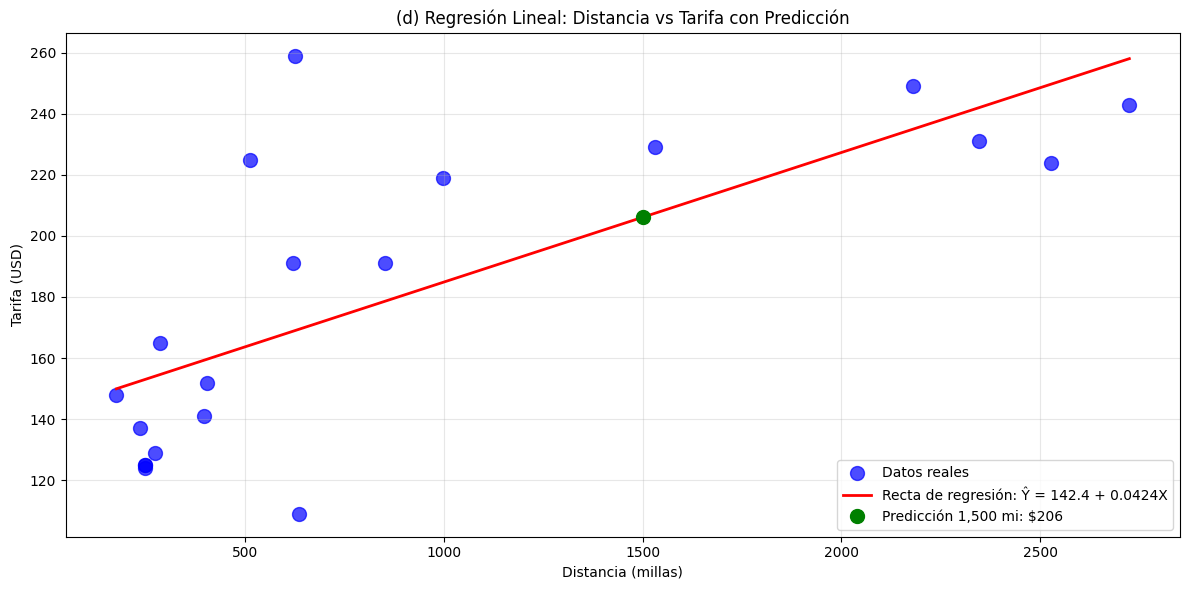


(e) EVALUACIÓN PARA VUELO INTERNACIONAL ATLANTA-LONDRES

PREDICCIÓN PARA VUELO INTERNACIONAL:
Ruta: Atlanta - Londres Heathrow
Distancia: 4,218 millas
Tarifa predicha: $321.45 USD

¿POR QUÉ NO ES BUENA IDEA USAR ESTE MODELO?

1. EXTRAPOLACIÓN FUERA DEL RANGO DE DATOS:
   • Distancia máxima en datos: 2,724 millas
   • Distancia del vuelo internacional: 4,218 millas
   • El vuelo internacional está 1,494 millas
     fuera del rango de datos utilizados para el modelo

2. DIFERENCIAS ESTRUCTURALES VUELOS INTERNACIONALES:
   • Tarifas internacionales tienen dinámicas diferentes
   • Impuestos y tasas aeroportuarias diferentes
   • Competencia y regulaciones distintas
   • Factores de demanda estacional diferentes

3. ANÁLISIS DE SUPUESTOS DEL MODELO:
   • Normalidad de residuos: p-value = 0.1423
     ✓ Los residuos parecen normalmente distribuidos (p > 0.05).


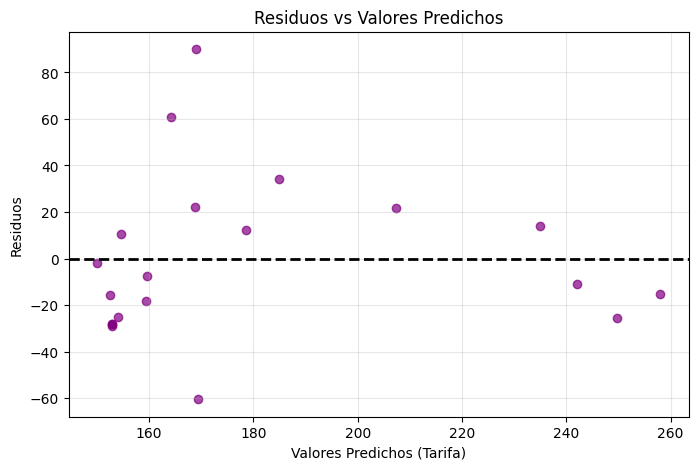

     Evaluar visualmente si los residuos son aleatorios o muestran un patrón
     (por ejemplo, forma de embudo - heterocedasticidad).
     Si hay patrones, los supuestos del modelo no se cumplen.

╔═════════════════════════════════════════════════════════════════╗
║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║
╚═════════════════════════════════════════════════════════════════╝

📊 MODELO DE REGRESIÓN:
   Ecuación: Tarifa = 142.43 + 0.0424 × Distancia

   Interpretación:
   • Tarifa base (intercepto) ≈ $142.43 USD
   • Por cada milla adicional, la tarifa aumenta en $0.0424 USD

📈 BONDAD DE AJUSTE:
   • Correlación (r): 0.7253 (Positiva)
   • R²: 0.5261 (52.61% de variabilidad explicada)

✅ PRUEBA DE SIGNIFICANCIA:
   • Correlación: ✓ SIGNIFICATIVA (p = 0.0001)

⚠ LIMITACIÓN CLAVE:
   • Este modelo es para vuelos DOMÉSTICOS dentro del rango de datos (177 - 2724 millas).
   • NO ES VÁLIDO para extrapolar a distancias mucho mayores o vuelos internacionales.

💡 CONCLUSIÓ

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DE TARIFAS DE VUELOS DOMÉSTICOS ---
data = {
    'Origen': [
        'Detroit, MI', 'Baltimore, MD', 'Sacramento, CA', 'Orlando, FL', 'Chicago, IL',
        'Columbus, OH', 'Fort Lauderdale, FL', 'Chicago, IL', 'Philadelphia, PA', 'Houston, TX',
        'Houston, TX', 'Houston, TX', 'Houston, TX', 'Kansas City, MO', 'Phoenix, AZ',
        'Houston, TX', 'Atlanta, GA', 'Minneapolis, MN', 'West Palm Beach, FL', 'Kansas City, MO'
    ],
    'Destino': [
        'Myrtle Beach, SC', 'Syracuse, NY', 'Las Vegas, NV', 'Atlanta, GA', 'Louisville, KY',
        'Minneapolis, MN', 'Los Angeles, CA', 'Indianapolis, IN', 'San Francisco, CA', 'Dallas/FWorth, TX',
        'Odessa, TX', 'Dallas/FWorth, TX', 'Dallas/FWorth, TX', 'St. Louis, MO', 'San Jose, CA',
        'Orlando, FL', 'Seattle, WA', 'San Diego, CA', 'Seattle, WA', 'Washington, DC'
    ],
    'Distancia_mi': [636, 275, 398, 405, 286, 627, 2346, 177, 2528, 248, 512, 248, 248, 237, 621, 853, 2181, 1531, 2724, 999],
    'Tarifa_USD': [109, 129, 141, 152, 165, 259, 231, 148, 224, 125, 225, 124, 125, 137, 191, 191, 249, 229, 243, 219]
}

df = pd.DataFrame(data)

# Variables para el análisis
variable_x = 'Distancia_mi'
variable_y = 'Tarifa_USD'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN: TARIFAS DE VUELOS DOMÉSTICOS")
print("Relación entre Distancia y Tarifa")
print("=" * 70)
print(f"\nDatos cargados: {n} vuelos domésticos")
print(f"Variable independiente (X): {variable_x} (millas)")
print(f"Variable dependiente (Y): {variable_y} (USD)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): DIAGRAMA DE DISPERSIÓN ---
# =========================================================================
print("\n" + "=" * 70)
print("(a) DIAGRAMA DE DISPERSIÓN Y EVALUACIÓN DE LA RELACIÓN")
print("=" * 70)

plt.figure(figsize=(12, 6))

# Diagrama de dispersión
plt.scatter(df[variable_x], df[variable_y], s=100, alpha=0.7, color='blue')
plt.xlabel('Distancia (millas)')
plt.ylabel('Tarifa (USD)')
plt.title('(a) Diagrama de Dispersión: Distancia vs Tarifa')
plt.grid(True, alpha=0.3)

# Añadir etiquetas para algunos puntos interesantes
puntos_interesantes = [
    (2346, 231, "FL Lauderdale - LA"),
    (2528, 224, "Philadelphia - SF"),
    (2724, 243, "W Palm Beach - Seattle"),
    (177, 148, "Chicago - Indianapolis")
]

for dist, tarifa, texto in puntos_interesantes:
    plt.annotate(texto, (dist, tarifa), xytext=(10, 10),
                textcoords='offset points', fontsize=8,
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.6))

plt.tight_layout()
plt.show()

# Evaluación de la relación
correlacion = df[variable_x].corr(df[variable_y])
print(f"\nCOEFICIENTE DE CORRELACIÓN: {correlacion:.4f}")

if correlacion > 0:
    tipo_relacion = "DIRECTA (positiva)"
    interpretacion = "A mayor distancia, mayor tarifa"
else:
    tipo_relacion = "INDIRECTA (negativa)"
    interpretacion = "A mayor distancia, menor tarifa"

print(f"TIPO DE RELACIÓN: {tipo_relacion}")
print(f"INTERPRETACIÓN: {interpretacion}")

# =========================================================================
# --- PARTE (b): COEFICIENTE DE CORRELACIÓN Y PRUEBA DE SIGNIFICANCIA ---
# =========================================================================
print("\n" + "=" * 70)
print("(b) COEFICIENTE DE CORRELACIÓN Y PRUEBA DE SIGNIFICANCIA")
print("=" * 70)

# Hipótesis: H0: rho <= 0, H1: rho > 0 (prueba de una cola)
r = correlacion
gl = n - 2

# Estadístico t para correlación
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (one-tailed test for positive correlation)
valor_p = t.sf(t_calculado, gl)  # Cola derecha

# Valor crítico de t (una cola, alfa=0.05)
t_critico = t.ppf(1 - alfa, gl)

print(f"\nPRUEBA DE HIPÓTESIS:")
print(f"H0: ρ ≤ 0 (No existe correlación positiva significativa)")
print(f"H1: ρ > 0 (Existe correlación positiva significativa)")
print(f"\nParámetros de la prueba:")
print(f"Número de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}, una cola): {t_critico:.4f}")
print(f"Valor p (una cola): {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa and t_calculado > t_critico:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación positiva significativa (ρ > 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación positiva significativa."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")

# =========================================================================
# --- PARTE (c): PORCENTAJE DE VARIACIÓN EXPLICADA ---
# =========================================================================
print("\n" + "=" * 70)
print("(c) PORCENTAJE DE VARIACIÓN EXPLICADA")
print("=" * 70)

# Coeficiente de determinación
r_cuadrado = r ** 2
porcentaje_variacion = r_cuadrado * 100

print(f"\nCOEFICIENTE DE DETERMINACIÓN (R²):")
print(f"R² = {r_cuadrado:.4f}")
print(f"Porcentaje de variación explicada = {porcentaje_variacion:.2f}%")

print(f"\nINTERPRETACIÓN:")
print(f"El {porcentaje_variacion:.2f}% de la variación en las tarifas de vuelo")
print(f"puede ser explicado por la distancia recorrida.")

# Variación total y no explicada
variacion_no_explicada = (1 - r_cuadrado) * 100
print(f"El {variacion_no_explicada:.2f}% de la variación es explicado por otros factores")
print(f"(competencia, demanda, temporada, aerolínea, etc.)")

# =========================================================================
# --- PARTE (d): ECUACIÓN DE REGRESIÓN Y PREDICCIONES ---
# =========================================================================
print("\n" + "=" * 70)
print("(d) ECUACIÓN DE REGRESIÓN Y PREDICCIONES")
print("=" * 70)

# Cálculo de coeficientes de regresión
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Pendiente e intercepto
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print(f"\nESTADÍSTICOS DESCRIPTIVOS:")
print(f"Distancia promedio: {mean_x:.0f} millas")
print(f"Tarifa promedio: ${mean_y:.2f} USD")
print(f"Desviación estándar distancia: {std_x:.0f} millas")
print(f"Desviación estándar tarifa: ${std_y:.2f} USD")

print(f"\nCOEFICIENTES DE REGRESIÓN:")
print(f"INTERCEPTO (b₀): {b0:.4f}")
print(f"PENDIENTE (b₁): {b1:.4f}")

print(f"\nECUACIÓN DE REGRESIÓN:")
print(f"Tarifa = {b0:.2f} + {b1:.4f} × Distancia")

print(f"\nINTERPRETACIÓN DE LA PENDIENTE:")
print(f"Cada milla adicional añade ${b1:.4f} a la tarifa del vuelo")
print(f"Por cada 100 millas adicionales, la tarifa aumenta en ${b1 * 100:.2f}")

# Predicción para 1,500 millas
distancia_pred = 1500
tarifa_predicha = b0 + b1 * distancia_pred

print(f"\nPREDICCIÓN PARA 1,500 MILLAS:")
print(f"Tarifa = {b0:.2f} + {b1:.4f} × 1500")
print(f"Tarifa predicha = ${tarifa_predicha:.2f} USD")

# Gráfica con la recta de regresión
plt.figure(figsize=(12, 6))

# Diagrama de dispersión con recta de regresión
plt.scatter(df[variable_x], df[variable_y], s=100, alpha=0.7, color='blue', label='Datos reales')

# Recta de regresión
x_min, x_max = df[variable_x].min(), df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Recta de regresión: Ŷ = {b0:.1f} + {b1:.4f}X')

# Punto de predicción para 1,500 millas
plt.plot([distancia_pred], [tarifa_predicha], 'go', markersize=10, label=f'Predicción 1,500 mi: ${tarifa_predicha:.0f}')

plt.xlabel('Distancia (millas)')
plt.ylabel('Tarifa (USD)')
plt.title('(d) Regresión Lineal: Distancia vs Tarifa con Predicción')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE (e): EVALUACIÓN PARA VUELO INTERNACIONAL ---
# =========================================================================
print("\n" + "=" * 70)
print("(e) EVALUACIÓN PARA VUELO INTERNACIONAL ATLANTA-LONDRES")
print("=" * 70)

distancia_internacional = 4218  # millas
tarifa_internacional_pred = b0 + b1 * distancia_internacional

print(f"\nPREDICCIÓN PARA VUELO INTERNACIONAL:")
print(f"Ruta: Atlanta - Londres Heathrow")
print(f"Distancia: {distancia_internacional:,} millas")
print(f"Tarifa predicha: ${tarifa_internacional_pred:.2f} USD")

print(f"\n¿POR QUÉ NO ES BUENA IDEA USAR ESTE MODELO?")
print("=" * 50)

# Análisis del rango de los datos
rango_distancia = df[variable_x].max() - df[variable_x].min()
distancia_maxima = df[variable_x].max()

print(f"\n1. EXTRAPOLACIÓN FUERA DEL RANGO DE DATOS:")
print(f"   • Distancia máxima en datos: {distancia_maxima:,} millas")
print(f"   • Distancia del vuelo internacional: {distancia_internacional:,} millas")
print(f"   • El vuelo internacional está {distancia_internacional - distancia_maxima:,} millas")
print(f"     fuera del rango de datos utilizados para el modelo")

# Análisis de residuos para evaluar supuestos
df['y_pred'] = b0 + b1 * df[variable_x]
df['residuos'] = df[variable_y] - df['y_pred']

print(f"\n2. DIFERENCIAS ESTRUCTURALES VUELOS INTERNACIONALES:")
print(f"   • Tarifas internacionales tienen dinámicas diferentes")
print(f"   • Impuestos y tasas aeroportuarias diferentes")
print(f"   • Competencia y regulaciones distintas")
print(f"   • Factores de demanda estacional diferentes")

print(f"\n3. ANÁLISIS DE SUPUESTOS DEL MODELO:")
# Prueba de normalidad de residuos
shapiro_test = shapiro(df['residuos'])
print(f"   • Normalidad de residuos: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > alfa:
    print(f"     ✓ Los residuos parecen normalmente distribuidos (p > {alfa}).")
else:
    print(f"     ✗ Los residuos no parecen normalmente distribuidos (p ≤ {alfa}).")

# Visualización de residuos (para identificar patrones o heterocedasticidad)
plt.figure(figsize=(8, 5))
plt.scatter(df['y_pred'], df['residuos'], alpha=0.7, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos (Tarifa)')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.grid(True, alpha=0.3)
plt.show()

print("     Evaluar visualmente si los residuos son aleatorios o muestran un patrón")
print("     (por ejemplo, forma de embudo - heterocedasticidad).")
print("     Si hay patrones, los supuestos del modelo no se cumplen.")
print("=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Tarifa = {b0:.2f} + {b1:.4f} × Distancia

   Interpretación:
   • Tarifa base (intercepto) ≈ ${b0:.2f} USD
   • Por cada milla adicional, la tarifa aumenta en ${b1:.4f} USD

📈 BONDAD DE AJUSTE:
   • Correlación (r): {r:.4f} (Positiva)
   • R²: {r_cuadrado:.4f} ({r_cuadrado*100:.2f}% de variabilidad explicada)

✅ PRUEBA DE SIGNIFICANCIA:
   • Correlación: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p:.4f})

⚠ LIMITACIÓN CLAVE:
   • Este modelo es para vuelos DOMÉSTICOS dentro del rango de datos ({df[variable_x].min():.0f} - {df[variable_x].max():.0f} millas).
   • NO ES VÁLIDO para extrapolar a distancias mucho mayores o vuelos internacionales.

💡 CONCLUSIÓN:
   Existe una relación lineal positiva significativa entre la distancia y la tarifa
   para vuelos domésticos en esta muestra. Sin embargo, el modelo tiene limitaciones
   y no debe usarse para predecir tarifas de vuelos internacionales
   debido a diferencias estructurales y extrapolación.
""")

print("=" * 70)
print("ANÁLISIS COMPLETADO EXITOSAMENTE (para vuelos domésticos)")
print("=" * 70)